In [9]:
import glob
import csv
import cv2
import time
import os
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
import matplotlib.patches as Patches
from shapely.geometry import Polygon
import random
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import threading
import shutil
import pandas as pd
import os
import math
import csv
import cv2
import time
import shutil
import os
import numpy as np
import scipy.optimize
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.patches as Patches
from shapely.geometry import Polygon
import random
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,BatchNormalization,Activation,MaxPooling2D,Dense,Bidirectional
from tqdm import tqdm
import multiprocessing
import scipy.io as sio
try:
    import queue
except ImportError:
    import Queue as queue

In [ ]:
os.mkdir('synthtext')
os.makedirs('synth/annotation')

In [ ]:
dataset = sio.loadmat('gt.mat')
# 1. paths to imgs
img_paths = [i[0] for i in dataset['imnames'][0, :]]
with open('synthtext/path_to_imgs.txt', 'w') as f:
    for item in img_paths:
        f.write("%s\n" % item)

# 2. word list
dataset_word_list = []
for img_words in dataset['txt'][0, :]:
    img_word_list = []
    for words in img_words:
        for word in [item for sublist in [i.strip().split(' ') for i in words.split('\n')] for item in sublist]:
            if word != '':
                img_word_list.append(word)
    dataset_word_list.append(img_word_list)

# 3. polys and words
iter = 0
for polys, words, img_path in tqdm(zip(dataset['wordBB'][0, :], dataset_word_list, img_paths)):

    # fix poly
    if len(polys.shape) == 2:
        polys = polys[:, :, np.newaxis]
    polys = polys.transpose([-1, 0, 1])

    # check if all match up
    if polys.shape[0] != len(words):
        print('number of polys and words do not mathc')
        break

    # write file
    with open('synth/annotation/{}.txt'.format(img_path.split('/')[1].split('.')[0]), 'w') as f:
        for poly, word in zip(polys, words):
            line = np.around(poly, 1).ravel()
            line = np.concatenate([line, [word]], axis=0)
            for item in line:
                f.write("%s " % item)
            f.write("\n")
    iter += 1
    if iter % 100 == 0:
        print(iter, 'out of', len(img_paths))

107it [00:02, 98.14it/s]

100 out of 858750


225it [00:03, 94.84it/s] 

200 out of 858750


307it [00:06, 53.66it/s]

300 out of 858750


435it [00:07, 98.41it/s]

400 out of 858750


557it [00:07, 228.78it/s]

500 out of 858750


698it [00:07, 344.71it/s]

600 out of 858750
700 out of 858750


830it [00:08, 304.78it/s]

800 out of 858750
900

1075it [00:08, 676.57it/s]

 out of 858750
1000 out of 858750
1100 out of 858750


1289it [00:08, 818.47it/s]

1200 out of 858750
1300 out of 858750


1384it [00:08, 737.23it/s]

1400 out of 858750


1623it [00:10, 312.61it/s]

1500 out of 858750
1600 out of 858750


1686it [00:10, 207.15it/s]

1700 out of 858750


1821it [00:11, 228.63it/s]

1800 out of 858750


1908it [00:12, 208.06it/s]

1900 out of 858750


2018it [00:13, 121.52it/s]

2000 out of 858750


2108it [00:14, 140.03it/s]

2100 out of 858750


2230it [00:14, 254.43it/s]

2200 out of 858750
2300 out of 858750


2454it [00:15, 375.13it/s]

2400 out of 858750
2500

2668it [00:15, 685.99it/s]

 out of 858750
2600 out of 858750
2700 out of 858750


2877it [00:15, 847.26it/s]

2800 out of 858750
2900 out of 858750


3036it [00:15, 447.08it/s]

3000 out of 858750


3143it [00:16, 240.80it/s]

3100 out of 858750


3189it [00:16, 246.88it/s]

3200 out of 858750


3305it [00:18, 133.52it/s]

3300 out of 858750


3430it [00:18, 240.81it/s]

3400 out of 858750


3543it [00:18, 292.17it/s]

3500 out of 858750


3628it [00:19, 321.73it/s]

3600 out of 858750


3759it [00:19, 357.26it/s]

3700 out of 858750


3910it [00:19, 542.80it/s]

3800 out of 858750
3900 out of 858750


4057it [00:19, 615.79it/s]

4000 out of 858750
4100 out of 858750


4241it [00:20, 475.52it/s]

4200 out of 858750


4372it [00:20, 551.30it/s]

4300 out of 858750
4400 out of 858750


4567it [00:20, 472.94it/s]

4500 out of 858750


4756it [00:21, 679.45it/s]

4600 out of 858750
4700 out of 858750
4800

4831it [00:21, 696.86it/s]

 out of 858750
4900 out of 858750


4995it [00:21, 650.99it/s]

5000 out of 858750


5101it [00:21, 754.38it/s]

5100 out of 858750


5181it [00:22, 252.79it/s]

5200 out of 858750


5323it [00:23, 204.47it/s]

5300 out of 858750


5412it [00:23, 183.28it/s]

5400 out of 858750


5511it [00:24, 155.61it/s]

5500 out of 858750


5597it [00:25, 133.65it/s]

5600 out of 858750


5732it [00:26, 171.08it/s]

5700 out of 858750


5863it [00:26, 292.82it/s]

5800 out of 858750


5963it [00:26, 385.09it/s]

5900 out of 858750


6048it [00:27, 392.83it/s]

6000 out of 858750
6100 out of 858750


6248it [00:27, 407.07it/s]

6200 out of 858750


6386it [00:27, 498.05it/s]

6300 out of 858750
6400 out of 858750


6537it [00:28, 376.69it/s]

6500 out of 858750


6660it [00:28, 438.41it/s]

6600 out of 858750


6781it [00:28, 428.56it/s]

6700 out of 858750


6826it [00:29, 363.30it/s]

6800 out of 858750


7028it [00:29, 599.96it/s]

6900 out of 858750
7000 out of 858750


7213it [00:29, 713.38it/s]

7100 out of 858750
7200 out of 858750


7353it [00:30, 436.66it/s]

7300 out of 858750


7578it [00:30, 699.45it/s]

7400 out of 858750
7500 out of 858750


7764it [00:30, 755.22it/s]

7600 out of 858750
7700 out of 858750


7850it [00:30, 624.47it/s]

7800 out of 858750
7900 out of 858750


8025it [00:30, 691.61it/s]

8000 out of 858750


8159it [00:31, 378.07it/s]

8100 out of 858750


8297it [00:31, 465.45it/s]

8200 out of 858750
8300 out of 858750


8404it [00:32, 297.74it/s]

8400 out of 858750


8520it [00:32, 281.35it/s]

8500 out of 858750


8630it [00:33, 265.73it/s]

8600 out of 858750


8810it [00:33, 469.51it/s]

8700 out of 858750
8800 out of 858750


8969it [00:33, 482.48it/s]

8900 out of 858750


9020it [00:34, 436.52it/s]

9000 out of 858750


9104it [00:34, 306.92it/s]

9100 out of 858750


9309it [00:34, 458.57it/s]

9200 out of 858750
9300 out of 858750


9402it [00:35, 387.39it/s]

9400 out of 858750


9539it [00:35, 372.23it/s]

9500 out of 858750


9654it [00:35, 316.51it/s]

9600 out of 858750


9722it [00:36, 359.02it/s]

9700 out of 858750


9862it [00:36, 501.48it/s]

9800 out of 858750
9900 out of 858750


10057it [00:36, 545.88it/s]

10000 out of 858750
10100 out of 858750


10296it [00:37, 479.10it/s]

10200 out of 858750
10300 out of 858750


10501it [00:37, 695.33it/s]

10400 out of 858750
10500 out of 858750


10665it [00:37, 622.58it/s]

10600 out of 858750
10700 out of 858750


10832it [00:38, 314.18it/s]

10800 out of 858750


10914it [00:38, 286.45it/s]

10900 out of 858750


11046it [00:39, 306.94it/s]

11000 out of 858750


11145it [00:40, 154.17it/s]

11100 out of 858750


11218it [00:41, 89.09it/s] 

11200 out of 858750


11306it [00:41, 157.70it/s]

11300 out of 858750


11438it [00:42, 233.25it/s]

11400 out of 858750


11526it [00:42, 261.24it/s]

11500 out of 858750


11662it [00:43, 324.91it/s]

11600 out of 858750


11731it [00:43, 277.29it/s]

11700 out of 858750


11830it [00:43, 287.32it/s]

11800 out of 858750


11934it [00:44, 260.05it/s]

11900 out of 858750


12076it [00:44, 357.51it/s]

12000 out of 858750


12164it [00:44, 386.37it/s]

12100 out of 858750


12204it [00:44, 345.48it/s]

12200 out of 858750


12357it [00:45, 341.30it/s]

12300 out of 858750


12394it [00:45, 347.13it/s]

12400 out of 858750


12545it [00:46, 284.55it/s]

12500 out of 858750


12624it [00:46, 270.67it/s]

12600 out of 858750


12717it [00:46, 243.77it/s]

12700 out of 858750


12877it [00:47, 336.76it/s]

12800 out of 858750


12921it [00:47, 326.41it/s]

12900 out of 858750


13077it [00:47, 390.97it/s]

13000 out of 858750


13118it [00:47, 342.95it/s]

13100 out of 858750


13269it [00:48, 366.19it/s]

13200 out of 858750


13315it [00:48, 350.82it/s]

13300 out of 858750


13422it [00:48, 423.87it/s]

13400 out of 858750


13515it [00:49, 265.01it/s]

13500 out of 858750


13623it [00:49, 259.89it/s]

13600 out of 858750


13743it [00:50, 293.97it/s]

13700 out of 858750


13815it [00:50, 261.94it/s]

13800 out of 858750


13865it [00:50, 302.00it/s]

13900 out of 858750


14015it [00:50, 318.54it/s]

14000 out of 858750


14115it [00:51, 341.77it/s]

14100 out of 858750


14274it [00:51, 433.81it/s]

14200 out of 858750
14300 out of 858750


14413it [00:52, 266.03it/s]

14400 out of 858750


14536it [00:52, 289.19it/s]

14500 out of 858750


14642it [00:52, 349.31it/s]

14600 out of 858750


14748it [00:53, 366.74it/s]

14700 out of 858750


14836it [00:53, 365.77it/s]

14800 out of 858750


14914it [00:53, 354.60it/s]

14900 out of 858750


15010it [00:53, 398.71it/s]

15000 out of 858750


15120it [00:54, 270.55it/s]

15100 out of 858750


15226it [00:54, 306.10it/s]

15200 out of 858750


15332it [00:54, 353.26it/s]

15300 out of 858750


15439it [00:55, 281.00it/s]

15400 out of 858750


15548it [00:55, 347.84it/s]

15500 out of 858750


15628it [00:55, 307.30it/s]

15600 out of 858750


15716it [00:56, 259.15it/s]

15700 out of 858750


15865it [00:56, 328.39it/s]

15800 out of 858750


15940it [00:57, 324.02it/s]

15900 out of 858750


16007it [00:57, 245.97it/s]

16000 out of 858750


16164it [00:57, 316.54it/s]

16100 out of 858750


16238it [00:57, 408.71it/s]

16200 out of 858750


16362it [00:58, 459.70it/s]

16300 out of 858750


16477it [00:58, 471.71it/s]

16400 out of 858750
16500 out of 858750


16581it [00:58, 352.16it/s]

16600 out of 858750


16742it [00:59, 328.68it/s]

16700 out of 858750


16829it [00:59, 299.34it/s]

16800 out of 858750


16932it [01:00, 297.10it/s]

16900 out of 858750


17013it [01:00, 313.86it/s]

17000 out of 858750


17158it [01:00, 359.36it/s]

17100 out of 858750


17249it [01:01, 307.75it/s]

17200 out of 858750


17307it [01:01, 367.76it/s]

17300 out of 858750


17426it [01:01, 233.16it/s]

17400 out of 858750


17544it [01:02, 292.39it/s]

17500 out of 858750
17600 out of 858750


17721it [01:02, 332.72it/s]

17700 out of 858750


17858it [01:02, 372.75it/s]

17800 out of 858750


17957it [01:03, 377.82it/s]

17900 out of 858750
18000

18016it [01:03, 343.89it/s]

 out of 858750


18135it [01:03, 327.45it/s]

18100 out of 858750


18193it [01:03, 369.12it/s]

18200 out of 858750


18317it [01:04, 372.66it/s]

18300 out of 858750


18441it [01:04, 271.65it/s]

18400 out of 858750


18553it [01:05, 373.26it/s]

18500 out of 858750


18595it [01:05, 353.80it/s]

18600 out of 858750


18798it [01:05, 355.64it/s]

18700 out of 858750
18800 out of 858750


18936it [01:06, 312.99it/s]

18900 out of 858750


18998it [01:06, 325.66it/s]

19000 out of 858750


19161it [01:07, 335.70it/s]

19100 out of 858750


19246it [01:07, 305.37it/s]

19200 out of 858750


19327it [01:07, 294.21it/s]

19300 out of 858750


19435it [01:07, 362.23it/s]

19400 out of 858750


19565it [01:08, 475.51it/s]

19500 out of 858750


19615it [01:08, 401.62it/s]

19600 out of 858750


19760it [01:08, 390.12it/s]

19700 out of 858750
19800 out of 858750


19955it [01:09, 463.65it/s]

19900 out of 858750
20000 out of 858750


20148it [01:09, 479.25it/s]

20100 out of 858750
20200 out of 858750


20344it [01:10, 313.07it/s]

20300 out of 858750


20419it [01:10, 315.72it/s]

20400 out of 858750


20507it [01:10, 317.57it/s]

20500 out of 858750


20605it [01:11, 223.97it/s]

20600 out of 858750


20735it [01:11, 218.82it/s]

20700 out of 858750


20850it [01:12, 280.59it/s]

20800 out of 858750


20916it [01:12, 202.70it/s]

20900 out of 858750


21017it [01:13, 117.91it/s]

21000 out of 858750


21128it [01:14, 172.85it/s]

21100 out of 858750


21200it [01:14, 150.72it/s]

21200 out of 858750


21280it [01:15, 129.32it/s]

21300 out of 858750


21412it [01:16, 115.58it/s]

21400 out of 858750


21480it [01:17, 130.12it/s]

21500 out of 858750


21578it [01:20, 30.74it/s] 

21600 out of 858750


21720it [01:24, 68.92it/s]

21700 out of 858750


21816it [01:24, 136.22it/s]

21800 out of 858750


21933it [01:25, 162.51it/s]

21900 out of 858750


22028it [01:25, 268.74it/s]

22000 out of 858750


22164it [01:26, 361.20it/s]

22100 out of 858750


22204it [01:26, 260.38it/s]

22200 out of 858750


22303it [01:26, 268.33it/s]

22300 out of 858750


22452it [01:27, 238.20it/s]

22400 out of 858750


22550it [01:27, 288.92it/s]

22500 out of 858750
22600 out of 858750


22707it [01:28, 313.81it/s]

22700 out of 858750


22820it [01:28, 232.54it/s]

22800 out of 858750


22892it [01:29, 259.78it/s]

22900 out of 858750


22964it [01:29, 204.20it/s]

23000 out of 858750


23054it [01:32, 61.74it/s] 

23100 out of 858750


23223it [01:34, 86.16it/s]

23200 out of 858750


23319it [01:34, 172.57it/s]

23300 out of 858750


23381it [01:35, 159.03it/s]

23400 out of 858750


23489it [01:35, 209.24it/s]

23500 out of 858750


23590it [01:36, 171.03it/s]

23600 out of 858750


23714it [01:36, 270.17it/s]

23700 out of 858750


23828it [01:37, 269.37it/s]

23800 out of 858750


23942it [01:37, 256.86it/s]

23900 out of 858750


24014it [01:37, 296.32it/s]

24000 out of 858750


24101it [01:38, 302.20it/s]

24100 out of 858750


24190it [01:38, 244.34it/s]

24200 out of 858750


24262it [01:39, 139.34it/s]

24300 out of 858750


24359it [01:39, 125.54it/s]

24400 out of 858750


24518it [01:40, 140.55it/s]

24500 out of 858750


24617it [01:41, 175.02it/s]

24600 out of 858750


24731it [01:43, 77.71it/s] 

24700 out of 858750


24793it [01:43, 79.51it/s]

24800 out of 858750


24910it [01:45, 89.34it/s]

24900 out of 858750


24991it [01:45, 156.18it/s]

25000 out of 858750


25116it [01:46, 191.82it/s]

25100 out of 858750


25189it [01:47, 138.09it/s]

25200 out of 858750


25286it [01:47, 191.33it/s]

25300 out of 858750


25427it [01:48, 215.47it/s]

25400 out of 858750


25540it [01:48, 283.99it/s]

25500 out of 858750


25572it [01:48, 239.88it/s]

25600 out of 858750


25748it [01:49, 230.29it/s]

25700 out of 858750


25882it [01:50, 335.02it/s]

25800 out of 858750


25923it [01:50, 167.35it/s]

25900 out of 858750


26035it [01:50, 234.99it/s]

26000 out of 858750


26069it [01:51, 167.37it/s]

26100 out of 858750


26164it [01:51, 169.74it/s]

26200 out of 858750


26230it [01:52, 180.14it/s]

26300 out of 858750


26407it [01:53, 195.96it/s]

26400 out of 858750


26492it [01:53, 121.36it/s]

26500 out of 858750


26659it [01:54, 244.10it/s]

26600 out of 858750
26700 out of 858750


26787it [01:54, 213.58it/s]

26800 out of 858750


26834it [01:55, 213.20it/s]

26900 out of 858750


26998it [01:56, 160.18it/s]

27000 out of 858750


27095it [01:57, 137.67it/s]

27100 out of 858750


27206it [01:58, 141.25it/s]

27200 out of 858750


27292it [01:58, 131.63it/s]

27300 out of 858750


27423it [01:59, 204.14it/s]

27400 out of 858750


27552it [01:59, 241.55it/s]

27500 out of 858750


27583it [02:00, 226.37it/s]

27600 out of 858750


27713it [02:01, 178.95it/s]

27700 out of 858750


27800it [02:01, 119.28it/s]

27800 out of 858750


27817it [02:02, 107.57it/s]

27900 out of 858750


28030it [02:03, 172.57it/s]

28000 out of 858750


28085it [02:03, 164.50it/s]

28100 out of 858750


28177it [02:03, 211.81it/s]

28200 out of 858750


28361it [02:04, 337.22it/s]

28300 out of 858750
28400 out of 858750


28519it [02:04, 424.35it/s]

28500 out of 858750


28614it [02:04, 381.33it/s]

28600 out of 858750


28729it [02:05, 348.50it/s]

28700 out of 858750


28821it [02:05, 362.62it/s]

28800 out of 858750


28913it [02:05, 401.57it/s]

28900 out of 858750
29000

29005it [02:05, 377.54it/s]

 out of 858750


29111it [02:06, 225.33it/s]

29100 out of 858750


29222it [02:06, 226.26it/s]

29200 out of 858750


29315it [02:07, 141.07it/s]

29300 out of 858750


29401it [02:08, 103.01it/s]

29400 out of 858750


29503it [02:09, 149.59it/s]

29500 out of 858750


29578it [02:10, 117.25it/s]

29600 out of 858750


29694it [02:10, 150.59it/s]

29700 out of 858750


29844it [02:11, 173.98it/s]

29800 out of 858750


29913it [02:12, 167.89it/s]

29900 out of 858750


30025it [02:12, 274.89it/s]

30000 out of 858750


30117it [02:13, 234.49it/s]

30100 out of 858750


30221it [02:13, 304.43it/s]

30200 out of 858750


30340it [02:14, 244.46it/s]

30300 out of 858750


30410it [02:14, 269.25it/s]

30400 out of 858750


30534it [02:15, 169.70it/s]

30500 out of 858750


30622it [02:15, 224.55it/s]

30600 out of 858750


30756it [02:16, 289.22it/s]

30700 out of 858750
30800 out of 858750


30954it [02:16, 309.51it/s]

30900 out of 858750


31047it [02:17, 345.72it/s]

31000 out of 858750


31088it [02:17, 298.33it/s]

31100 out of 858750


31254it [02:17, 264.57it/s]

31200 out of 858750


31320it [02:18, 287.00it/s]

31300 out of 858750


31406it [02:18, 218.67it/s]

31400 out of 858750


31539it [02:19, 168.58it/s]

31500 out of 858750
31600 out of 858750


31722it [02:20, 253.31it/s]

31700 out of 858750


31828it [02:20, 252.63it/s]

31800 out of 858750


31899it [02:21, 217.71it/s]

31900 out of 858750


32032it [02:21, 249.17it/s]

32000 out of 858750


32102it [02:21, 313.93it/s]

32100 out of 858750


32220it [02:22, 267.15it/s]

32200 out of 858750


32278it [02:23, 130.13it/s]

32300 out of 858750


32393it [02:23, 193.64it/s]

32400 out of 858750


32521it [02:24, 233.42it/s]

32500 out of 858750


32653it [02:24, 317.69it/s]

32600 out of 858750


32728it [02:25, 264.86it/s]

32700 out of 858750


32985it [02:25, 626.30it/s]

32800 out of 858750
32900 out of 858750
33000 out of 858750


33277it [02:25, 997.37it/s]

33100 out of 858750
33200 out of 858750
33300 out of 858750


33409it [02:25, 1082.60it/s]

33400 out of 858750


33523it [02:26, 482.59it/s] 

33500 out of 858750


33609it [02:26, 414.84it/s]

33600 out of 858750


33769it [02:27, 427.84it/s]

33700 out of 858750
33800 out of 858750


33897it [02:27, 407.18it/s]

33900 out of 858750


34012it [02:27, 391.96it/s]

34000 out of 858750


34061it [02:27, 358.69it/s]

34100 out of 858750


34175it [02:28, 239.94it/s]

34200 out of 858750


34318it [02:28, 329.37it/s]

34300 out of 858750


34408it [02:29, 228.83it/s]

34400 out of 858750


34520it [02:29, 292.27it/s]

34500 out of 858750


34652it [02:30, 351.46it/s]

34600 out of 858750


34832it [02:30, 485.86it/s]

34700 out of 858750
34800 out of 858750


35182it [02:31, 571.18it/s]

34900 out of 858750
35000 out of 858750
35100 out of 858750


35309it [02:31, 694.95it/s]

35200 out of 858750
35300 out of 858750
35400 out of 858750


35416it [02:31, 619.93it/s]

35500 out of 858750


35598it [02:32, 506.37it/s]

35600 out of 858750


36003it [02:32, 772.48it/s]

35700 out of 858750
35800 out of 858750
35900 out of 858750
36000 out of 858750


36147it [02:32, 908.67it/s]

36100 out of 858750


36268it [02:33, 731.34it/s]

36200 out of 858750
36300

36367it [02:33, 648.50it/s]

 out of 858750
36400 out of 858750


36593it [02:33, 531.75it/s]

36500 out of 858750
36600 out of 858750


36735it [02:34, 603.14it/s]

36700 out of 858750
36800 out of 858750


36953it [02:34, 662.03it/s]

36900 out of 858750


37026it [02:34, 483.44it/s]

37000 out of 858750


37086it [02:34, 433.57it/s]

37100 out of 858750


37435it [02:35, 713.11it/s]

37200 out of 858750
37300 out of 858750
37400 out of 858750


37630it [02:35, 820.00it/s]

37500 out of 858750
37600 out of 858750
37700

37778it [02:35, 839.39it/s]

 out of 858750


37870it [02:35, 735.57it/s]

37800 out of 858750


38031it [02:36, 620.10it/s]

37900 out of 858750
38000 out of 858750


38098it [02:36, 491.40it/s]

38100 out of 858750


38296it [02:36, 437.85it/s]

38200 out of 858750
38300 out of 858750


38452it [02:37, 552.31it/s]

38400 out of 858750


38596it [02:37, 536.86it/s]

38500 out of 858750
38600 out of 858750


38712it [02:37, 485.11it/s]

38700 out of 858750


38831it [02:37, 517.32it/s]

38800 out of 858750


38886it [02:38, 379.32it/s]

38900 out of 858750


39042it [02:38, 376.85it/s]

39000 out of 858750
39100

39166it [02:38, 538.44it/s]

 out of 858750
39200 out of 858750


39457it [02:39, 715.40it/s]

39300 out of 858750
39400 out of 858750
39500 out of 858750


39757it [02:39, 670.06it/s]

39600 out of 858750
39700 out of 858750


40003it [02:39, 783.35it/s]

39800 out of 858750
39900 out of 858750
40000 out of 858750


40183it [02:40, 563.35it/s]

40100 out of 858750
40200

40324it [02:40, 714.12it/s]

 out of 858750
40300 out of 858750
40400 out of 858750


40655it [02:40, 856.85it/s]

40500 out of 858750
40600 out of 858750
40700 out of 858750


40891it [02:41, 978.82it/s]

40800 out of 858750
40900 out of 858750


41183it [02:41, 817.27it/s]

41000 out of 858750
41100 out of 858750
41200 out of 858750


41345it [02:42, 528.91it/s]

41300 out of 858750
41400 out of 858750


41559it [02:42, 727.25it/s]

41500 out of 858750
41600 out of 858750


41793it [02:42, 625.49it/s]

41700 out of 858750


41861it [02:42, 486.48it/s]

41800 out of 858750
41900

41942it [02:42, 513.31it/s]

 out of 858750


41999it [02:43, 484.39it/s]

42000 out of 858750
42100 out of 858750


42360it [02:43, 648.60it/s]

42200 out of 858750
42300 out of 858750
42400 out of 858750
42500 out of 858750


42828it [02:44, 1122.73it/s]

42600 out of 858750
42700 out of 858750
42800 out of 858750
42900

42993it [02:44, 1255.55it/s]

 out of 858750
43000 out of 858750
43100 

43134it [02:44, 1113.53it/s]

out of 858750


43259it [02:44, 646.72it/s] 

43200 out of 858750
43300 out of 858750
43400 out of 858750


43508it [02:45, 354.14it/s]

43500 out of 858750


43809it [02:46, 469.54it/s]

43600 out of 858750
43700 out of 858750
43800 out of 858750


44007it [02:46, 550.96it/s]

43900 out of 858750
44000 out of 858750


44127it [02:46, 665.49it/s]

44100 out of 858750
44200 out of 858750


44291it [02:47, 470.41it/s]

44300 out of 858750


44481it [02:47, 541.08it/s]

44400 out of 858750
44500 out of 858750


44548it [02:47, 417.91it/s]

44600 out of 858750


44718it [02:48, 479.68it/s]

44700 out of 858750


44844it [02:48, 335.65it/s]

44800 out of 858750


44941it [02:48, 437.25it/s]

44900 out of 858750
45000 out of 858750


45170it [02:49, 487.12it/s]

45100 out of 858750


45230it [02:49, 448.15it/s]

45200 out of 858750


45388it [02:49, 553.60it/s]

45300 out of 858750
45400 out of 858750


45704it [02:50, 728.91it/s]

45500 out of 858750
45600 out of 858750
45700 out of 858750


46068it [02:50, 946.63it/s]

45800 out of 858750
45900 out of 858750
46000 out of 858750


46218it [02:50, 1045.26it/s]

46100 out of 858750
46200 out of 858750
46300 out of 858750


46470it [02:51, 747.85it/s] 

46400 out of 858750
46500 out of 858750


46703it [02:51, 839.77it/s]

46600 out of 858750
46700 out of 858750


46894it [02:51, 699.19it/s]

46800 out of 858750


47018it [02:51, 816.94it/s]

46900 out of 858750
47000 out of 858750
47100 out of 858750


47283it [02:51, 1001.05it/s]

47200 out of 858750
47300 out of 858750
47400 out of 858750


47696it [02:52, 885.32it/s] 

47500 out of 858750
47600 out of 858750
47700 out of 858750


47847it [02:52, 1020.05it/s]

47800 out of 858750
47900 out of 858750


48079it [02:52, 870.74it/s] 

48000 out of 858750


48184it [02:53, 700.41it/s]

48100 out of 858750
48200 out of 858750


48427it [02:53, 836.93it/s]

48300 out of 858750
48400 out of 858750


48528it [02:53, 477.52it/s]

48500 out of 858750
48600 out of 858750


48760it [02:54, 496.34it/s]

48700 out of 858750
48800 out of 858750


48869it [02:54, 608.88it/s]

48900 out of 858750


49032it [02:54, 448.11it/s]

49000 out of 858750


49152it [02:55, 471.64it/s]

49100 out of 858750
49200 out of 858750


49410it [02:55, 516.54it/s]

49300 out of 858750
49400 out of 858750


49574it [02:56, 327.77it/s]

49500 out of 858750
49600 out of 858750


49725it [02:56, 372.00it/s]

49700 out of 858750


49862it [02:57, 320.48it/s]

49800 out of 858750
49900 out of 858750


50019it [02:57, 409.13it/s]

50000 out of 858750


50082it [02:58, 338.69it/s]

50100 out of 858750


50213it [02:58, 365.55it/s]

50200 out of 858750


50314it [03:00, 136.44it/s]

50300 out of 858750


50489it [03:00, 237.81it/s]

50400 out of 858750
50500 out of 858750


50544it [03:01, 173.66it/s]

50600 out of 858750


50708it [03:01, 236.79it/s]

50700 out of 858750


50857it [03:01, 336.85it/s]

50800 out of 858750


50984it [03:02, 293.24it/s]

50900 out of 858750


51066it [03:03, 223.22it/s]

51000 out of 858750
51100

51114it [03:03, 249.55it/s]

 out of 858750


51217it [03:03, 248.38it/s]

51200 out of 858750


51342it [03:03, 349.47it/s]

51300 out of 858750


51453it [03:04, 313.97it/s]

51400 out of 858750


51572it [03:04, 293.77it/s]

51500 out of 858750
51600 out of 858750


51691it [03:05, 320.83it/s]

51700 out of 858750


51820it [03:05, 357.32it/s]

51800 out of 858750


51942it [03:05, 379.80it/s]

51900 out of 858750


52071it [03:06, 428.05it/s]

52000 out of 858750


52175it [03:06, 333.12it/s]

52100 out of 858750
52200 out of 858750


52344it [03:07, 404.45it/s]

52300 out of 858750


52427it [03:07, 304.99it/s]

52400 out of 858750


52570it [03:07, 375.87it/s]

52500 out of 858750


52671it [03:08, 293.83it/s]

52600 out of 858750
52700 out of 858750


52815it [03:08, 273.25it/s]

52800 out of 858750


52949it [03:09, 345.31it/s]

52900 out of 858750


53075it [03:09, 392.47it/s]

53000 out of 858750


53172it [03:09, 321.65it/s]

53100 out of 858750
53200 out of 858750


53325it [03:10, 306.36it/s]

53300 out of 858750


53433it [03:11, 272.37it/s]

53400 out of 858750


53503it [03:11, 216.71it/s]

53500 out of 858750
53600 out of 858750


53722it [03:11, 383.12it/s]

53700 out of 858750


53844it [03:12, 415.89it/s]

53800 out of 858750


53972it [03:12, 397.43it/s]

53900 out of 858750


54024it [03:12, 322.75it/s]

54000 out of 858750
54100 out of 858750


54253it [03:13, 408.79it/s]

54200 out of 858750


54363it [03:13, 541.32it/s]

54300 out of 858750


54428it [03:13, 458.35it/s]

54400 out of 858750


54531it [03:14, 359.12it/s]

54500 out of 858750
54600 out of 858750


54666it [03:14, 300.49it/s]

54700 out of 858750


54836it [03:14, 374.12it/s]

54800 out of 858750


54995it [03:15, 459.41it/s]

54900 out of 858750
55000 out of 858750


55114it [03:15, 410.27it/s]

55100 out of 858750


55166it [03:15, 352.13it/s]

55200 out of 858750


55342it [03:16, 268.40it/s]

55300 out of 858750


55458it [03:17, 310.27it/s]

55400 out of 858750


55500it [03:17, 330.03it/s]

55500 out of 858750


55624it [03:17, 280.69it/s]

55600 out of 858750


55745it [03:18, 195.60it/s]

55700 out of 858750


55859it [03:18, 284.69it/s]

55800 out of 858750
55900 out of 858750


56037it [03:19, 306.48it/s]

56000 out of 858750


56137it [03:19, 299.47it/s]

56100 out of 858750


56271it [03:20, 277.01it/s]

56200 out of 858750


56371it [03:20, 280.81it/s]

56300 out of 858750


56407it [03:21, 260.15it/s]

56400 out of 858750


56510it [03:21, 194.08it/s]

56500 out of 858750


56645it [03:22, 237.21it/s]

56600 out of 858750


56782it [03:22, 347.56it/s]

56700 out of 858750
56800 out of 858750


56949it [03:23, 291.13it/s]

56900 out of 858750


57018it [03:23, 272.29it/s]

57000 out of 858750


57214it [03:24, 386.17it/s]

57100 out of 858750
57200 out of 858750


57328it [03:24, 448.43it/s]

57300 out of 858750


57417it [03:24, 280.14it/s]

57400 out of 858750


57552it [03:25, 361.20it/s]

57500 out of 858750


57680it [03:25, 372.51it/s]

57600 out of 858750
57700 out of 858750


57810it [03:25, 449.88it/s]

57800 out of 858750


57943it [03:26, 422.03it/s]

57900 out of 858750


58032it [03:26, 333.28it/s]

58000 out of 858750
58100

58106it [03:26, 355.39it/s]

 out of 858750


58226it [03:26, 435.84it/s]

58200 out of 858750


58274it [03:26, 350.56it/s]

58300 out of 858750


58453it [03:27, 344.39it/s]

58400 out of 858750


58598it [03:27, 400.90it/s]

58500 out of 858750
58600 out of 858750


58718it [03:28, 386.29it/s]

58700 out of 858750


58879it [03:28, 355.14it/s]

58800 out of 858750


59009it [03:29, 367.86it/s]

58900 out of 858750
59000 out of 858750


59064it [03:29, 403.99it/s]

59100 out of 858750


59213it [03:29, 350.17it/s]

59200 out of 858750


59333it [03:30, 396.80it/s]

59300 out of 858750


59427it [03:30, 263.15it/s]

59400 out of 858750


59461it [03:30, 262.11it/s]

59500 out of 858750


59655it [03:31, 301.89it/s]

59600 out of 858750


59771it [03:31, 378.72it/s]

59700 out of 858750


59879it [03:32, 306.42it/s]

59800 out of 858750
59900 out of 858750


60024it [03:32, 327.89it/s]

60000 out of 858750


60120it [03:33, 239.11it/s]

60100 out of 858750


60245it [03:33, 279.57it/s]

60200 out of 858750


60334it [03:33, 291.89it/s]

60300 out of 858750


60425it [03:34, 328.08it/s]

60400 out of 858750


60518it [03:34, 212.83it/s]

60500 out of 858750


60634it [03:34, 323.66it/s]

60600 out of 858750


60761it [03:35, 364.35it/s]

60700 out of 858750
60800 out of 858750


60961it [03:35, 356.13it/s]

60900 out of 858750
61000

61025it [03:36, 337.85it/s]

 out of 858750


61170it [03:36, 406.09it/s]

61100 out of 858750
61200 out of 858750


61317it [03:36, 439.61it/s]

61300 out of 858750


61461it [03:37, 390.80it/s]

61400 out of 858750


61561it [03:37, 503.98it/s]

61500 out of 858750


61682it [03:37, 451.65it/s]

61600 out of 858750
61700 out of 858750


61819it [03:38, 351.41it/s]

61800 out of 858750


61927it [03:38, 349.65it/s]

61900 out of 858750


62102it [03:38, 418.61it/s]

62000 out of 858750
62100 out of 858750


62149it [03:39, 331.56it/s]

62200 out of 858750


62307it [03:39, 281.58it/s]

62300 out of 858750


62426it [03:40, 239.85it/s]

62400 out of 858750


62577it [03:41, 276.33it/s]

62500 out of 858750


62615it [03:41, 300.59it/s]

62600 out of 858750


62749it [03:41, 355.94it/s]

62700 out of 858750


62795it [03:41, 289.10it/s]

62800 out of 858750


62959it [03:42, 349.72it/s]

62900 out of 858750
63000 out of 858750


63106it [03:42, 348.84it/s]

63100 out of 858750


63240it [03:43, 316.20it/s]

63200 out of 858750


63359it [03:43, 299.36it/s]

63300 out of 858750
63400 out of 858750


63579it [03:44, 327.24it/s]

63500 out of 858750


63619it [03:44, 221.73it/s]

63600 out of 858750


63708it [03:45, 134.11it/s]

63700 out of 858750


63777it [03:46, 189.22it/s]

63800 out of 858750


63921it [03:46, 193.88it/s]

63900 out of 858750


64071it [03:47, 253.15it/s]

64000 out of 858750


64105it [03:47, 171.47it/s]

64100 out of 858750


64224it [03:48, 217.41it/s]

64200 out of 858750


64302it [03:48, 285.58it/s]

64300 out of 858750


64457it [03:48, 331.63it/s]

64400 out of 858750


64508it [03:49, 169.79it/s]

64500 out of 858750
64600 out of 858750


64747it [03:50, 307.29it/s]

64700 out of 858750


64793it [03:50, 281.71it/s]

64800 out of 858750


64869it [03:50, 209.38it/s]

64900 out of 858750


65051it [03:52, 184.39it/s]

65000 out of 858750


65167it [03:52, 261.22it/s]

65100 out of 858750


65431it [03:52, 673.70it/s]

65200 out of 858750
65300 out of 858750
65400 out of 858750


65715it [03:52, 998.89it/s]

65500 out of 858750
65600 out of 858750
65700 out of 858750


65930it [03:53, 729.36it/s]

65800 out of 858750
65900 out of 858750


66170it [03:53, 927.72it/s]

66000 out of 858750
66100 out of 858750


66274it [03:53, 797.45it/s]

66200 out of 858750


66365it [03:53, 454.37it/s]

66300 out of 858750
66400 out of 858750


66599it [03:54, 631.30it/s]

66500 out of 858750
66600 out of 858750


66883it [03:54, 719.45it/s]

66700 out of 858750
66800 out of 858750
66900 out of 858750


67102it [03:55, 571.15it/s]

67000 out of 858750
67100 out of 858750


67188it [03:55, 530.85it/s]

67200 out of 858750


67317it [03:56, 301.82it/s]

67300 out of 858750


67564it [03:57, 327.77it/s]

67400 out of 858750
67500 out of 858750


67672it [03:57, 434.18it/s]

67600 out of 858750
67700 out of 858750


67751it [03:57, 406.25it/s]

67800 out of 858750


67888it [03:58, 204.32it/s]

67900 out of 858750


68023it [03:59, 244.47it/s]

68000 out of 858750


68161it [03:59, 333.13it/s]

68100 out of 858750
68200 out of 858750


68278it [03:59, 301.00it/s]

68300 out of 858750


68388it [04:00, 244.23it/s]

68400 out of 858750


68557it [04:00, 355.64it/s]

68500 out of 858750


68676it [04:01, 285.61it/s]

68600 out of 858750


68717it [04:01, 301.37it/s]

68700 out of 858750
68800 out of 858750


68936it [04:02, 386.17it/s]

68900 out of 858750


69050it [04:02, 389.06it/s]

69000 out of 858750


69133it [04:02, 280.65it/s]

69100 out of 858750


69231it [04:02, 400.42it/s]

69200 out of 858750


69320it [04:03, 322.33it/s]

69300 out of 858750


69497it [04:03, 395.58it/s]

69400 out of 858750
69500 out of 858750


69555it [04:03, 356.11it/s]

69600 out of 858750


69734it [04:04, 444.41it/s]

69700 out of 858750


69874it [04:04, 420.53it/s]

69800 out of 858750
69900 out of 858750


69982it [04:04, 395.89it/s]

70000 out of 858750


70120it [04:05, 330.62it/s]

70100 out of 858750


70226it [04:05, 365.94it/s]

70200 out of 858750


70376it [04:06, 341.97it/s]

70300 out of 858750
70400 out of 858750


70511it [04:06, 417.02it/s]

70500 out of 858750


70646it [04:06, 450.02it/s]

70600 out of 858750


70694it [04:07, 376.89it/s]

70700 out of 858750
70800 out of 858750


70930it [04:07, 294.51it/s]

70900 out of 858750


71009it [04:08, 344.97it/s]

71000 out of 858750


71244it [04:08, 518.60it/s]

71100 out of 858750
71200 out of 858750
71300

71328it [04:08, 551.13it/s]

 out of 858750


71462it [04:08, 542.37it/s]

71400 out of 858750
71500 out of 858750


71715it [04:09, 545.12it/s]

71600 out of 858750
71700 out of 858750


71800it [04:09, 542.83it/s]

71800 out of 858750


71951it [04:09, 541.51it/s]

71900 out of 858750


72064it [04:10, 421.10it/s]

72000 out of 858750


72112it [04:10, 380.40it/s]

72100 out of 858750


72203it [04:10, 361.89it/s]

72200 out of 858750


72360it [04:10, 450.87it/s]

72300 out of 858750
72400 out of 858750


72634it [04:11, 504.16it/s]

72500 out of 858750
72600 out of 858750
72700

72837it [04:11, 685.06it/s]

 out of 858750
72800 out of 858750


73005it [04:12, 389.00it/s]

72900 out of 858750
73000 out of 858750


73149it [04:12, 493.83it/s]

73100 out of 858750
73200 out of 858750


73460it [04:12, 721.46it/s]

73300 out of 858750
73400 out of 858750


73650it [04:13, 640.18it/s]

73500 out of 858750
73600 out of 858750
73700 out of 858750


73780it [04:13, 611.95it/s]

73800 out of 858750


73948it [04:14, 475.09it/s]

73900 out of 858750
74000 out of 858750


74122it [04:14, 374.67it/s]

74100 out of 858750


74257it [04:14, 417.55it/s]

74200 out of 858750


74428it [04:15, 550.90it/s]

74300 out of 858750
74400 out of 858750
74500 out of 858750


74706it [04:15, 633.19it/s]

74600 out of 858750
74700 out of 858750


74812it [04:15, 710.38it/s]

74800 out of 858750


74888it [04:15, 622.00it/s]

74900 out of 858750


75131it [04:16, 634.41it/s]

75000 out of 858750
75100 out of 858750


75315it [04:16, 703.69it/s]

75200 out of 858750
75300 out of 858750


75470it [04:16, 656.81it/s]

75400 out of 858750
75500 out of 858750


75645it [04:17, 598.69it/s]

75600 out of 858750
75700 out of 858750


75909it [04:17, 659.28it/s]

75800 out of 858750
75900 out of 858750


76123it [04:17, 803.99it/s]

76000 out of 858750
76100 out of 858750


76302it [04:17, 797.76it/s]

76200 out of 858750
76300 out of 858750


76488it [04:18, 737.20it/s]

76400 out of 858750
76500 out of 858750


76695it [04:18, 860.10it/s]

76600 out of 858750
76700 out of 858750


76874it [04:18, 578.04it/s]

76800 out of 858750
76900 out of 858750


77178it [04:19, 712.02it/s]

77000 out of 858750
77100 out of 858750
77200

77260it [04:19, 597.07it/s]

 out of 858750


77349it [04:19, 604.97it/s]

77300 out of 858750


77518it [04:19, 638.03it/s]

77400 out of 858750
77500 out of 858750
77600

77702it [04:20, 697.61it/s]

 out of 858750
77700 out of 858750


77906it [04:20, 689.08it/s]

77800 out of 858750
77900 out of 858750


77997it [04:20, 739.96it/s]

78000 out of 858750


78164it [04:20, 599.05it/s]

78100 out of 858750
78200 out of 858750


78376it [04:21, 697.01it/s]

78300 out of 858750
78400 out of 858750


78521it [04:21, 532.77it/s]

78500 out of 858750


78760it [04:21, 803.67it/s]

78600 out of 858750
78700 out of 858750


78851it [04:21, 710.89it/s]

78800 out of 858750


79000it [04:22, 581.76it/s]

78900 out of 858750
79000 out of 858750


79201it [04:22, 752.59it/s]

79100 out of 858750
79200 out of 858750


79286it [04:22, 745.05it/s]

79300 out of 858750


79556it [04:23, 318.18it/s]

79400 out of 858750
79500 out of 858750


79631it [04:24, 187.95it/s]

79600 out of 858750
79700 out of 858750


79965it [04:25, 348.08it/s]

79800 out of 858750
79900 out of 858750


80133it [04:25, 487.96it/s]

80000 out of 858750
80100 out of 858750
80200 out of 858750


80386it [04:26, 590.30it/s]

80300 out of 858750
80400 out of 858750


80599it [04:26, 781.98it/s]

80500 out of 858750
80600 out of 858750


80772it [04:26, 785.12it/s]

80700 out of 858750
80800 out of 858750


81114it [04:27, 959.69it/s]

80900 out of 858750
81000 out of 858750
81100 out of 858750


81216it [04:27, 839.09it/s]

81200 out of 858750
81300

81387it [04:27, 740.57it/s]

 out of 858750
81400 out of 858750


81542it [04:27, 521.41it/s]

81500 out of 858750
81600 out of 858750


81770it [04:28, 763.69it/s]

81700 out of 858750


81859it [04:28, 473.70it/s]

81800 out of 858750


81929it [04:28, 391.31it/s]

81900 out of 858750


82014it [04:28, 463.71it/s]

82000 out of 858750


82224it [04:29, 469.45it/s]

82100 out of 858750
82200 out of 858750


82399it [04:29, 561.96it/s]

82300 out of 858750
82400 out of 858750


82477it [04:29, 585.53it/s]

82500 out of 858750


82795it [04:30, 713.59it/s]

82600 out of 858750
82700 out of 858750


82909it [04:30, 763.24it/s]

82800 out of 858750
82900 out of 858750


83058it [04:30, 429.90it/s]

83000 out of 858750


83164it [04:31, 536.59it/s]

83100 out of 858750
83200 out of 858750


83365it [04:31, 518.90it/s]

83300 out of 858750
83400 out of 858750


83563it [04:31, 656.58it/s]

83500 out of 858750
83600 out of 858750


83770it [04:31, 717.34it/s]

83700 out of 858750
83800 out of 858750


83944it [04:32, 750.08it/s]

83900 out of 858750
84000 out of 858750


84208it [04:32, 787.67it/s]

84100 out of 858750
84200 out of 858750


84374it [04:32, 666.73it/s]

84300 out of 858750
84400 out of 858750


84549it [04:32, 765.43it/s]

84500 out of 858750
84600 out of 858750


84710it [04:33, 682.42it/s]

84700 out of 858750


84874it [04:33, 700.60it/s]

84800 out of 858750


85081it [04:33, 804.55it/s]

84900 out of 858750
85000 out of 858750
85100 out of 858750


85247it [04:34, 569.87it/s]

85200 out of 858750


85408it [04:34, 571.52it/s]

85300 out of 858750
85400 out of 858750
85500 out of 858750


85637it [04:34, 581.50it/s]

85600 out of 858750


85710it [04:34, 559.24it/s]

85700 out of 858750


85800it [04:35, 357.93it/s]

85800 out of 858750


85937it [04:36, 260.37it/s]

85900 out of 858750


86006it [04:36, 289.07it/s]

86000 out of 858750


86181it [04:36, 343.53it/s]

86100 out of 858750


86298it [04:37, 362.70it/s]

86200 out of 858750
86300 out of 858750


86452it [04:37, 473.92it/s]

86400 out of 858750
86500 out of 858750


86605it [04:37, 381.57it/s]

86600 out of 858750
86700 out of 858750


86896it [04:38, 520.47it/s]

86800 out of 858750
86900 out of 858750


87045it [04:38, 407.60it/s]

87000 out of 858750
87100 out of 858750


87251it [04:39, 433.82it/s]

87200 out of 858750


87374it [04:39, 499.61it/s]

87300 out of 858750
87400

87509it [04:39, 518.13it/s]

 out of 858750
87500 out of 858750


87643it [04:39, 537.33it/s]

87600 out of 858750
87700 out of 858750


87814it [04:40, 613.87it/s]

87800 out of 858750


88002it [04:40, 668.13it/s]

87900 out of 858750
88000 out of 858750
88100 out of 858750


88210it [04:40, 590.08it/s]

88200 out of 858750


88395it [04:41, 454.27it/s]

88300 out of 858750
88400 out of 858750


88494it [04:41, 534.12it/s]

88500 out of 858750


88557it [04:41, 449.28it/s]

88600 out of 858750


88720it [04:41, 472.21it/s]

88700 out of 858750
88800 out of 858750


88970it [04:42, 535.01it/s]

88900 out of 858750
89000 out of 858750


89200it [04:42, 621.33it/s]

89100 out of 858750
89200 out of 858750


89358it [04:42, 701.26it/s]

89300 out of 858750
89400 out of 858750


89652it [04:43, 744.25it/s]

89500 out of 858750
89600 out of 858750


89731it [04:43, 390.01it/s]

89700 out of 858750


89791it [04:43, 420.96it/s]

89800 out of 858750


89940it [04:44, 402.54it/s]

89900 out of 858750


90073it [04:44, 403.64it/s]

90000 out of 858750
90100 out of 858750


90125it [04:44, 420.33it/s]

90200 out of 858750


90348it [04:45, 404.65it/s]

90300 out of 858750


90490it [04:45, 370.33it/s]

90400 out of 858750


90659it [04:46, 532.75it/s]

90500 out of 858750
90600 out of 858750
90700

90748it [04:46, 500.97it/s]

 out of 858750


90839it [04:46, 584.51it/s]

90800 out of 858750
90900 out of 858750


91009it [04:46, 602.41it/s]

91000 out of 858750


91078it [04:46, 488.50it/s]

91100 out of 858750


91333it [04:47, 475.77it/s]

91200 out of 858750
91300 out of 858750


91612it [04:47, 832.56it/s]

91400 out of 858750
91500 out of 858750
91600 out of 858750


91887it [04:47, 1067.52it/s]

91700 out of 858750
91800 out of 858750
91900 out of 858750


92161it [04:48, 1202.73it/s]

92000 out of 858750
92100 out of 858750
92200 out of 858750


92459it [04:48, 1340.74it/s]

92300 out of 858750
92400 out of 858750
92500 out of 858750


92758it [04:48, 1394.35it/s]

92600 out of 858750
92700 out of 858750
92800 out of 858750
92900

93084it [04:48, 1505.57it/s]

 out of 858750
93000 out of 858750
93100 out of 858750


93384it [04:48, 1461.57it/s]

93200 out of 858750
93300 out of 858750
93400 out of 858750


93531it [04:49, 1384.51it/s]

93500 out of 858750
93600 out of 858750


93976it [04:49, 1268.49it/s]

93700 out of 858750
93800 out of 858750
93900 out of 858750


94259it [04:49, 1065.52it/s]

94000 out of 858750
94100 out of 858750
94200 out of 858750
94300

94586it [04:49, 1298.70it/s]

 out of 858750
94400 out of 858750
94500 out of 858750
94600 out of 858750
94700 out of 858750


95004it [04:50, 948.38it/s] 

94800 out of 858750
94900 out of 858750
95000 out of 858750


95125it [04:50, 955.80it/s]

95100 out of 858750
95200 out of 858750


95353it [04:50, 893.48it/s]

95300 out of 858750
95400 out of 858750


95669it [04:51, 864.30it/s]

95500 out of 858750
95600 out of 858750
95700

95811it [04:51, 811.75it/s]

 out of 858750
95800 out of 858750


96195it [04:51, 1102.46it/s]

95900 out of 858750
96000 out of 858750
96100 out of 858750


96313it [04:52, 981.49it/s] 

96200 out of 858750
96300 out of 858750


96452it [04:52, 1080.85it/s]

96400 out of 858750
96500 out of 858750


96861it [04:52, 1197.62it/s]

96600 out of 858750
96700 out of 858750
96800 out of 858750
96900

97017it [04:52, 1294.77it/s]

 out of 858750
97000 out of 858750
97100 out of 858750


97288it [04:52, 1250.11it/s]

97200 out of 858750
97300 out of 858750


97581it [04:53, 696.60it/s] 

97400 out of 858750
97500 out of 858750
97600 out of 858750
97700 out of 858750


97941it [04:53, 1049.54it/s]

97800 out of 858750
97900 out of 858750
98000 out of 858750


98230it [04:53, 1167.52it/s]

98100 out of 858750
98200 out of 858750


98370it [04:54, 804.92it/s] 

98300 out of 858750


98482it [04:54, 610.53it/s]

98400 out of 858750
98500 out of 858750


98571it [04:54, 634.11it/s]

98600 out of 858750


98655it [04:54, 530.68it/s]

98700 out of 858750


98894it [04:55, 526.95it/s]

98800 out of 858750
98900 out of 858750
99000 out of 858750


99163it [04:55, 511.30it/s]

99100 out of 858750


99277it [04:56, 629.28it/s]

99200 out of 858750
99300 out of 858750


99502it [04:56, 834.15it/s]

99400 out of 858750
99500 out of 858750


99598it [04:56, 498.87it/s]

99600 out of 858750


99797it [04:57, 491.80it/s]

99700 out of 858750
99800

99900it [04:57, 581.20it/s]

 out of 858750
99900 out of 858750


100063it [04:57, 620.70it/s]

100000 out of 858750
100100 out of 858750


100256it [04:57, 551.90it/s]

100200 out of 858750
100300

100318it [04:57, 530.01it/s]

 out of 858750
100400 out of 858750


100500it [04:58, 542.17it/s]

100500 out of 858750


100571it [04:58, 464.03it/s]

100600 out of 858750


100786it [04:58, 544.37it/s]

100700 out of 858750
100800 out of 858750


100958it [04:59, 454.57it/s]

100900 out of 858750


101077it [04:59, 583.19it/s]

101000 out of 858750
101100 out of 858750


101315it [04:59, 643.76it/s]

101200 out of 858750
101300 out of 858750


101474it [05:00, 503.44it/s]

101400 out of 858750
101500 out of 858750


101592it [05:00, 640.25it/s]

101600 out of 858750


101734it [05:00, 502.56it/s]

101700 out of 858750


101840it [05:00, 617.63it/s]

101800 out of 858750


101989it [05:01, 592.45it/s]

101900 out of 858750
102000 out of 858750
102100

102118it [05:01, 628.99it/s]

 out of 858750


102249it [05:01, 561.41it/s]

102200 out of 858750
102300

102318it [05:01, 590.40it/s]

 out of 858750


102494it [05:01, 637.16it/s]

102400 out of 858750
102500 out of 858750


102713it [05:02, 746.18it/s]

102600 out of 858750
102700 out of 858750
102800 out of 858750


103139it [05:02, 1030.38it/s]

102900 out of 858750
103000 out of 858750
103100 out of 858750


103250it [05:02, 731.29it/s] 

103200 out of 858750
103300 out of 858750


103340it [05:02, 692.13it/s]

103400 out of 858750


103611it [05:03, 571.48it/s]

103500 out of 858750
103600 out of 858750


103794it [05:03, 562.63it/s]

103700 out of 858750
103800 out of 858750
103900

103993it [05:04, 641.51it/s]

 out of 858750


104062it [05:04, 581.13it/s]

104000 out of 858750
104100

104181it [05:04, 684.00it/s]

 out of 858750
104200 out of 858750
104300 out of 858750


104404it [05:04, 743.51it/s]

104400 out of 858750


104548it [05:05, 573.19it/s]

104500 out of 858750


104667it [05:05, 456.05it/s]

104600 out of 858750
104700

104955it [05:05, 873.05it/s]

 out of 858750
104800 out of 858750
104900 out of 858750
105000 out of 858750


105294it [05:05, 1242.07it/s]

105100 out of 858750
105200 out of 858750
105300 out of 858750
105400 out of 858750


105746it [05:06, 1383.77it/s]

105500 out of 858750
105600 out of 858750
105700 out of 858750


106083it [05:06, 1537.23it/s]

105800 out of 858750
105900 out of 858750
106000 out of 858750
106100 out of 858750


106388it [05:06, 1436.33it/s]

106200 out of 858750
106300 out of 858750
106400 out of 858750


106700it [05:06, 1488.10it/s]

106500 out of 858750
106600 out of 858750
106700 out of 858750
106800

107005it [05:06, 1487.14it/s]

 out of 858750
106900 out of 858750
107000 out of 858750
107100

107340it [05:07, 1578.68it/s]

 out of 858750
107200 out of 858750
107300 out of 858750
107400 out of 858750


107676it [05:07, 1571.60it/s]

107500 out of 858750
107600 out of 858750
107700 out of 858750
107800

108015it [05:07, 1620.84it/s]

 out of 858750
107900 out of 858750
108000 out of 858750
108100

108368it [05:07, 1695.66it/s]

 out of 858750
108200 out of 858750
108300 out of 858750
108400 out of 858750


108732it [05:07, 1755.17it/s]

108500 out of 858750
108600 out of 858750
108700 out of 858750
108800 out of 858750


109110it [05:08, 1793.67it/s]

108900 out of 858750
109000 out of 858750
109100 out of 858750
109200 out of 858750


109466it [05:08, 1690.04it/s]

109300 out of 858750
109400 out of 858750
109500 out of 858750
109600

109804it [05:08, 1669.48it/s]

 out of 858750
109700 out of 858750
109800 out of 858750
109900

110164it [05:08, 1693.87it/s]

 out of 858750
110000 out of 858750
110100 out of 858750
110200 out of 858750


110525it [05:09, 1743.76it/s]

110300 out of 858750
110400 out of 858750
110500 out of 858750
110600 out of 858750


110726it [05:09, 1818.09it/s]

110700 out of 858750
110800 out of 858750
110900

111067it [05:09, 1459.58it/s]

 out of 858750
111000 out of 858750
111100 out of 858750
111200

111421it [05:09, 1591.54it/s]

 out of 858750
111300 out of 858750
111400 out of 858750


111586it [05:09, 1333.21it/s]

111500 out of 858750
111600 out of 858750
111700

111730it [05:09, 1261.06it/s]

 out of 858750
111800 out of 858750


112161it [05:10, 1001.75it/s]

111900 out of 858750
112000 out of 858750
112100 out of 858750


112289it [05:10, 1038.34it/s]

112200 out of 858750
112300 out of 858750
112400

112531it [05:10, 1061.12it/s]

 out of 858750
112500 out of 858750
112600 out of 858750


112797it [05:11, 1174.96it/s]

112700 out of 858750
112800 out of 858750


113028it [05:11, 908.13it/s] 

112900 out of 858750
113000 out of 858750


113249it [05:11, 921.42it/s]

113100 out of 858750
113200 out of 858750


113525it [05:11, 1138.75it/s]

113300 out of 858750
113400 out of 858750
113500 out of 858750


113802it [05:11, 1237.29it/s]

113600 out of 858750
113700 out of 858750
113800 out of 858750


114069it [05:12, 1265.94it/s]

113900 out of 858750
114000 out of 858750
114100 out of 858750


114368it [05:12, 1369.96it/s]

114200 out of 858750
114300 out of 858750
114400 out of 858750


114644it [05:12, 1323.12it/s]

114500 out of 858750
114600 out of 858750
114700 out of 858750


114932it [05:12, 1373.77it/s]

114800 out of 858750
114900 out of 858750
115000 out of 858750


115200it [05:13, 1121.66it/s]

115100 out of 858750
115200 out of 858750
115300 out of 858750


115362it [05:13, 1248.22it/s]

115400 out of 858750


115596it [05:13, 849.15it/s] 

115500 out of 858750
115600 out of 858750
115700 out of 858750


115946it [05:13, 947.75it/s]

115800 out of 858750
115900 out of 858750


116190it [05:14, 1010.54it/s]

116000 out of 858750
116100 out of 858750


116312it [05:14, 1063.65it/s]

116200 out of 858750
116300 out of 858750


116509it [05:15, 491.58it/s] 

116400 out of 858750
116500 out of 858750


116689it [05:15, 600.56it/s]

116600 out of 858750
116700 out of 858750


116773it [05:15, 540.73it/s]

116800 out of 858750


116898it [05:16, 296.83it/s]

116900 out of 858750


117095it [05:16, 348.02it/s]

117000 out of 858750
117100 out of 858750


117328it [05:17, 543.47it/s]

117200 out of 858750
117300 out of 858750


117515it [05:17, 709.70it/s]

117400 out of 858750
117500 out of 858750


117685it [05:17, 733.65it/s]

117600 out of 858750
117700 out of 858750


117840it [05:17, 693.52it/s]

117800 out of 858750


117970it [05:18, 415.14it/s]

117900 out of 858750


118088it [05:18, 472.75it/s]

118000 out of 858750
118100 out of 858750


118385it [05:18, 781.53it/s]

118200 out of 858750
118300 out of 858750
118400 out of 858750


118577it [05:18, 802.69it/s]

118500 out of 858750
118600 out of 858750


118847it [05:19, 789.10it/s]

118700 out of 858750
118800 out of 858750


119045it [05:19, 808.31it/s]

118900 out of 858750
119000 out of 858750


119225it [05:19, 773.90it/s]

119100 out of 858750
119200 out of 858750


119380it [05:20, 700.90it/s]

119300 out of 858750
119400 out of 858750


119611it [05:20, 700.47it/s]

119500 out of 858750
119600 out of 858750


119756it [05:20, 693.02it/s]

119700 out of 858750


119826it [05:20, 670.00it/s]

119800 out of 858750
119900 out of 858750


120198it [05:21, 894.76it/s]

120000 out of 858750
120100 out of 858750
120200 out of 858750


120294it [05:21, 642.05it/s]

120300 out of 858750
120400 out of 858750


120625it [05:22, 534.51it/s]

120500 out of 858750
120600 out of 858750
120700

120714it [05:22, 495.86it/s]

 out of 858750


120879it [05:22, 390.09it/s]

120800 out of 858750
120900 out of 858750
121000

121160it [05:23, 696.38it/s]

 out of 858750
121100 out of 858750


121353it [05:23, 719.23it/s]

121200 out of 858750
121300 out of 858750


121483it [05:23, 848.09it/s]

121400 out of 858750
121500 out of 858750


121679it [05:23, 824.21it/s]

121600 out of 858750
121700 out of 858750


122011it [05:24, 993.77it/s]

121800 out of 858750
121900 out of 858750
122000 out of 858750


122234it [05:24, 729.42it/s]

122100 out of 858750
122200 out of 858750


122439it [05:24, 818.00it/s]

122300 out of 858750
122400 out of 858750


122624it [05:24, 848.52it/s]

122500 out of 858750
122600 out of 858750
122700

122845it [05:25, 959.83it/s]

 out of 858750
122800 out of 858750
122900 out of 858750


123121it [05:25, 1121.77it/s]

123000 out of 858750
123100 out of 858750
123200 out of 858750


123367it [05:25, 1009.69it/s]

123300 out of 858750
123400 out of 858750
123500

123727it [05:25, 1363.55it/s]

 out of 858750
123600 out of 858750
123700 out of 858750
123800 out of 858750


124208it [05:26, 1441.89it/s]

123900 out of 858750
124000 out of 858750
124100 out of 858750
124200 out of 858750


124568it [05:26, 1552.74it/s]

124300 out of 858750
124400 out of 858750
124500 out of 858750
124600 out of 858750


124759it [05:26, 1650.70it/s]

124700 out of 858750
124800 out of 858750


125069it [05:26, 1289.83it/s]

124900 out of 858750
125000 out of 858750
125100 out of 858750


125328it [05:27, 1002.62it/s]

125200 out of 858750
125300 out of 858750
125400

125606it [05:27, 1162.54it/s]

 out of 858750
125500 out of 858750
125600 out of 858750


125855it [05:27, 1108.48it/s]

125700 out of 858750
125800 out of 858750


126119it [05:27, 1157.30it/s]

125900 out of 858750
126000 out of 858750
126100 out of 858750


126362it [05:28, 1181.45it/s]

126200 out of 858750
126300 out of 858750
126400 out of 858750


126751it [05:28, 1243.51it/s]

126500 out of 858750
126600 out of 858750
126700 out of 858750


126877it [05:28, 1012.88it/s]

126800 out of 858750
126900 out of 858750


126986it [05:28, 1011.86it/s]

127000 out of 858750


127218it [05:28, 863.69it/s] 

127100 out of 858750
127200 out of 858750
127300 out of 858750


127626it [05:29, 1152.07it/s]

127400 out of 858750
127500 out of 858750
127600 out of 858750


127887it [05:29, 1222.37it/s]

127700 out of 858750
127800 out of 858750
127900 out of 858750


128158it [05:29, 1239.02it/s]

128000 out of 858750
128100 out of 858750
128200 out of 858750


128556it [05:29, 1294.68it/s]

128300 out of 858750
128400 out of 858750
128500 out of 858750


128693it [05:30, 1313.94it/s]

128600 out of 858750
128700 out of 858750
128800 out of 858750


129067it [05:30, 1142.23it/s]

128900 out of 858750
129000 out of 858750
129100 out of 858750


129360it [05:30, 1298.89it/s]

129200 out of 858750
129300 out of 858750
129400 out of 858750


129626it [05:30, 1303.14it/s]

129500 out of 858750
129600 out of 858750
129700 out of 858750


129884it [05:31, 1191.72it/s]

129800 out of 858750
129900 out of 858750
130000

130147it [05:31, 1202.83it/s]

 out of 858750
130100 out of 858750


130400it [05:31, 1022.32it/s]

130200 out of 858750
130300 out of 858750
130400 out of 858750


130630it [05:31, 1066.20it/s]

130500 out of 858750
130600 out of 858750
130700 out of 858750


130867it [05:32, 1097.41it/s]

130800 out of 858750
130900 out of 858750


131258it [05:32, 1228.49it/s]

131000 out of 858750
131100 out of 858750
131200 out of 858750


131383it [05:32, 1108.58it/s]

131300 out of 858750
131400 out of 858750


131638it [05:32, 1192.56it/s]

131500 out of 858750
131600 out of 858750
131700 out of 858750


132055it [05:32, 1339.15it/s]

131800 out of 858750
131900 out of 858750
132000 out of 858750


132362it [05:33, 1435.26it/s]

132100 out of 858750
132200 out of 858750
132300 out of 858750
132400

132507it [05:33, 1432.22it/s]

 out of 858750
132500 out of 858750
132600 out of 858750


132928it [05:33, 1349.17it/s]

132700 out of 858750
132800 out of 858750
132900 out of 858750


133065it [05:33, 1351.40it/s]

133000 out of 858750
133100 out of 858750


133462it [05:34, 1106.57it/s]

133200 out of 858750
133300 out of 858750
133400 out of 858750


133759it [05:34, 1292.98it/s]

133500 out of 858750
133600 out of 858750
133700 out of 858750
133800

133896it [05:34, 1230.77it/s]

 out of 858750
133900 out of 858750
134000 out of 858750


134322it [05:34, 1369.65it/s]

134100 out of 858750
134200 out of 858750
134300 out of 858750


134605it [05:34, 1378.69it/s]

134400 out of 858750
134500 out of 858750
134600 out of 858750


134745it [05:35, 1166.36it/s]

134700 out of 858750
134800 out of 858750


135163it [05:35, 1307.49it/s]

134900 out of 858750
135000 out of 858750
135100 out of 858750


135452it [05:35, 1295.21it/s]

135200 out of 858750
135300 out of 858750
135400 out of 858750


135584it [05:35, 994.76it/s] 

135500 out of 858750
135600 out of 858750


135846it [05:36, 1126.42it/s]

135700 out of 858750
135800 out of 858750
135900 out of 858750


136306it [05:36, 1368.97it/s]

136000 out of 858750
136100 out of 858750
136200 out of 858750
136300 out of 858750


136588it [05:36, 1334.32it/s]

136400 out of 858750
136500 out of 858750
136600 out of 858750


136871it [05:36, 1152.43it/s]

136700 out of 858750
136800 out of 858750
136900

137139it [05:37, 1234.27it/s]

 out of 858750
137000 out of 858750
137100 out of 858750


137404it [05:37, 1233.34it/s]

137200 out of 858750
137300 out of 858750
137400 out of 858750


137721it [05:37, 1355.21it/s]

137500 out of 858750
137600 out of 858750
137700 out of 858750
137800

137859it [05:37, 1358.23it/s]

 out of 858750
137900 out of 858750


138123it [05:37, 1054.77it/s]

138000 out of 858750
138100 out of 858750


138378it [05:38, 1152.35it/s]

138200 out of 858750
138300 out of 858750
138400 out of 858750


138646it [05:38, 1245.56it/s]

138500 out of 858750
138600 out of 858750
138700 out of 858750


139047it [05:38, 1300.08it/s]

138800 out of 858750
138900 out of 858750
139000 out of 858750


139407it [05:38, 1537.52it/s]

139100 out of 858750
139200 out of 858750
139300 out of 858750
139400 out of 858750


139712it [05:39, 1438.12it/s]

139500 out of 858750
139600 out of 858750
139700 out of 858750


140036it [05:39, 1529.73it/s]

139800 out of 858750
139900 out of 858750
140000 out of 858750
140100 out of 858750


140369it [05:39, 1545.01it/s]

140200 out of 858750
140300 out of 858750
140400 out of 858750


140705it [05:39, 1618.59it/s]

140500 out of 858750
140600 out of 858750
140700 out of 858750
140800 out of 858750


141058it [05:39, 1685.67it/s]

140900 out of 858750
141000 out of 858750
141100 out of 858750


141389it [05:40, 1559.78it/s]

141200 out of 858750
141300 out of 858750
141400 out of 858750


141701it [05:40, 1439.68it/s]

141500 out of 858750
141600 out of 858750
141700 out of 858750


141968it [05:40, 1005.30it/s]

141800 out of 858750
141900 out of 858750
142000

142110it [05:40, 1099.22it/s]

 out of 858750
142100 out of 858750
142200 out of 858750


142590it [05:41, 1303.89it/s]

142300 out of 858750
142400 out of 858750
142500 out of 858750


142747it [05:41, 1369.01it/s]

142600 out of 858750
142700 out of 858750
142800 out of 858750
142900

143069it [05:41, 1384.86it/s]

 out of 858750
143000 out of 858750
143100 out of 858750


143351it [05:41, 1191.11it/s]

143200 out of 858750
143300 out of 858750
143400

143674it [05:41, 1375.11it/s]

 out of 858750
143500 out of 858750
143600 out of 858750
143700 out of 858750


143975it [05:42, 1102.83it/s]

143800 out of 858750
143900 out of 858750
144000 out of 858750


144268it [05:42, 1256.45it/s]

144100 out of 858750
144200 out of 858750
144300 out of 858750


144555it [05:42, 1331.97it/s]

144400 out of 858750
144500 out of 858750
144600 out of 858750


144833it [05:42, 1332.86it/s]

144700 out of 858750
144800 out of 858750
144900 out of 858750


145121it [05:43, 1315.93it/s]

145000 out of 858750
145100 out of 858750
145200 out of 858750


145255it [05:43, 547.91it/s] 

145300 out of 858750


145634it [05:44, 751.63it/s]

145400 out of 858750
145500 out of 858750
145600 out of 858750
145700

145793it [05:44, 912.41it/s]

 out of 858750
145800 out of 858750


146080it [05:44, 918.24it/s]

145900 out of 858750
146000 out of 858750
146100 out of 858750
146200

146346it [05:44, 1074.60it/s]

 out of 858750
146300 out of 858750
146400 out of 858750


146684it [05:45, 1348.88it/s]

146500 out of 858750
146600 out of 858750
146700 out of 858750
146800 out of 858750


147169it [05:45, 1504.57it/s]

146900 out of 858750
147000 out of 858750
147100 out of 858750
147200

147325it [05:45, 1466.74it/s]

 out of 858750
147300 out of 858750
147400 out of 858750


147488it [05:45, 1510.11it/s]

147500 out of 858750
147600 out of 858750


147927it [05:45, 1219.59it/s]

147700 out of 858750
147800 out of 858750
147900 out of 858750


148222it [05:46, 1340.76it/s]

148000 out of 858750
148100 out of 858750
148200 out of 858750
148300

148507it [05:46, 1368.88it/s]

 out of 858750
148400 out of 858750
148500 out of 858750


148794it [05:46, 1395.83it/s]

148600 out of 858750
148700 out of 858750
148800 out of 858750
148900

149131it [05:46, 1530.75it/s]

 out of 858750
149000 out of 858750
149100 out of 858750
149200

149286it [05:46, 1509.17it/s]

 out of 858750
149300 out of 858750


149581it [05:47, 1263.02it/s]

149400 out of 858750
149500 out of 858750
149600 out of 858750


149852it [05:47, 1249.91it/s]

149700 out of 858750
149800 out of 858750
149900 out of 858750


150146it [05:47, 1357.51it/s]

150000 out of 858750
150100 out of 858750
150200 out of 858750
150300

150445it [05:47, 1411.12it/s]

 out of 858750
150400 out of 858750
150500 out of 858750
150600

150779it [05:48, 1535.85it/s]

 out of 858750
150700 out of 858750
150800 out of 858750
150900

151087it [05:48, 1515.19it/s]

 out of 858750
151000 out of 858750
151100 out of 858750


151391it [05:48, 1485.80it/s]

151200 out of 858750
151300 out of 858750
151400 out of 858750


151721it [05:48, 1570.46it/s]

151500 out of 858750
151600 out of 858750
151700 out of 858750
151800 out of 858750


152051it [05:48, 1521.52it/s]

151900 out of 858750
152000 out of 858750


152374it [05:49, 705.30it/s] 

152100 out of 858750
152200 out of 858750
152300 out of 858750
152400 out of 858750


152666it [05:49, 939.09it/s]

152500 out of 858750
152600 out of 858750
152700 out of 858750


152970it [05:50, 1168.49it/s]

152800 out of 858750
152900 out of 858750
153000 out of 858750
153100

153268it [05:50, 1306.75it/s]

 out of 858750
153200 out of 858750
153300 out of 858750
153400

153583it [05:50, 1416.25it/s]

 out of 858750
153500 out of 858750
153600 out of 858750


153883it [05:50, 1411.61it/s]

153700 out of 858750
153800 out of 858750
153900 out of 858750


154222it [05:50, 1561.20it/s]

154000 out of 858750
154100 out of 858750
154200 out of 858750
154300 out of 858750


154545it [05:51, 1542.07it/s]

154400 out of 858750
154500 out of 858750
154600 out of 858750
154700

154865it [05:51, 1536.64it/s]

 out of 858750
154800 out of 858750
154900 out of 858750
155000

155174it [05:51, 1427.48it/s]

 out of 858750
155100 out of 858750
155200 out of 858750


155456it [05:51, 1342.04it/s]

155300 out of 858750
155400 out of 858750
155500 out of 858750
155600

155799it [05:51, 1443.44it/s]

 out of 858750
155700 out of 858750
155800 out of 858750
155900

156127it [05:52, 1477.29it/s]

 out of 858750
156000 out of 858750
156100 out of 858750


156419it [05:52, 1400.08it/s]

156200 out of 858750
156300 out of 858750
156400 out of 858750


156700it [05:52, 1304.25it/s]

156500 out of 858750
156600 out of 858750
156700 out of 858750


156832it [05:52, 917.71it/s] 

156800 out of 858750


157099it [05:53, 1093.31it/s]

156900 out of 858750
157000 out of 858750
157100 out of 858750


157371it [05:53, 1219.09it/s]

157200 out of 858750
157300 out of 858750
157400 out of 858750
157500

157684it [05:53, 1374.27it/s]

 out of 858750
157600 out of 858750
157700 out of 858750
157800

158019it [05:53, 1484.22it/s]

 out of 858750
157900 out of 858750
158000 out of 858750
158100

158341it [05:53, 1546.77it/s]

 out of 858750
158200 out of 858750
158300 out of 858750
158400 out of 858750


158506it [05:53, 1573.70it/s]

158500 out of 858750
158600

158665it [05:54, 1104.64it/s]

 out of 858750
158700 out of 858750


158903it [05:54, 804.73it/s] 

158800 out of 858750
158900 out of 858750


159042it [05:54, 920.54it/s]

159000 out of 858750
159100 out of 858750


159409it [05:55, 942.26it/s]

159200 out of 858750
159300 out of 858750
159400 out of 858750


159563it [05:55, 1083.78it/s]

159500 out of 858750
159600 out of 858750
159700 out of 858750


160001it [05:55, 1017.90it/s]

159800 out of 858750
159900 out of 858750
160000 out of 858750


160309it [05:55, 1231.95it/s]

160100 out of 858750
160200 out of 858750
160300 out of 858750


160577it [05:56, 1228.25it/s]

160400 out of 858750
160500 out of 858750
160600 out of 858750


160862it [05:56, 1322.18it/s]

160700 out of 858750
160800 out of 858750
160900 out of 858750
161000

161182it [05:56, 1454.29it/s]

 out of 858750
161100 out of 858750
161200 out of 858750
161300

161499it [05:56, 1522.56it/s]

 out of 858750
161400 out of 858750
161500 out of 858750
161600

161834it [05:56, 1600.10it/s]

 out of 858750
161700 out of 858750
161800 out of 858750
161900 out of 858750


162170it [05:57, 1597.32it/s]

162000 out of 858750
162100 out of 858750
162200 out of 858750


162489it [05:57, 1496.75it/s]

162300 out of 858750
162400 out of 858750
162500 out of 858750
162600

162810it [05:57, 1511.20it/s]

 out of 858750
162700 out of 858750
162800 out of 858750


163141it [05:57, 1513.86it/s]

162900 out of 858750
163000 out of 858750
163100 out of 858750


163505it [05:58, 1655.20it/s]

163200 out of 858750
163300 out of 858750
163400 out of 858750
163500 out of 858750


163673it [05:58, 1639.90it/s]

163600 out of 858750
163700 out of 858750
163800 out of 858750


163987it [05:58, 1179.38it/s]

163900 out of 858750
164000 out of 858750


164248it [05:58, 1222.19it/s]

164100 out of 858750
164200 out of 858750
164300 out of 858750


164555it [05:58, 1330.24it/s]

164400 out of 858750
164500 out of 858750
164600 out of 858750


164846it [05:59, 1389.77it/s]

164700 out of 858750
164800 out of 858750
164900 out of 858750
165000 

165196it [05:59, 1569.36it/s]

out of 858750
165100 out of 858750
165200 out of 858750
165300 out of 858750


165679it [05:59, 1559.47it/s]

165400 out of 858750
165500 out of 858750
165600 out of 858750


165836it [05:59, 1226.54it/s]

165700 out of 858750
165800 out of 858750


166116it [06:00, 836.67it/s] 

165900 out of 858750
166000 out of 858750
166100 out of 858750


166365it [06:00, 982.90it/s]

166200 out of 858750
166300 out of 858750
166400 out of 858750


166694it [06:00, 1263.16it/s]

166500 out of 858750
166600 out of 858750
166700 out of 858750
166800 out of

167029it [06:00, 1441.23it/s]

 858750
166900 out of 858750
167000 out of 858750


167183it [06:01, 1359.57it/s]

167100 out of 858750
167200 out of 858750
167300 out of 858750


167605it [06:01, 1180.75it/s]

167400 out of 858750
167500 out of 858750
167600 out of 858750


167883it [06:01, 1274.46it/s]

167700 out of 858750
167800 out of 858750
167900 out of 858750
168000

168199it [06:01, 1409.78it/s]

 out of 858750
168100 out of 858750
168200 out of 858750


168488it [06:02, 1392.97it/s]

168300 out of 858750
168400 out of 858750
168500 out of 858750


168799it [06:02, 1457.30it/s]

168600 out of 858750
168700 out of 858750
168800 out of 858750


168946it [06:02, 1275.63it/s]

168900 out of 858750
169000 out of 858750


169338it [06:02, 1241.62it/s]

169100 out of 858750
169200 out of 858750
169300 out of 858750


169465it [06:02, 1184.34it/s]

169400 out of 858750
169500 out of 858750


169698it [06:03, 912.18it/s] 

169600 out of 858750
169700 out of 858750


169903it [06:03, 888.97it/s]

169800 out of 858750
169900 out of 858750
170000 out of 858750


170311it [06:03, 1158.47it/s]

170100 out of 858750
170200 out of 858750
170300 out of 858750


170625it [06:03, 1361.36it/s]

170400 out of 858750
170500 out of 858750
170600 out of 858750
170700

170938it [06:04, 1462.80it/s]

 out of 858750
170800 out of 858750
170900 out of 858750
171000

171251it [06:04, 1508.91it/s]

 out of 858750
171100 out of 858750
171200 out of 858750
171300

171584it [06:04, 1587.48it/s]

 out of 858750
171400 out of 858750
171500 out of 858750
171600

171744it [06:04, 1309.09it/s]

 out of 858750
171700 out of 858750


172069it [06:04, 1442.33it/s]

171800 out of 858750
171900 out of 858750
172000 out of 858750


172219it [06:05, 1254.36it/s]

172100 out of 858750
172200 out of 858750
172300

172485it [06:05, 1244.58it/s]

 out of 858750
172400 out of 858750
172500 out of 858750


172742it [06:05, 1240.42it/s]

172600 out of 858750
172700 out of 858750
172800 out of 858750


173182it [06:05, 1363.67it/s]

172900 out of 858750
173000 out of 858750
173100 out of 858750


173320it [06:05, 1349.90it/s]

173200 out of 858750
173300 out of 858750
173400 out of 858750


173606it [06:06, 1327.16it/s]

173500 out of 858750
173600 out of 858750
173700 out of 858750


173979it [06:06, 776.81it/s] 

173800 out of 858750
173900 out of 858750
174000

174129it [06:06, 924.99it/s]

 out of 858750
174100 out of 858750
174200 out of 858750


174547it [06:07, 1201.06it/s]

174300 out of 858750
174400 out of 858750
174500 out of 858750
174600

174835it [06:07, 1286.65it/s]

 out of 858750
174700 out of 858750
174800 out of 858750


174971it [06:07, 1304.56it/s]

174900 out of 858750
175000 out of 858750


175237it [06:07, 1049.92it/s]

175100 out of 858750
175200 out of 858750
175300 out of 858750


175653it [06:08, 1264.36it/s]

175400 out of 858750
175500 out of 858750
175600 out of 858750


175954it [06:08, 1388.27it/s]

175700 out of 858750
175800 out of 858750
175900 out of 858750


176097it [06:08, 1314.33it/s]

176000 out of 858750
176100 out of 858750


176355it [06:08, 1106.40it/s]

176200 out of 858750
176300 out of 858750


176581it [06:08, 1052.74it/s]

176400 out of 858750
176500 out of 858750
176600 out of 858750


176689it [06:09, 1057.94it/s]

176700 out of 858750


177024it [06:09, 739.36it/s] 

176800 out of 858750
176900 out of 858750
177000 out of 858750


177245it [06:09, 889.03it/s]

177100 out of 858750
177200 out of 858750
177300 out of 858750


177592it [06:10, 1048.67it/s]

177400 out of 858750
177500 out of 858750
177600 out of 858750


177821it [06:10, 1076.71it/s]

177700 out of 858750
177800 out of 858750


178037it [06:10, 990.01it/s] 

177900 out of 858750
178000 out of 858750


178247it [06:10, 1007.94it/s]

178100 out of 858750
178200 out of 858750
178300

178495it [06:11, 1121.65it/s]

 out of 858750
178400 out of 858750
178500 out of 858750


178744it [06:11, 1155.42it/s]

178600 out of 858750
178700 out of 858750
178800

178983it [06:11, 1140.51it/s]

 out of 858750
178900 out of 858750
179000 out of 858750


179329it [06:12, 798.32it/s] 

179100 out of 858750
179200 out of 858750
179300 out of 858750


179646it [06:12, 1108.82it/s]

179400 out of 858750
179500 out of 858750
179600 out of 858750


179921it [06:12, 1172.76it/s]

179700 out of 858750
179800 out of 858750
179900 out of 858750


180198it [06:12, 1268.88it/s]

180000 out of 858750
180100 out of 858750
180200 out of 858750


180463it [06:12, 1267.65it/s]

180300 out of 858750
180400 out of 858750
180500 out of 858750


180739it [06:13, 1273.86it/s]

180600 out of 858750
180700 out of 858750
180800 out of 858750


180995it [06:13, 1147.33it/s]

180900 out of 858750
181000 out of 858750
181100

181234it [06:13, 1161.22it/s]

 out of 858750
181200 out of 858750
181300 out of 858750


181510it [06:13, 1271.38it/s]

181400 out of 858750
181500 out of 858750
181600 out of 858750


181775it [06:13, 1268.08it/s]

181700 out of 858750
181800 out of 858750


182030it [06:14, 1082.77it/s]

181900 out of 858750
182000 out of 858750
182100 out of 858750


182457it [06:14, 1274.86it/s]

182200 out of 858750
182300 out of 858750
182400 out of 858750


182726it [06:14, 1281.30it/s]

182500 out of 858750
182600 out of 858750
182700 out of 858750


182989it [06:15, 1188.82it/s]

182800 out of 858750
182900 out of 858750
183000 out of 858750


183262it [06:15, 1277.10it/s]

183100 out of 858750
183200 out of 858750
183300 out of 858750


183540it [06:15, 1258.35it/s]

183400 out of 858750
183500 out of 858750
183600 out of 858750


183817it [06:15, 1270.88it/s]

183700 out of 858750
183800 out of 858750
183900 out of 858750


184187it [06:16, 1132.12it/s]

184000 out of 858750
184100 out of 858750
184200

184302it [06:16, 1104.42it/s]

 out of 858750
184300 out of 858750


184521it [06:16, 1039.82it/s]

184400 out of 858750
184500 out of 858750


184757it [06:16, 1032.37it/s]

184600 out of 858750
184700 out of 858750
184800 out of 858750


185019it [06:16, 1074.65it/s]

184900 out of 858750
185000 out of 858750


185245it [06:17, 1050.55it/s]

185100 out of 858750
185200 out of 858750
185300 out of 858750


185391it [06:17, 1161.08it/s]

185400 out of 858750


185602it [06:17, 639.69it/s] 

185500 out of 858750
185600 out of 858750


185834it [06:17, 763.68it/s]

185700 out of 858750
185800 out of 858750
185900 out of 858750


186117it [06:18, 616.60it/s]

186000 out of 858750
186100 out of 858750
186200 out of 858750


186370it [06:19, 575.82it/s]

186300 out of 858750
186400 out of 858750
186500 out of 858750


186693it [06:19, 560.70it/s]

186600 out of 858750
186700 out of 858750


186905it [06:19, 745.51it/s]

186800 out of 858750
186900 out of 858750
187000 out of 858750


187124it [06:20, 851.29it/s]

187100 out of 858750


187326it [06:20, 559.55it/s]

187200 out of 858750
187300 out of 858750
187400

187524it [06:20, 709.52it/s]

 out of 858750
187500 out of 858750


187751it [06:21, 806.75it/s]

187600 out of 858750
187700 out of 858750
187800 out of 858750


188013it [06:21, 1020.65it/s]

187900 out of 858750
188000 out of 858750
188100 out of 858750


188389it [06:21, 784.78it/s] 

188200 out of 858750
188300 out of 858750
188400 out of 858750


188676it [06:22, 1050.21it/s]

188500 out of 858750
188600 out of 858750
188700 out of 858750


188972it [06:22, 1236.87it/s]

188800 out of 858750
188900 out of 858750
189000 out of 858750


189282it [06:22, 1039.14it/s]

189100 out of 858750
189200 out of 858750
189300 out of 858750


189568it [06:23, 878.43it/s] 

189400 out of 858750
189500 out of 858750
189600 out of 858750
189700

189729it [06:23, 1025.13it/s]

 out of 858750


189860it [06:23, 631.83it/s] 

189800 out of 858750


190031it [06:23, 799.87it/s]

189900 out of 858750
190000 out of 858750


190301it [06:24, 641.09it/s]

190100 out of 858750
190200 out of 858750
190300 out of 858750


190563it [06:24, 723.51it/s]

190400 out of 858750
190500 out of 858750
190600 out of 858750


190799it [06:25, 672.64it/s]

190700 out of 858750
190800 out of 858750
190900

191089it [06:25, 944.18it/s]

 out of 858750
191000 out of 858750
191100 out of 858750
191200

191367it [06:25, 1024.44it/s]

 out of 858750
191300 out of 858750
191400

191670it [06:25, 1244.08it/s]

 out of 858750
191500 out of 858750
191600 out of 858750
191700

191823it [06:25, 1318.14it/s]

 out of 858750
191800 out of 858750
191900 out of 858750


192257it [06:26, 1371.37it/s]

192000 out of 858750
192100 out of 858750
192200 out of 858750


192428it [06:26, 1465.53it/s]

192300 out of 858750
192400 out of 858750
192500 out of 858750


192882it [06:26, 1455.29it/s]

192600 out of 858750
192700 out of 858750
192800 out of 858750
192900

193029it [06:26, 1457.41it/s]

 out of 858750
193000 out of 858750
193100 out of 858750


193299it [06:27, 1081.71it/s]

193200 out of 858750
193300 out of 858750
193400 out of 858750


193843it [06:27, 1527.64it/s]

193500 out of 858750
193600 out of 858750
193700 out of 858750
193800 out of 858750


194177it [06:27, 1570.49it/s]

193900 out of 858750
194000 out of 858750
194100 out of 858750
194200

194496it [06:27, 1535.03it/s]

 out of 858750
194300 out of 858750
194400 out of 858750


194653it [06:27, 1541.83it/s]

194500 out of 858750
194600 out of 858750
194700 out of 858750


194954it [06:28, 726.85it/s] 

194800 out of 858750
194900 out of 858750


195077it [06:28, 687.69it/s]

195000 out of 858750
195100 out of 858750
195200 out of 858750


195484it [06:29, 896.10it/s]

195300 out of 858750
195400 out of 858750
195500 out of 858750


195830it [06:29, 1235.86it/s]

195600 out of 858750
195700 out of 858750
195800 out of 858750
195900 out of 858750


196292it [06:29, 1412.76it/s]

196000 out of 858750
196100 out of 858750
196200 out of 858750
196300

196443it [06:29, 1329.33it/s]

 out of 858750
196400 out of 858750
196500 out of 858750


196782it [06:30, 1494.99it/s]

196600 out of 858750
196700 out of 858750
196800 out of 858750
196900

197120it [06:30, 1559.75it/s]

 out of 858750
197000 out of 858750
197100 out of 858750
197200

197279it [06:30, 1426.97it/s]

 out of 858750
197300 out of 858750
197400 out of 858750


197613it [06:30, 1511.33it/s]

197500 out of 858750
197600 out of 858750
197700 out of 858750


197914it [06:30, 1385.67it/s]

197800 out of 858750
197900 out of 858750
198000 out of 858750


198348it [06:31, 1162.72it/s]

198100 out of 858750
198200 out of 858750
198300 out of 858750


198618it [06:31, 1237.21it/s]

198400 out of 858750
198500 out of 858750
198600 out of 858750


198913it [06:31, 1315.28it/s]

198700 out of 858750
198800 out of 858750
198900 out of 858750


199052it [06:31, 981.50it/s] 

199000 out of 858750


199311it [06:32, 1117.31it/s]

199100 out of 858750
199200 out of 858750
199300 out of 858750


199565it [06:32, 1180.01it/s]

199400 out of 858750
199500 out of 858750
199600 out of 858750


199860it [06:32, 1318.21it/s]

199700 out of 858750
199800 out of 858750
199900 out of 858750


200132it [06:32, 1315.04it/s]

200000 out of 858750
200100 out of 858750
200200 out of 858750


200553it [06:33, 1348.43it/s]

200300 out of 858750
200400 out of 858750
200500 out of 858750


200861it [06:33, 1339.23it/s]

200600 out of 858750
200700 out of 858750
200800 out of 858750


200997it [06:33, 1329.29it/s]

200900 out of 858750
201000 out of 858750
201100 out of 858750


201399it [06:33, 1294.46it/s]

201200 out of 858750
201300 out of 858750
201400 out of 858750


201661it [06:33, 1271.67it/s]

201500 out of 858750
201600 out of 858750
201700 out of 858750


201943it [06:34, 1235.62it/s]

201800 out of 858750
201900 out of 858750
202000 out of 858750


202261it [06:34, 1397.98it/s]

202100 out of 858750
202200 out of 858750
202300 out of 858750


202584it [06:34, 1505.03it/s]

202400 out of 858750
202500 out of 858750
202600 out of 858750
202700 out of 858750


203029it [06:35, 1303.74it/s]

202800 out of 858750
202900 out of 858750
203000 out of 858750


203339it [06:35, 1408.83it/s]

203100 out of 858750
203200 out of 858750
203300 out of 858750
203400

203692it [06:35, 1581.98it/s]

 out of 858750
203500 out of 858750
203600 out of 858750
203700 out of 858750


204006it [06:35, 1458.23it/s]

203800 out of 858750
203900 out of 858750
204000 out of 858750


204298it [06:35, 1397.88it/s]

204100 out of 858750
204200 out of 858750
204300 out of 858750


204595it [06:36, 1432.26it/s]

204400 out of 858750
204500 out of 858750
204600 out of 858750
204700

204894it [06:36, 1447.74it/s]

 out of 858750
204800 out of 858750
204900 out of 858750


205188it [06:36, 1249.53it/s]

205000 out of 858750
205100 out of 858750


205321it [06:36, 997.05it/s] 

205200 out of 858750
205300 out of 858750
205400 out of 858750


205683it [06:37, 963.70it/s]

205500 out of 858750
205600 out of 858750
205700 out of 858750


205950it [06:37, 1132.09it/s]

205800 out of 858750
205900 out of 858750
206000 out of 858750


206246it [06:37, 1310.71it/s]

206100 out of 858750
206200 out of 858750
206300 out of 858750


206649it [06:38, 502.73it/s] 

206400 out of 858750
206500 out of 858750
206600 out of 858750


206953it [06:38, 770.29it/s]

206700 out of 858750
206800 out of 858750
206900 out of 858750
207000

207132it [06:39, 958.10it/s]

 out of 858750
207100 out of 858750
207200 out of 858750


207431it [06:39, 1134.64it/s]

207300 out of 858750
207400 out of 858750


207763it [06:39, 1201.27it/s]

207500 out of 858750
207600 out of 858750
207700 out of 858750
207800 out of 858750


207962it [06:39, 1389.40it/s]

207900 out of 858750
208000 out of 858750


208266it [06:40, 867.07it/s] 

208100 out of 858750
208200 out of 858750


208404it [06:40, 961.77it/s]

208300 out of 858750
208400 out of 858750
208500 out of 858750


208526it [06:41, 420.01it/s]

208600 out of 858750


208936it [06:41, 640.90it/s]

208700 out of 858750
208800 out of 858750
208900 out of 858750
209000 out of 858750


209303it [06:41, 1013.66it/s]

209100 out of 858750
209200 out of 858750
209300 out of 858750
209400

209635it [06:42, 1267.96it/s]

 out of 858750
209500 out of 858750
209600 out of 858750
209700 out of 858750


209966it [06:42, 1423.66it/s]

209800 out of 858750
209900 out of 858750


210126it [06:42, 1160.63it/s]

210000 out of 858750
210100 out of 858750
210200 out of 858750


210434it [06:42, 1263.05it/s]

210300 out of 858750
210400 out of 858750
210500 out of 858750


210711it [06:42, 1291.62it/s]

210600 out of 858750
210700 out of 858750
210800 out of 858750


211128it [06:43, 1310.51it/s]

210900 out of 858750
211000 out of 858750
211100 out of 858750


211423it [06:43, 1333.62it/s]

211200 out of 858750
211300 out of 858750
211400 out of 858750


211736it [06:43, 1444.92it/s]

211500 out of 858750
211600 out of 858750
211700 out of 858750
211800

212026it [06:43, 1401.35it/s]

 out of 858750
211900 out of 858750
212000 out of 858750


212167it [06:43, 1389.09it/s]

212100 out of 858750
212200 out of 858750


212491it [06:44, 1367.16it/s]

212300 out of 858750
212400 out of 858750
212500 out of 858750
212600

212774it [06:44, 1300.88it/s]

 out of 858750
212700 out of 858750
212800 out of 858750


213055it [06:44, 1323.72it/s]

212900 out of 858750
213000 out of 858750
213100 out of 858750


213453it [06:44, 1289.10it/s]

213200 out of 858750
213300 out of 858750
213400 out of 858750


213609it [06:45, 1364.12it/s]

213500 out of 858750
213600 out of 858750


213918it [06:45, 1101.88it/s]

213700 out of 858750
213800 out of 858750
213900 out of 858750
214000

214233it [06:45, 1308.52it/s]

 out of 858750
214100 out of 858750
214200 out of 858750


214556it [06:45, 1400.91it/s]

214300 out of 858750
214400 out of 858750
214500 out of 858750
214600

214863it [06:46, 1462.40it/s]

 out of 858750
214700 out of 858750
214800 out of 858750
214900

215205it [06:46, 1585.69it/s]

 out of 858750
215000 out of 858750
215100 out of 858750
215200 out of 858750


215522it [06:46, 1502.26it/s]

215300 out of 858750
215400 out of 858750
215500 out of 858750


215831it [06:46, 1474.09it/s]

215600 out of 858750
215700 out of 858750
215800 out of 858750


216141it [06:46, 1487.30it/s]

215900 out of 858750
216000 out of 858750
216100 out of 858750


216444it [06:47, 1472.42it/s]

216200 out of 858750
216300 out of 858750
216400 out of 858750
216500

216740it [06:47, 1409.19it/s]

 out of 858750
216600 out of 858750
216700 out of 858750


216882it [06:47, 1301.77it/s]

216800 out of 858750
216900 out of 858750
217000 out of 858750


217325it [06:47, 1390.65it/s]

217100 out of 858750
217200 out of 858750
217300 out of 858750


217638it [06:47, 1472.84it/s]

217400 out of 858750
217500 out of 858750
217600 out of 858750
217700 out of 858750


217931it [06:48, 1370.72it/s]

217800 out of 858750
217900 out of 858750
218000 out of 858750


218246it [06:48, 1459.50it/s]

218100 out of 858750
218200 out of 858750
218300 out of 858750
218400

218556it [06:48, 1394.18it/s]

 out of 858750
218500 out of 858750
218600 out of 858750


218838it [06:48, 1098.30it/s]

218700 out of 858750
218800 out of 858750


219089it [06:49, 1157.44it/s]

218900 out of 858750
219000 out of 858750
219100 out of 858750


219331it [06:49, 1148.24it/s]

219200 out of 858750
219300 out of 858750
219400 out of 858750


219782it [06:49, 1369.93it/s]

219500 out of 858750
219600 out of 858750
219700 out of 858750


220082it [06:49, 1424.51it/s]

219800 out of 858750
219900 out of 858750
220000 out of 858750


220226it [06:49, 1299.73it/s]

220100 out of 858750
220200 out of 858750
220300 out of 858750


220608it [06:50, 789.36it/s] 

220400 out of 858750
220500 out of 858750
220600 out of 858750


220877it [06:50, 899.03it/s]

220700 out of 858750
220800 out of 858750


221199it [06:51, 1185.39it/s]

220900 out of 858750
221000 out of 858750
221100 out of 858750


221490it [06:51, 1311.92it/s]

221200 out of 858750
221300 out of 858750
221400 out of 858750


221667it [06:51, 1435.51it/s]

221500 out of 858750
221600 out of 858750
221700 out of 858750
221800

221965it [06:51, 1408.46it/s]

 out of 858750
221900 out of 858750
222000 out of 858750
222100

222327it [06:51, 1534.09it/s]

 out of 858750
222200 out of 858750
222300 out of 858750
222400

222645it [06:51, 1539.34it/s]

 out of 858750
222500 out of 858750
222600 out of 858750
222700 out of 858750


223021it [06:52, 1704.17it/s]

222800 out of 858750
222900 out of 858750
223000 out of 858750
223100 out of 858750


223345it [06:52, 1381.73it/s]

223200 out of 858750
223300 out of 858750
223400 out of 858750
223500

223676it [06:52, 1506.12it/s]

 out of 858750
223600 out of 858750
223700 out of 858750
223800 out of 858750


224129it [06:53, 1429.54it/s]

223900 out of 858750
224000 out of 858750
224100 out of 858750
224200 out of 858750


224440it [06:53, 1331.03it/s]

224300 out of 858750
224400 out of 858750
224500 out of 858750


224708it [06:53, 1287.33it/s]

224600 out of 858750
224700 out of 858750
224800 out of 858750


225135it [06:53, 1366.57it/s]

224900 out of 858750
225000 out of 858750
225100 out of 858750
225200 out of 858750


225448it [06:53, 1457.17it/s]

225300 out of 858750
225400 out of 858750
225500 out of 858750
225600

225789it [06:54, 1575.05it/s]

 out of 858750
225700 out of 858750
225800 out of 858750
225900 out of 858750


226243it [06:54, 1410.60it/s]

226000 out of 858750
226100 out of 858750
226200 out of 858750


226545it [06:54, 1371.98it/s]

226300 out of 858750
226400 out of 858750
226500 out of 858750


226830it [06:54, 1332.86it/s]

226600 out of 858750
226700 out of 858750
226800 out of 858750


226994it [06:55, 1416.16it/s]

226900 out of 858750
227000 out of 858750


227277it [06:55, 1216.38it/s]

227100 out of 858750
227200 out of 858750
227300 out of 858750


227579it [06:55, 1345.29it/s]

227400 out of 858750
227500 out of 858750
227600 out of 858750


227852it [06:55, 1286.40it/s]

227700 out of 858750
227800 out of 858750
227900 out of 858750


228138it [06:56, 1057.26it/s]

228000 out of 858750
228100 out of 858750


228392it [06:56, 1129.31it/s]

228200 out of 858750
228300 out of 858750
228400 out of 858750


228510it [06:56, 1006.69it/s]

228500 out of 858750
228600 out of 858750


228919it [06:57, 927.89it/s] 

228700 out of 858750
228800 out of 858750
228900 out of 858750
229000 out of 858750


229352it [06:57, 1224.64it/s]

229100 out of 858750
229200 out of 858750
229300 out of 858750
229400

229513it [06:57, 1175.08it/s]

 out of 858750
229500 out of 858750
229600 out of 858750


229970it [06:57, 1383.29it/s]

229700 out of 858750
229800 out of 858750
229900 out of 858750
230000

230135it [06:57, 1455.27it/s]

 out of 858750
230100 out of 858750
230200 out of 858750


230427it [06:58, 1361.94it/s]

230300 out of 858750
230400 out of 858750
230500 out of 858750


230746it [06:58, 1431.59it/s]

230600 out of 858750
230700 out of 858750
230800 out of 858750


230891it [06:58, 1424.25it/s]

230900 out of 858750
231000

231179it [06:58, 1133.42it/s]

 out of 858750
231100 out of 858750
231200 out of 858750
231300

231539it [06:58, 1428.84it/s]

 out of 858750
231400 out of 858750
231500 out of 858750
231600 out of 858750


231865it [06:59, 1498.25it/s]

231700 out of 858750
231800 out of 858750
231900 out of 858750


232179it [06:59, 1498.75it/s]

232000 out of 858750
232100 out of 858750
232200 out of 858750


232332it [06:59, 1415.82it/s]

232300 out of 858750
232400 out of 858750


232635it [06:59, 1044.00it/s]

232500 out of 858750
232600 out of 858750
232700 out of 858750


232940it [07:00, 1211.02it/s]

232800 out of 858750
232900 out of 858750
233000 out of 858750
233100

233245it [07:00, 1338.27it/s]

 out of 858750
233200 out of 858750


233513it [07:00, 1103.54it/s]

233300 out of 858750
233400 out of 858750
233500 out of 858750


233784it [07:00, 1209.30it/s]

233600 out of 858750
233700 out of 858750
233800 out of 858750


234096it [07:01, 1360.94it/s]

233900 out of 858750
234000 out of 858750
234100 out of 858750


234237it [07:01, 1019.26it/s]

234200 out of 858750
234300 out of 858750


234622it [07:02, 592.93it/s] 

234400 out of 858750
234500 out of 858750
234600 out of 858750


234883it [07:02, 695.00it/s]

234700 out of 858750
234800 out of 858750
234900 out of 858750


235145it [07:02, 824.46it/s]

235000 out of 858750
235100 out of 858750


235251it [07:03, 854.73it/s]

235200 out of 858750
235300 out of 858750


235564it [07:03, 834.78it/s]

235400 out of 858750
235500 out of 858750
235600 out of 858750


235834it [07:03, 1052.53it/s]

235700 out of 858750
235800 out of 858750
235900 out of 858750


236171it [07:04, 901.26it/s] 

236000 out of 858750
236100 out of 858750
236200 out of 858750


236500it [07:04, 1226.73it/s]

236300 out of 858750
236400 out of 858750
236500 out of 858750
236600

236796it [07:04, 1343.57it/s]

 out of 858750
236700 out of 858750
236800 out of 858750
236900 out of 858750


237225it [07:04, 1333.11it/s]

237000 out of 858750
237100 out of 858750
237200 out of 858750


237532it [07:05, 1402.69it/s]

237300 out of 858750
237400 out of 858750
237500 out of 858750


237814it [07:05, 1332.49it/s]

237600 out of 858750
237700 out of 858750
237800 out of 858750


238098it [07:05, 1360.12it/s]

237900 out of 858750
238000 out of 858750
238100 out of 858750


238370it [07:05, 1337.43it/s]

238200 out of 858750
238300 out of 858750
238400 out of 858750


238648it [07:05, 1357.26it/s]

238500 out of 858750
238600 out of 858750
238700 out of 858750


238919it [07:06, 1335.43it/s]

238800 out of 858750
238900 out of 858750
239000 out of 858750


239339it [07:06, 1316.51it/s]

239100 out of 858750
239200 out of 858750
239300 out of 858750


239604it [07:07, 627.57it/s] 

239400 out of 858750
239500 out of 858750
239600 out of 858750


239868it [07:07, 847.12it/s]

239700 out of 858750
239800 out of 858750
239900 out of 858750


240185it [07:07, 1157.97it/s]

240000 out of 858750
240100 out of 858750
240200 out of 858750
240300

240498it [07:07, 1328.12it/s]

 out of 858750
240400 out of 858750
240500 out of 858750


240774it [07:08, 1040.38it/s]

240600 out of 858750
240700 out of 858750


240979it [07:08, 551.85it/s] 

240800 out of 858750
240900 out of 858750
241000

241221it [07:08, 759.44it/s]

 out of 858750
241100 out of 858750
241200 out of 858750


241489it [07:09, 905.42it/s]

241300 out of 858750
241400 out of 858750
241500

241598it [07:09, 931.88it/s]

 out of 858750
241600 out of 858750
241700 out of 858750


242053it [07:09, 1252.13it/s]

241800 out of 858750
241900 out of 858750
242000 out of 858750
242100

242359it [07:09, 1372.31it/s]

 out of 858750
242200 out of 858750
242300 out of 858750
242400

242520it [07:09, 1437.49it/s]

 out of 858750
242500 out of 858750
242600 out of 858750


242802it [07:11, 288.56it/s] 

242700 out of 858750
242800 out of 858750


242981it [07:11, 354.40it/s]

242900 out of 858750
243000 out of 858750


243217it [07:11, 550.41it/s]

243100 out of 858750
243200 out of 858750
243300 out of 858750


243617it [07:12, 908.82it/s]

243400 out of 858750
243500 out of 858750
243600 out of 858750


243888it [07:12, 1103.76it/s]

243700 out of 858750
243800 out of 858750
243900 out of 858750


244136it [07:12, 1049.65it/s]

244000 out of 858750
244100 out of 858750
244200 out of 858750


244487it [07:12, 1365.33it/s]

244300 out of 858750
244400 out of 858750
244500 out of 858750
244600 out of 858750


244817it [07:13, 1488.53it/s]

244700 out of 858750
244800 out of 858750


244971it [07:13, 919.59it/s] 

244900 out of 858750
245000 out of 858750


245213it [07:13, 978.74it/s]

245100 out of 858750
245200 out of 858750


245433it [07:13, 927.99it/s]

245300 out of 858750
245400 out of 858750


245650it [07:14, 976.70it/s]

245500 out of 858750
245600 out of 858750
245700

245853it [07:14, 943.67it/s]

 out of 858750
245800 out of 858750


246071it [07:14, 956.47it/s]

245900 out of 858750
246000 out of 858750
246100

246176it [07:14, 979.92it/s]

 out of 858750
246200 out of 858750


246368it [07:14, 859.79it/s]

246300 out of 858750
246400 out of 858750


246625it [07:15, 815.61it/s]

246500 out of 858750
246600 out of 858750


246863it [07:15, 997.62it/s]

246700 out of 858750
246800 out of 858750
246900 out of 858750


247182it [07:15, 854.09it/s]

247000 out of 858750
247100 out of 858750
247200 out of 858750


247355it [07:16, 675.09it/s]

247300 out of 858750
247400 out of 858750


247758it [07:16, 1056.32it/s]

247500 out of 858750
247600 out of 858750
247700 out of 858750


248061it [07:16, 1236.35it/s]

247800 out of 858750
247900 out of 858750
248000 out of 858750
248100 out of 858750


248316it [07:17, 1056.49it/s]

248200 out of 858750
248300 out of 858750
248400 out of 858750


248562it [07:17, 1131.38it/s]

248500 out of 858750
248600 out of 858750


248950it [07:17, 1104.75it/s]

248700 out of 858750
248800 out of 858750
248900 out of 858750


249204it [07:17, 1049.22it/s]

249000 out of 858750
249100 out of 858750
249200 out of 858750


249422it [07:18, 934.21it/s] 

249300 out of 858750
249400 out of 858750


249635it [07:18, 909.61it/s]

249500 out of 858750
249600 out of 858750


249851it [07:18, 990.76it/s]

249700 out of 858750
249800 out of 858750


250080it [07:18, 1006.46it/s]

249900 out of 858750
250000 out of 858750
250100 out of 858750


250184it [07:18, 997.29it/s] 

250200 out of 858750


250436it [07:19, 723.68it/s]

250300 out of 858750
250400 out of 858750
250500 out of 858750


250725it [07:19, 662.53it/s]

250600 out of 858750
250700 out of 858750


250917it [07:20, 781.23it/s]

250800 out of 858750
250900 out of 858750
251000 out of 858750


251185it [07:20, 512.13it/s]

251100 out of 858750
251200 out of 858750


251466it [07:21, 630.28it/s]

251300 out of 858750
251400 out of 858750
251500 out of 858750


251704it [07:21, 819.75it/s]

251600 out of 858750
251700 out of 858750


251928it [07:21, 851.34it/s]

251800 out of 858750
251900 out of 858750
252000 out of 858750


252244it [07:22, 914.93it/s]

252100 out of 858750
252200 out of 858750


252463it [07:22, 998.83it/s]

252300 out of 858750
252400 out of 858750
252500 out of 858750


252709it [07:22, 995.53it/s]

252600 out of 858750
252700 out of 858750
252800

252950it [07:22, 1014.50it/s]

 out of 858750
252900 out of 858750
253000 out of 858750


253207it [07:23, 1128.63it/s]

253100 out of 858750
253200 out of 858750
253300 out of 858750


253558it [07:23, 880.17it/s] 

253400 out of 858750
253500 out of 858750
253600 out of 858750


253765it [07:23, 847.31it/s]

253700 out of 858750
253800 out of 858750


254088it [07:24, 959.42it/s]

253900 out of 858750
254000 out of 858750
254100 out of 858750


254290it [07:24, 948.86it/s]

254200 out of 858750
254300 out of 858750


254510it [07:24, 671.90it/s]

254400 out of 858750
254500 out of 858750
254600 out of 858750


254883it [07:25, 775.65it/s]

254700 out of 858750
254800 out of 858750
254900 out of 858750


255251it [07:25, 1029.16it/s]

255000 out of 858750
255100 out of 858750
255200 out of 858750


255368it [07:25, 1016.29it/s]

255300 out of 858750
255400 out of 858750


255586it [07:26, 990.58it/s] 

255500 out of 858750
255600 out of 858750


255786it [07:26, 882.83it/s]

255700 out of 858750
255800 out of 858750


256083it [07:26, 932.33it/s]

255900 out of 858750
256000 out of 858750


256178it [07:26, 922.54it/s]

256100 out of 858750
256200 out of 858750


256472it [07:27, 936.84it/s]

256300 out of 858750
256400 out of 858750


256567it [07:27, 848.51it/s]

256500 out of 858750
256600 out of 858750


256837it [07:27, 873.95it/s]

256700 out of 858750
256800 out of 858750


257014it [07:27, 812.13it/s]

256900 out of 858750
257000 out of 858750


257169it [07:28, 680.19it/s]

257100 out of 858750
257200 out of 858750


257349it [07:28, 636.00it/s]

257300 out of 858750


257512it [07:28, 702.37it/s]

257400 out of 858750
257500 out of 858750


257670it [07:28, 736.40it/s]

257600 out of 858750
257700 out of 858750


257834it [07:28, 749.55it/s]

257800 out of 858750


258020it [07:29, 662.03it/s]

257900 out of 858750
258000 out of 858750
258100 out of 858750


258338it [07:29, 874.82it/s]

258200 out of 858750
258300 out of 858750


258524it [07:29, 825.65it/s]

258400 out of 858750
258500 out of 858750


258693it [07:30, 799.48it/s]

258600 out of 858750


258869it [07:30, 624.79it/s]

258700 out of 858750
258800 out of 858750


259024it [07:30, 685.56it/s]

258900 out of 858750
259000 out of 858750


259200it [07:30, 777.87it/s]

259100 out of 858750
259200 out of 858750


259405it [07:31, 676.33it/s]

259300 out of 858750
259400 out of 858750
259500 out of 858750


259773it [07:31, 972.39it/s]

259600 out of 858750
259700 out of 858750
259800 out of 858750


259986it [07:31, 992.83it/s]

259900 out of 858750
260000 out of 858750
260100 out of 858750


260357it [07:32, 1076.16it/s]

260200 out of 858750
260300 out of 858750
260400

260482it [07:32, 1122.80it/s]

 out of 858750
260500 out of 858750


260708it [07:32, 1044.88it/s]

260600 out of 858750
260700 out of 858750
260800

260956it [07:32, 1132.66it/s]

 out of 858750
260900 out of 858750
261000 out of 858750


261187it [07:32, 1107.09it/s]

261100 out of 858750
261200 out of 858750
261300 out of 858750


261515it [07:33, 992.66it/s] 

261400 out of 858750
261500 out of 858750
261600

261731it [07:33, 983.43it/s] 

 out of 858750
261700 out of 858750


261936it [07:33, 930.38it/s]

261800 out of 858750
261900 out of 858750


262134it [07:33, 908.96it/s]

262000 out of 858750
262100 out of 858750


262227it [07:33, 910.41it/s]

262200 out of 858750


262411it [07:34, 600.25it/s]

262300 out of 858750
262400 out of 858750


262593it [07:34, 671.14it/s]

262500 out of 858750
262600 out of 858750


262797it [07:34, 762.60it/s]

262700 out of 858750
262800 out of 858750


262964it [07:35, 776.89it/s]

262900 out of 858750
263000 out of 858750


263279it [07:35, 790.04it/s]

263100 out of 858750
263200 out of 858750
263300

263488it [07:35, 906.86it/s]

 out of 858750
263400 out of 858750


263587it [07:35, 900.53it/s]

263500 out of 858750
263600 out of 858750


263807it [07:36, 982.19it/s]

263700 out of 858750
263800 out of 858750


264045it [07:36, 764.49it/s]

263900 out of 858750
264000 out of 858750
264100 out of 858750


264412it [07:36, 1017.97it/s]

264200 out of 858750
264300 out of 858750
264400 out of 858750


264675it [07:36, 1142.30it/s]

264500 out of 858750
264600 out of 858750
264700 out of 858750


264803it [07:37, 1178.62it/s]

264800 out of 858750


265105it [07:37, 1019.83it/s]

264900 out of 858750
265000 out of 858750
265100 out of 858750
265200

265379it [07:37, 1174.18it/s]

 out of 858750
265300 out of 858750
265400 out of 858750


265639it [07:37, 1165.87it/s]

265500 out of 858750
265600 out of 858750
265700 out of 858750


265882it [07:38, 1145.54it/s]

265800 out of 858750
265900 out of 858750
266000 out of 858750


266233it [07:38, 1029.26it/s]

266100 out of 858750
266200 out of 858750
266300

266486it [07:38, 1108.81it/s]

 out of 858750
266400 out of 858750
266500 out of 858750


266739it [07:38, 1172.50it/s]

266600 out of 858750
266700 out of 858750
266800 out of 858750


267113it [07:39, 1209.54it/s]

266900 out of 858750
267000 out of 858750
267100 out of 858750


267389it [07:39, 827.35it/s] 

267200 out of 858750
267300 out of 858750
267400 out of 858750


267665it [07:39, 1038.24it/s]

267500 out of 858750
267600 out of 858750
267700 out of 858750


267948it [07:40, 1204.82it/s]

267800 out of 858750
267900 out of 858750
268000 out of 858750


268234it [07:40, 1082.01it/s]

268100 out of 858750
268200 out of 858750


268358it [07:40, 1119.21it/s]

268300 out of 858750
268400 out of 858750


268602it [07:40, 852.37it/s] 

268500 out of 858750
268600 out of 858750


268852it [07:40, 1025.96it/s]

268700 out of 858750
268800 out of 858750


268964it [07:41, 863.32it/s] 

268900 out of 858750
269000 out of 858750


269326it [07:41, 1026.67it/s]

269100 out of 858750
269200 out of 858750
269300 out of 858750


269583it [07:41, 1137.94it/s]

269400 out of 858750
269500 out of 858750
269600 out of 858750


269834it [07:41, 1178.39it/s]

269700 out of 858750
269800 out of 858750
269900 out of 858750


270108it [07:42, 1267.22it/s]

270000 out of 858750
270100 out of 858750
270200 out of 858750


270385it [07:42, 1018.60it/s]

270300 out of 858750


270498it [07:42, 984.31it/s] 

270400 out of 858750
270500 out of 858750
270600

270723it [07:42, 1047.72it/s]

 out of 858750
270700 out of 858750
270800 out of 858750


271074it [07:43, 1056.38it/s]

270900 out of 858750
271000 out of 858750
271100

271189it [07:43, 1080.23it/s]

 out of 858750
271200 out of 858750


271525it [07:43, 1082.20it/s]

271300 out of 858750
271400 out of 858750
271500 out of 858750


271759it [07:43, 1079.01it/s]

271600 out of 858750
271700 out of 858750
271800

272008it [07:43, 1160.71it/s]

 out of 858750
271900 out of 858750
272000 out of 858750


272125it [07:44, 1150.95it/s]

272100 out of 858750
272200 out of 858750


272504it [07:44, 1051.22it/s]

272300 out of 858750
272400 out of 858750
272500 out of 858750


272619it [07:44, 900.91it/s] 

272600 out of 858750


272804it [07:44, 703.10it/s]

272700 out of 858750
272800 out of 858750


273022it [07:45, 863.24it/s]

272900 out of 858750
273000 out of 858750
273100 out of 858750


273154it [07:45, 977.67it/s]

273200 out of 858750


273477it [07:45, 788.88it/s]

273300 out of 858750
273400 out of 858750
273500 out of 858750


273616it [07:45, 928.04it/s]

273600 out of 858750


273833it [07:46, 491.64it/s]

273700 out of 858750
273800 out of 858750
273900 out of 858750


274057it [07:47, 534.72it/s]

274000 out of 858750


274278it [07:47, 735.26it/s]

274100 out of 858750
274200 out of 858750


274515it [07:47, 737.26it/s]

274300 out of 858750
274400 out of 858750
274500 out of 858750


274756it [07:47, 923.01it/s]

274600 out of 858750
274700 out of 858750
274800 out of 858750


275167it [07:48, 1209.88it/s]

274900 out of 858750
275000 out of 858750
275100 out of 858750


275297it [07:48, 1173.96it/s]

275200 out of 858750
275300 out of 858750
275400

275551it [07:48, 1078.00it/s]

 out of 858750
275500 out of 858750


275777it [07:48, 1070.73it/s]

275600 out of 858750
275700 out of 858750
275800 out of

276030it [07:48, 1165.09it/s]

 858750
275900 out of 858750
276000 out of 858750


276285it [07:49, 1219.63it/s]

276100 out of 858750
276200 out of 858750
276300 out of 858750


276428it [07:49, 1274.67it/s]

276400 out of 858750
276500

276701it [07:49, 1091.51it/s]

 out of 858750
276600 out of 858750
276700 out of 858750
276800

276964it [07:49, 1168.80it/s]

 out of 858750
276900 out of 858750
277000 out of 858750


277229it [07:49, 1220.94it/s]

277100 out of 858750
277200 out of 858750
277300 out of 858750


277652it [07:50, 1195.47it/s]

277400 out of 858750
277500 out of 858750
277600 out of 858750
277700

277938it [07:50, 1297.43it/s]

 out of 858750
277800 out of 858750
277900 out of 858750


278215it [07:50, 1335.28it/s]

278000 out of 858750
278100 out of 858750
278200 out of 858750


278497it [07:50, 1323.35it/s]

278300 out of 858750
278400 out of 858750
278500 out of 858750


278770it [07:51, 1322.51it/s]

278600 out of 858750
278700 out of 858750
278800 out of 858750


278904it [07:51, 1153.84it/s]

278900 out of 858750
279000 out of 858750


279263it [07:51, 1090.19it/s]

279100 out of 858750
279200 out of 858750
279300 out of 858750


279644it [07:51, 1200.23it/s]

279400 out of 858750
279500 out of 858750
279600 out of 858750


279766it [07:52, 1015.48it/s]

279700 out of 858750
279800 out of 858750


279999it [07:52, 1016.42it/s]

279900 out of 858750
280000 out of 858750
280100

280137it [07:52, 1110.75it/s]

 out of 858750
280200 out of 858750


280457it [07:52, 912.05it/s] 

280300 out of 858750
280400 out of 858750


280713it [07:53, 1056.68it/s]

280500 out of 858750
280600 out of 858750
280700 out of 858750


280848it [07:53, 1134.94it/s]

280800 out of 858750
280900 out of 858750


281075it [07:53, 745.46it/s] 

281000 out of 858750
281100 out of 858750
281200 out of 858750


281225it [07:53, 801.95it/s]

281300 out of 858750


281490it [07:54, 765.82it/s]

281400 out of 858750
281500 out of 858750
281600

281778it [07:54, 1034.55it/s]

 out of 858750
281700 out of 858750
281800 out of 858750
281900

282061it [07:54, 1197.09it/s]

 out of 858750
282000 out of 858750
282100 out of 858750


282455it [07:54, 1038.21it/s]

282200 out of 858750
282300 out of 858750
282400 out of 858750


282732it [07:55, 1166.10it/s]

282500 out of 858750
282600 out of 858750
282700 out of 858750


283041it [07:55, 1285.74it/s]

282800 out of 858750
282900 out of 858750
283000 out of 858750
283100 out of 858750


283467it [07:55, 1281.51it/s]

283200 out of 858750
283300 out of 858750
283400 out of 858750


283762it [07:55, 1364.24it/s]

283500 out of 858750
283600 out of 858750
283700 out of 858750


283903it [07:56, 1237.53it/s]

283800 out of 858750
283900 out of 858750
284000

284164it [07:56, 1239.74it/s]

 out of 858750
284100 out of 858750
284200 out of 858750


284407it [07:56, 1085.54it/s]

284300 out of 858750
284400 out of 858750
284500

284624it [07:56, 1022.07it/s]

 out of 858750
284600 out of 858750


284821it [07:57, 890.03it/s] 

284700 out of 858750
284800 out of 858750


285058it [07:57, 1020.12it/s]

284900 out of 858750
285000 out of 858750
285100 out of

285305it [07:57, 1120.51it/s]

 858750
285200 out of 858750
285300 out of 858750


285533it [07:57, 1103.80it/s]

285400 out of 858750
285500 out of 858750
285600 out of 858750


285775it [07:57, 1097.05it/s]

285700 out of 858750
285800 out of 858750


286001it [07:58, 941.51it/s] 

285900 out of 858750
286000 out of 858750
286100

286201it [07:58, 951.70it/s]

 out of 858750
286200 out of 858750
286300 out of 858750


286557it [07:58, 994.26it/s] 

286400 out of 858750
286500 out of 858750
286600 out of 858750


286858it [07:59, 633.55it/s]

286700 out of 858750
286800 out of 858750
286900 out of 858750


287056it [07:59, 652.42it/s]

287000 out of 858750
287100

287318it [07:59, 926.17it/s]

 out of 858750
287200 out of 858750
287300 out of 858750


287556it [08:00, 1033.68it/s]

287400 out of 858750
287500 out of 858750
287600 out of 858750


287844it [08:00, 1220.06it/s]

287700 out of 858750
287800 out of 858750
287900 out of 858750


288260it [08:00, 1331.29it/s]

288000 out of 858750
288100 out of 858750
288200 out of 858750


288534it [08:00, 1337.09it/s]

288300 out of 858750
288400 out of 858750
288500 out of 858750


288798it [08:01, 1202.70it/s]

288600 out of 858750
288700 out of 858750


289058it [08:01, 1244.35it/s]

288800 out of 858750
288900 out of 858750
289000 out of 858750
289100 out of 858750


289438it [08:01, 1023.79it/s]

289200 out of 858750
289300 out of 858750
289400 out of 858750


289721it [08:01, 1191.99it/s]

289500 out of 858750
289600 out of 858750
289700 out of 858750


289849it [08:02, 1039.42it/s]

289800 out of 858750
289900 out of 858750


290109it [08:02, 1127.81it/s]

290000 out of 858750
290100 out of 858750


290346it [08:02, 1088.48it/s]

290200 out of 858750
290300 out of 858750
290400 out of 858750


290593it [08:02, 1112.49it/s]

290500 out of 858750
290600 out of 858750


290827it [08:02, 1087.18it/s]

290700 out of 858750
290800 out of 858750
290900 out of 858750


291167it [08:03, 1030.40it/s]

291000 out of 858750
291100 out of 858750
291200 out of 858750


291534it [08:03, 1131.61it/s]

291300 out of 858750
291400 out of 858750
291500 out of 858750


291649it [08:03, 1078.56it/s]

291600 out of 858750
291700 out of 858750


291873it [08:04, 914.35it/s] 

291800 out of 858750
291900 out of 858750


292113it [08:04, 1023.00it/s]

292000 out of 858750
292100 out of 858750
292200 out of 858750


292543it [08:04, 1225.93it/s]

292300 out of 858750
292400 out of 858750
292500 out of 858750
292600

292728it [08:04, 1395.34it/s]

 out of 858750
292700 out of 858750


292873it [08:05, 322.98it/s] 

292800 out of 858750
292900 out of 858750


293255it [08:06, 525.52it/s]

293000 out of 858750
293100 out of 858750
293200 out of 858750


293406it [08:06, 664.63it/s]

293300 out of 858750
293400 out of 858750
293500 out of 858750


293768it [08:06, 829.28it/s]

293600 out of 858750
293700 out of 858750
293800 out of 858750


294169it [08:07, 1120.11it/s]

293900 out of 858750
294000 out of 858750
294100 out of 858750


294448it [08:07, 1247.32it/s]

294200 out of 858750
294300 out of 858750
294400 out of 858750


294732it [08:07, 1323.06it/s]

294500 out of 858750
294600 out of 858750
294700 out of 858750


295005it [08:07, 1247.13it/s]

294800 out of 858750
294900 out of 858750
295000 out of 858750


295300it [08:08, 1347.26it/s]

295100 out of 858750
295200 out of 858750
295300 out of 858750


295600it [08:08, 1372.02it/s]

295400 out of 858750
295500 out of 858750
295600 out of 858750


295911it [08:08, 1460.41it/s]

295700 out of 858750
295800 out of 858750
295900 out of 858750


296201it [08:08, 1405.64it/s]

296000 out of 858750
296100 out of 858750
296200 out of 858750


296491it [08:08, 1318.53it/s]

296300 out of 858750
296400 out of 858750
296500 out of 858750


296645it [08:09, 1379.84it/s]

296600 out of 858750


296785it [08:09, 739.74it/s] 

296700 out of 858750
296800 out of 858750
296900 out of 858750


297242it [08:09, 1123.51it/s]

297000 out of 858750
297100 out of 858750
297200 out of 858750
297300

297586it [08:10, 1377.69it/s]

 out of 858750
297400 out of 858750
297500 out of 858750
297600 out of 858750


297740it [08:10, 985.82it/s] 

297700 out of 858750
297800 out of 858750


298164it [08:10, 1131.93it/s]

297900 out of 858750
298000 out of 858750
298100 out of 858750


298349it [08:10, 1305.59it/s]

298200 out of 858750
298300 out of 858750
298400 out of 858750


298677it [08:10, 1468.78it/s]

298500 out of 858750
298600 out of 858750
298700 out of 858750
298800 out of 858750


299141it [08:11, 1408.53it/s]

298900 out of 858750
299000 out of 858750
299100 out of 858750


299429it [08:11, 1331.50it/s]

299200 out of 858750
299300 out of 858750
299400 out of 858750


299698it [08:11, 1114.66it/s]

299500 out of 858750
299600 out of 858750
299700 out of 858750


299957it [08:12, 1193.16it/s]

299800 out of 858750
299900 out of 858750
300000 out of 858750


300382it [08:12, 1334.28it/s]

300100 out of 858750
300200 out of 858750
300300 out of 858750


300518it [08:12, 1265.91it/s]

300400 out of 858750
300500 out of 858750
300600 out of 858750


300902it [08:12, 1186.01it/s]

300700 out of 858750
300800 out of 858750
300900 out of 858750


301205it [08:12, 1345.23it/s]

301000 out of 858750
301100 out of 858750
301200 out of 858750


301475it [08:13, 1258.36it/s]

301300 out of 858750
301400 out of 858750
301500 out of 858750


301722it [08:13, 1153.37it/s]

301600 out of 858750
301700 out of 858750


301839it [08:13, 928.35it/s] 

301800 out of 858750


302053it [08:13, 840.06it/s]

301900 out of 858750
302000 out of 858750
302100 out of 858750


302418it [08:14, 1060.82it/s]

302200 out of 858750
302300 out of 858750
302400 out of 858750


302691it [08:14, 1209.78it/s]

302500 out of 858750
302600 out of 858750
302700 out of 858750


302990it [08:14, 1338.50it/s]

302800 out of 858750
302900 out of 858750
303000 out of 858750


303263it [08:14, 1167.08it/s]

303100 out of 858750
303200 out of 858750
303300 out of 858750


303658it [08:15, 1253.05it/s]

303400 out of 858750
303500 out of 858750
303600 out of 858750


303815it [08:15, 1341.05it/s]

303700 out of 858750
303800 out of 858750
303900 out of 858750


304267it [08:15, 1334.68it/s]

304000 out of 858750
304100 out of 858750
304200 out of 858750
304300

304564it [08:15, 1396.68it/s]

 out of 858750
304400 out of 858750
304500 out of 858750


304707it [08:16, 1109.24it/s]

304600 out of 858750
304700 out of 858750


304829it [08:16, 892.59it/s] 

304800 out of 858750
304900

305129it [08:16, 1129.01it/s]

 out of 858750
305000 out of 858750
305100 out of 858750


305421it [08:16, 1205.79it/s]

305200 out of 858750
305300 out of 858750
305400 out of 858750


305719it [08:16, 1261.29it/s]

305500 out of 858750
305600 out of 858750
305700 out of 858750


306007it [08:17, 1349.20it/s]

305800 out of 858750
305900 out of 858750
306000 out of 858750
306100

306297it [08:17, 1399.39it/s]

 out of 858750
306200 out of 858750
306300 out of 858750


306600it [08:17, 1441.99it/s]

306400 out of 858750
306500 out of 858750
306600 out of 858750


306891it [08:17, 1442.79it/s]

306700 out of 858750
306800 out of 858750
306900 out of 858750


307186it [08:17, 1406.65it/s]

307000 out of 858750
307100 out of 858750
307200 out of 858750


307480it [08:18, 1437.42it/s]

307300 out of 858750
307400 out of 858750
307500 out of 858750
307600

307769it [08:18, 1388.30it/s]

 out of 858750
307700 out of 858750
307800 out of 858750


308052it [08:18, 1396.94it/s]

307900 out of 858750
308000 out of 858750
308100 out of 858750


308353it [08:18, 1312.36it/s]

308200 out of 858750
308300 out of 858750
308400 out of 858750


308628it [08:19, 1291.12it/s]

308500 out of 858750
308600 out of 858750
308700 out of 858750


309040it [08:19, 1241.57it/s]

308800 out of 858750
308900 out of 858750
309000 out of 858750


309294it [08:19, 1216.82it/s]

309100 out of 858750
309200 out of 858750


309418it [08:19, 1155.63it/s]

309300 out of 858750
309400 out of 858750
309500 out of

309690it [08:19, 1235.69it/s]

 858750
309600 out of 858750
309700 out of 858750
309800 out of 858750


310102it [08:20, 1121.21it/s]

309900 out of 858750
310000 out of 858750
310100 out of 858750


310404it [08:20, 1120.01it/s]

310200 out of 858750
310300 out of 858750
310400 out of 858750
310500 out of 858750


310705it [08:20, 1268.53it/s]

310600 out of 858750
310700 out of 858750
310800 out of 858750


311119it [08:21, 1316.14it/s]

310900 out of 858750
311000 out of 858750
311100 out of 858750


311404it [08:21, 1343.34it/s]

311200 out of 858750
311300 out of 858750
311400 out of 858750


311695it [08:21, 1325.45it/s]

311500 out of 858750
311600 out of 858750
311700 out of 858750


311831it [08:21, 1326.15it/s]

311800 out of 858750
311900 out of 858750


312268it [08:22, 1218.73it/s]

312000 out of 858750
312100 out of 858750
312200 out of 858750
312300

312444it [08:22, 1358.54it/s]

 out of 858750
312400 out of 858750
312500 out of 858750


312737it [08:22, 1355.22it/s]

312600 out of 858750
312700 out of 858750
312800 out of 858750
312900

313059it [08:22, 1473.32it/s]

 out of 858750
313000 out of 858750
313100 out of 858750


313370it [08:22, 1437.64it/s]

313200 out of 858750
313300 out of 858750
313400 out of 858750


313700it [08:23, 1504.55it/s]

313500 out of 858750
313600 out of 858750
313700 out of 858750
313800

313996it [08:23, 1391.07it/s]

 out of 858750
313900 out of 858750
314000 out of 858750


314269it [08:23, 1245.93it/s]

314100 out of 858750
314200 out of 858750
314300 out of 858750


314517it [08:23, 1154.17it/s]

314400 out of 858750
314500 out of 858750
314600 out of 858750


314887it [08:24, 1192.64it/s]

314700 out of 858750
314800 out of 858750
314900 out of 858750


315131it [08:24, 1160.00it/s]

315000 out of 858750
315100 out of 858750
315200 out of 858750


315496it [08:24, 1158.32it/s]

315300 out of 858750
315400 out of 858750
315500

315613it [08:24, 923.13it/s] 

 out of 858750
315600 out of 858750


315863it [08:25, 1063.57it/s]

315700 out of 858750
315800 out of 858750
315900 out of 858750


316283it [08:25, 1312.93it/s]

316000 out of 858750
316100 out of 858750
316200 out of 858750


316428it [08:25, 1349.63it/s]

316300 out of 858750
316400 out of 858750


316566it [08:25, 597.71it/s] 

316500 out of 858750
316600 out of 858750


316799it [08:26, 648.86it/s]

316700 out of 858750
316800 out of 858750


316897it [08:26, 594.09it/s]

316900 out of 858750
317000 out of 858750


317305it [08:27, 506.47it/s]

317100 out of 858750
317200 out of 858750
317300 out of 858750


317603it [08:27, 783.73it/s]

317400 out of 858750
317500 out of 858750
317600 out of 858750


317883it [08:27, 1009.58it/s]

317700 out of 858750
317800 out of 858750
317900 out of 858750


318144it [08:28, 953.32it/s] 

318000 out of 858750
318100 out of 858750
318200 out of 858750


318428it [08:28, 1158.16it/s]

318300 out of 858750
318400 out of 858750
318500 out of 858750
318600 out of 858750


318905it [08:28, 1267.28it/s]

318700 out of 858750
318800 out of 858750
318900 out of 858750
319000 out of 858750


319205it [08:29, 1335.68it/s]

319100 out of 858750
319200 out of 858750
319300 out of 858750


319693it [08:29, 1483.82it/s]

319400 out of 858750
319500 out of 858750
319600 out of 858750
319700

319879it [08:29, 1588.08it/s]

 out of 858750
319800 out of 858750
319900 out of 858750
320000 out of 858750


320345it [08:29, 1077.31it/s]

320100 out of 858750
320200 out of 858750
320300 out of 858750


320644it [08:30, 1177.58it/s]

320400 out of 858750
320500 out of 858750
320600 out of 858750
320700 out of 858750


320982it [08:30, 1400.41it/s]

320800 out of 858750
320900 out of 858750
321000 out of 858750
321100 out of 858750


321320it [08:30, 1461.50it/s]

321200 out of 858750
321300 out of 858750
321400 out of 858750


321645it [08:30, 1525.68it/s]

321500 out of 858750
321600 out of 858750
321700 out of 858750
321800

321971it [08:31, 1570.25it/s]

 out of 858750
321900 out of 858750
322000 out of 858750
322100 out of 858750


322296it [08:31, 1534.50it/s]

322200 out of 858750
322300 out of 858750
322400 out of 858750


322596it [08:31, 1363.02it/s]

322500 out of 858750
322600 out of 858750
322700 out of 858750


322880it [08:31, 1360.07it/s]

322800 out of 858750
322900 out of 858750


323204it [08:32, 1094.71it/s]

323000 out of 858750
323100 out of 858750
323200 out of 858750
323300 out of 858750


323519it [08:32, 1275.29it/s]

323400 out of 858750
323500 out of 858750
323600 out of 858750


323848it [08:32, 1438.14it/s]

323700 out of 858750
323800 out of 858750
323900 out of 858750


324190it [08:32, 1573.91it/s]

324000 out of 858750
324100 out of 858750
324200 out of 858750
324300 out of 858750


324523it [08:32, 1531.00it/s]

324400 out of 858750
324500 out of 858750
324600 out of 858750


324851it [08:33, 1522.98it/s]

324700 out of 858750
324800 out of 858750
324900 out of 858750


325176it [08:33, 1558.21it/s]

325000 out of 858750
325100 out of 858750
325200 out of 858750
325300

325500it [08:33, 1571.42it/s]

 out of 858750
325400 out of 858750
325500 out of 858750


325658it [08:33, 1286.30it/s]

325600 out of 858750
325700 out of 858750
325800

325961it [08:33, 1385.31it/s]

 out of 858750
325900 out of 858750
326000 out of 858750


326265it [08:34, 1417.36it/s]

326100 out of 858750
326200 out of 858750
326300 out of 858750
326400

326552it [08:34, 1221.06it/s]

 out of 858750
326500 out of 858750
326600

326679it [08:34, 1200.45it/s]

 out of 858750
326700 out of 858750
326800 out of 

326921it [08:34, 1156.31it/s]

858750
326900 out of 858750
327000 out of 858750


327283it [08:35, 1162.25it/s]

327100 out of 858750
327200 out of 858750
327300 out of 858750


327515it [08:35, 1140.73it/s]

327400 out of 858750
327500 out of 858750
327600 

327785it [08:35, 1251.91it/s]

out of 858750
327700 out of 858750
327800 out of 858750
327900

328078it [08:35, 1359.00it/s]

 out of 858750
328000 out of 858750
328100 out of 858750


328350it [08:35, 1337.41it/s]

328200 out of 858750
328300 out of 858750
328400 out of 858750


328617it [08:36, 1317.15it/s]

328500 out of 858750
328600 out of 858750
328700 out of 858750


328874it [08:36, 1128.96it/s]

328800 out of 858750
328900 out of 858750


329127it [08:36, 1032.67it/s]

329000 out of 858750
329100 out of 858750
329200 out of 858750


329510it [08:36, 1179.14it/s]

329300 out of 858750
329400 out of 858750
329500 out of 858750


329754it [08:37, 1172.93it/s]

329600 out of 858750
329700 out of 858750
329800 out of 858750


330146it [08:37, 1009.29it/s]

329900 out of 858750
330000 out of 858750
330100 out of 858750


330409it [08:37, 1135.91it/s]

330200 out of 858750
330300 out of 858750
330400 out of 858750


330713it [08:37, 1318.19it/s]

330500 out of 858750
330600 out of 858750
330700 out of 858750
330800 out of 858750


331077it [08:38, 1546.43it/s]

330900 out of 858750
331000 out of 858750
331100 out of 858750
331200

331414it [08:38, 1591.18it/s]

 out of 858750
331300 out of 858750
331400 out of 858750
331500 out of 858750


331724it [08:38, 1402.64it/s]

331600 out of 858750
331700 out of 858750
331800 out of 858750


332037it [08:38, 1470.57it/s]

331900 out of 858750
332000 out of 858750
332100 out of 858750


332366it [08:39, 1554.83it/s]

332200 out of 858750
332300 out of 858750
332400 out of 858750


332651it [08:39, 1109.76it/s]

332500 out of 858750
332600 out of 858750
332700 out of 858750


332984it [08:39, 1351.51it/s]

332800 out of 858750
332900 out of 858750
333000 out of 858750
333100

333281it [08:39, 1336.59it/s]

 out of 858750
333200 out of 858750
333300 out of 858750


333565it [08:40, 1340.83it/s]

333400 out of 858750
333500 out of 858750
333600 out of 858750


333854it [08:40, 1345.18it/s]

333700 out of 858750
333800 out of 858750
333900 out of 858750


334273it [08:40, 1340.49it/s]

334000 out of 858750
334100 out of 858750
334200 out of 858750


334546it [08:40, 1306.57it/s]

334300 out of 858750
334400 out of 858750
334500 out of 858750


334838it [08:40, 1371.46it/s]

334600 out of 858750
334700 out of 858750
334800 out of 858750
334900

335128it [08:41, 1381.84it/s]

 out of 858750
335000 out of 858750
335100 out of 858750


335423it [08:41, 1368.96it/s]

335200 out of 858750
335300 out of 858750
335400 out of 858750


335698it [08:41, 1314.22it/s]

335500 out of 858750
335600 out of 858750
335700 out of 858750


335963it [08:41, 1257.69it/s]

335800 out of 858750
335900 out of 858750
336000 out of 858750


336357it [08:42, 1275.86it/s]

336100 out of 858750
336200 out of 858750
336300 out of 858750


336636it [08:42, 1338.11it/s]

336400 out of 858750
336500 out of 858750
336600 out of 858750
336700

336771it [08:42, 1044.59it/s]

 out of 858750
336800 out of 858750


337026it [08:42, 1126.26it/s]

336900 out of 858750
337000 out of 858750
337100

337289it [08:43, 1102.94it/s]

 out of 858750
337200 out of 858750
337300

337403it [08:43, 1101.95it/s]

 out of 858750
337400 out of 858750


337641it [08:43, 855.84it/s] 

337500 out of 858750
337600 out of 858750
337700 out of 858750


337944it [08:43, 1123.12it/s]

337800 out of 858750
337900 out of 858750
338000 out of 858750


338232it [08:43, 1260.93it/s]

338100 out of 858750
338200 out of 858750
338300 out of 858750


338516it [08:44, 1325.90it/s]

338400 out of 858750
338500 out of 858750
338600 out of 858750


338794it [08:44, 1285.77it/s]

338700 out of 858750
338800 out of 858750
338900 out of 858750


339217it [08:44, 1261.68it/s]

339000 out of 858750
339100 out of 858750
339200 out of 858750
339300 out of 858750


339663it [08:45, 735.02it/s] 

339400 out of 858750
339500 out of 858750
339600 out of 858750
339700

339958it [08:45, 978.40it/s]

 out of 858750
339800 out of 858750
339900 out of 858750
340000

340139it [08:45, 1160.37it/s]

 out of 858750
340100 out of 858750


340427it [08:46, 651.31it/s] 

340200 out of 858750
340300 out of 858750
340400 out of 858750


340727it [08:46, 912.21it/s]

340500 out of 858750
340600 out of 858750
340700 out of 858750
340800

341032it [08:47, 1159.45it/s]

 out of 858750
340900 out of 858750
341000 out of 858750
341100

341336it [08:47, 1319.76it/s]

 out of 858750
341200 out of 858750
341300 out of 858750


341638it [08:48, 495.54it/s] 

341400 out of 858750
341500 out of 858750
341600 out of 858750


341885it [08:49, 365.01it/s]

341700 out of 858750
341800 out of 858750


342145it [08:50, 296.31it/s]

341900 out of 858750
342000 out of 858750
342100 out of 858750


342400it [08:50, 467.39it/s]

342200 out of 858750
342300 out of 858750
342400 out of 858750


342662it [08:52, 267.54it/s]

342500 out of 858750
342600 out of 858750
342700 out of 858750


342910it [08:52, 410.35it/s]

342800 out of 858750
342900 out of 858750


343199it [08:53, 677.81it/s]

343000 out of 858750
343100 out of 858750
343200 out of 858750
343300 out of 858750


343486it [08:53, 901.69it/s]

343400 out of 858750
343500 out of 858750
343600 out of 858750


343917it [08:53, 1195.33it/s]

343700 out of 858750
343800 out of 858750
343900 out of 858750


344187it [08:53, 1179.96it/s]

344000 out of 858750
344100 out of 858750
344200 out of 858750


344434it [08:54, 1119.02it/s]

344300 out of 858750
344400 out of 858750
344500

344673it [08:54, 1093.87it/s]

 out of 858750
344600 out of 858750
344700 out of 858750


344951it [08:54, 1222.55it/s]

344800 out of 858750
344900 out of 858750
345000 out of 858750


345260it [08:54, 1382.96it/s]

345100 out of 858750
345200 out of 858750
345300 out of 858750


345548it [08:54, 1356.23it/s]

345400 out of 858750
345500 out of 858750
345600 out of 858750
345700

345861it [08:55, 1451.25it/s]

 out of 858750
345800 out of 858750
345900 out of 858750


346157it [08:55, 1332.39it/s]

346000 out of 858750
346100 out of 858750
346200 out of 858750
346300

346479it [08:55, 1406.42it/s]

 out of 858750
346400 out of 858750
346500 out of 858750


346757it [08:55, 1285.20it/s]

346600 out of 858750
346700 out of 858750
346800 out of 858750


347015it [08:56, 1217.13it/s]

346900 out of 858750
347000 out of 858750
347100 out of 858750


347333it [08:56, 1387.09it/s]

347200 out of 858750
347300 out of 858750
347400 out of 858750


347610it [08:56, 1172.96it/s]

347500 out of 858750
347600 out of 858750


347863it [08:56, 1187.26it/s]

347700 out of 858750
347800 out of 858750
347900 out of 858750


348270it [08:57, 1304.46it/s]

348000 out of 858750
348100 out of 858750
348200 out of 858750


348413it [08:57, 1337.98it/s]

348300 out of 858750
348400 out of 858750
348500 out of 858750


348803it [08:57, 1244.12it/s]

348600 out of 858750
348700 out of 858750
348800 out of 858750


349026it [08:58, 707.09it/s] 

348900 out of 858750
349000 out of 858750


349269it [08:58, 879.12it/s]

349100 out of 858750
349200 out of 858750
349300 out of 858750


349513it [08:59, 492.01it/s]

349400 out of 858750
349500 out of 858750


349751it [08:59, 587.39it/s]

349600 out of 858750
349700 out of 858750
349800 out of 858750


349975it [08:59, 612.62it/s]

349900 out of 858750
350000 out of 858750


350172it [09:00, 355.60it/s]

350100 out of 858750


350364it [09:01, 346.12it/s]

350200 out of 858750
350300 out of 858750


350570it [09:02, 330.03it/s]

350400 out of 858750
350500 out of 858750
350600 out of 858750


350854it [09:02, 592.54it/s]

350700 out of 858750
350800 out of 858750
350900 out of 858750


351120it [09:02, 830.75it/s]

351000 out of 858750
351100 out of 858750


351241it [09:02, 768.46it/s]

351200 out of 858750


351460it [09:03, 382.30it/s]

351300 out of 858750
351400 out of 858750
351500

351684it [09:04, 568.31it/s]

 out of 858750
351600 out of 858750
351700 out of 858750


351997it [09:04, 789.04it/s]

351800 out of 858750
351900 out of 858750


352225it [09:04, 942.68it/s]

352000 out of 858750
352100 out of 858750
352200 out of 858750


352440it [09:04, 982.35it/s]

352300 out of 858750
352400 out of 858750
352500 out of 858750


352832it [09:05, 1187.69it/s]

352600 out of 858750
352700 out of 858750
352800 out of 858750
352900 out of 858750


353102it [09:05, 550.58it/s] 

353000 out of 858750
353100 out of 858750
353200

353360it [09:06, 746.76it/s]

 out of 858750
353300 out of 858750
353400 out of 858750


353620it [09:06, 728.47it/s]

353500 out of 858750
353600 out of 858750


353854it [09:07, 611.75it/s]

353700 out of 858750
353800 out of 858750
353900 out of 858750


354178it [09:07, 722.47it/s]

354000 out of 858750
354100 out of 858750


354387it [09:10, 179.56it/s]

354200 out of 858750
354300 out of 858750
354400 out of 858750


354579it [09:12, 140.57it/s]

354500 out of 858750
354600 out of 858750


354817it [09:14, 143.12it/s]

354700 out of 858750
354800 out of 858750
354900 out of 858750


355137it [09:15, 192.11it/s]

355000 out of 858750
355100 out of 858750
355200 out of 858750


355338it [09:16, 220.63it/s]

355300 out of 858750
355400 out of 858750


355565it [09:18, 205.04it/s]

355500 out of 858750
355600 out of 858750
355700 out of 858750


355906it [09:19, 243.28it/s]

355800 out of 858750
355900 out of 858750


356085it [09:20, 237.86it/s]

356000 out of 858750
356100 out of 858750


356153it [09:21, 187.80it/s]

356200 out of 858750


356398it [09:22, 235.39it/s]

356300 out of 858750
356400 out of 858750


356489it [09:22, 258.78it/s]

356500 out of 858750


356614it [09:23, 201.47it/s]

356600 out of 858750


356943it [09:26, 191.72it/s]

356700 out of 858750
356800 out of 858750
356900 out of 858750


357233it [09:26, 384.30it/s]

357000 out of 858750
357100 out of 858750
357200 out of 858750


357508it [09:26, 628.03it/s]

357300 out of 858750
357400 out of 858750
357500 out of 858750


357776it [09:26, 861.85it/s]

357600 out of 858750
357700 out of 858750
357800 out of 858750


358023it [09:27, 902.42it/s]

357900 out of 858750
358000 out of 858750
358100 out of 858750


358306it [09:27, 1113.67it/s]

358200 out of 858750
358300 out of 858750
358400 out of 858750


358434it [09:27, 1086.99it/s]

358500 out of 858750


358701it [09:28, 645.58it/s] 

358600 out of 858750
358700 out of 858750


358808it [09:28, 398.98it/s]

358800 out of 858750


358989it [09:29, 333.23it/s]

358900 out of 858750
359000 out of 858750


359176it [09:29, 467.44it/s]

359100 out of 858750
359200 out of 858750
359300 out of 858750


359558it [09:30, 488.26it/s]

359400 out of 858750
359500 out of 858750


359767it [09:31, 478.86it/s]

359600 out of 858750
359700 out of 858750
359800 out of 858750


360022it [09:31, 582.68it/s]

359900 out of 858750
360000 out of 858750


360277it [09:31, 684.48it/s]

360100 out of 858750
360200 out of 858750
360300 out of 858750


360553it [09:32, 857.64it/s]

360400 out of 858750
360500 out of 858750
360600 out of 858750


360841it [09:32, 994.13it/s]

360700 out of 858750
360800 out of 858750
360900 

360988it [09:32, 1102.09it/s]

out of 858750
361000 out of 858750


361273it [09:32, 1070.39it/s]

361100 out of 858750
361200 out of 858750
361300 out of 858750


361536it [09:33, 930.37it/s] 

361400 out of 858750
361500 out of 858750
361600 out of 858750


361884it [09:33, 1041.55it/s]

361700 out of 858750
361800 out of 858750
361900 out of 858750


362047it [09:33, 872.90it/s] 

362000 out of 858750


362147it [09:33, 714.03it/s]

362100 out of 858750
362200

362325it [09:34, 922.40it/s]

 out of 858750
362300 out of 858750
362400 out of 858750


362600it [09:34, 1066.95it/s]

362500 out of 858750
362600 out of 858750


362876it [09:34, 958.23it/s] 

362700 out of 858750
362800 out of 858750


362992it [09:35, 385.94it/s]

362900 out of 858750
363000 out of 858750


363145it [09:36, 331.74it/s]

363100 out of 858750
363200 out of 858750


363297it [09:36, 474.65it/s]

363300 out of 858750
363400 out of 858750


363627it [09:36, 695.66it/s]

363500 out of 858750
363600 out of 858750


363870it [09:36, 744.50it/s]

363700 out of 858750
363800 out of 858750
363900 out of 858750


364022it [09:37, 905.98it/s]

364000 out of 858750
364100 out of 858750


364419it [09:37, 914.67it/s]

364200 out of 858750
364300 out of 858750
364400 out of 858750
364500

364684it [09:37, 1053.76it/s]

 out of 858750
364600 out of 858750
364700 out of 858750


364937it [09:37, 1018.35it/s]

364800 out of 858750
364900 out of 858750


365158it [09:38, 1027.57it/s]

365000 out of 858750
365100 out of 858750


365400it [09:38, 809.56it/s] 

365200 out of 858750
365300 out of 858750
365400 out of 858750


365622it [09:38, 747.07it/s]

365500 out of 858750
365600 out of 858750
365700 out of 858750


365891it [09:39, 989.62it/s]

365800 out of 858750
365900 out of 858750


366145it [09:39, 677.21it/s]

366000 out of 858750
366100 out of 858750
366200 out of 858750


366562it [09:40, 1051.05it/s]

366300 out of 858750
366400 out of 858750
366500 out of 858750


366740it [09:40, 1228.56it/s]

366600 out of 858750
366700 out of 858750
366800 out of 858750


367226it [09:40, 1485.84it/s]

366900 out of 858750
367000 out of 858750
367100 out of 858750
367200 out of 858750


367542it [09:40, 1519.76it/s]

367300 out of 858750
367400 out of 858750
367500 out of 858750


367699it [09:40, 1424.49it/s]

367600 out of 858750
367700 out of 858750
367800 out of 858750


368131it [09:41, 1373.71it/s]

367900 out of 858750
368000 out of 858750
368100 out of 858750


368416it [09:41, 1324.30it/s]

368200 out of 858750
368300 out of 858750
368400 out of 858750


368551it [09:41, 1060.97it/s]

368500 out of 858750
368600 out of 858750


368681it [09:41, 1116.82it/s]

368700 out of 858750


368898it [09:42, 537.32it/s] 

368800 out of 858750
368900 out of 858750


368989it [09:42, 594.81it/s]

369000 out of 858750


369233it [09:43, 424.43it/s]

369100 out of 858750
369200 out of 858750
369300 out of 858750


369382it [09:43, 563.79it/s]

369400 out of 858750
369500 out of 858750


369765it [09:45, 355.78it/s]

369600 out of 858750
369700 out of 858750
369800 out of 858750


370065it [09:45, 614.42it/s]

369900 out of 858750
370000 out of 858750
370100 out of 858750
370200

370371it [09:45, 908.82it/s]

 out of 858750
370300 out of 858750
370400 out of 858750
370500

370658it [09:45, 1101.42it/s]

 out of 858750
370600 out of 858750
370700 out of 858750
370800

370825it [09:45, 1022.76it/s]

 out of 858750
370900 out of 858750


371289it [09:46, 1355.94it/s]

371000 out of 858750
371100 out of 858750
371200 out of 858750
371300 out of 858750


371642it [09:46, 1544.77it/s]

371400 out of 858750
371500 out of 858750
371600 out of 858750
371700 out of 858750


371969it [09:46, 1505.30it/s]

371800 out of 858750
371900 out of 858750
372000 out of 858750
372100 out of 858750


372265it [09:47, 669.89it/s] 

372200 out of 858750
372300 out of 858750


372538it [09:48, 522.46it/s]

372400 out of 858750
372500 out of 858750
372600 out of 858750


372798it [09:48, 669.27it/s]

372700 out of 858750
372800 out of 858750


373030it [09:48, 673.27it/s]

372900 out of 858750
373000 out of 858750
373100 out of 858750


373421it [09:49, 676.31it/s]

373200 out of 858750
373300 out of 858750
373400 out of 858750


373686it [09:49, 884.18it/s]

373500 out of 858750
373600 out of 858750
373700 out of 858750


374042it [09:49, 1229.54it/s]

373800 out of 858750
373900 out of 858750
374000 out of 858750
374100 out of 858750


374356it [09:50, 1377.38it/s]

374200 out of 858750
374300 out of 858750


374686it [09:50, 1257.67it/s]

374400 out of 858750
374500 out of 858750
374600 out of 858750
374700 out of 858750


375012it [09:50, 1391.07it/s]

374800 out of 858750
374900 out of 858750
375000 out of 858750
375100 out of 858750


375517it [09:51, 1529.23it/s]

375200 out of 858750
375300 out of 858750
375400 out of 858750
375500 out of 858750


375863it [09:51, 1621.74it/s]

375600 out of 858750
375700 out of 858750
375800 out of 858750
375900 out of 858750


376185it [09:51, 1478.93it/s]

376000 out of 858750
376100 out of 858750
376200 out of 858750
376300

376573it [09:51, 1700.63it/s]

 out of 858750
376400 out of 858750
376500 out of 858750
376600 out of 858750


376921it [09:51, 1715.57it/s]

376700 out of 858750
376800 out of 858750
376900 out of 858750
377000

377094it [09:51, 1612.58it/s]

 out of 858750
377100 out of 858750
377200 out of 858750


377426it [09:52, 666.64it/s] 

377300 out of 858750
377400 out of 858750


377561it [09:54, 219.10it/s]

377500 out of 858750
377600 out of 858750


377670it [09:54, 252.03it/s]

377700 out of 858750


377894it [09:55, 275.96it/s]

377800 out of 858750
377900 out of 858750


378132it [09:56, 288.53it/s]

378000 out of 858750
378100 out of 858750
378200 out of 858750


378384it [09:57, 300.20it/s]

378300 out of 858750
378400 out of 858750
378500 out of 858750


378630it [09:58, 282.45it/s]

378600 out of 858750


378712it [10:03, 64.73it/s] 

378700 out of 858750


378922it [10:04, 97.75it/s]

378800 out of 858750
378900 out of 858750
379000 out of 858750


379118it [10:05, 161.52it/s]

379100 out of 858750
379200 out of 858750


379568it [10:05, 434.19it/s]

379300 out of 858750
379400 out of 858750
379500 out of 858750
379600 out of 858750


379851it [10:05, 679.48it/s]

379700 out of 858750
379800 out of 858750
379900 out of 858750
380000

380162it [10:06, 959.03it/s]

 out of 858750
380100 out of 858750
380200 out of 858750


380441it [10:06, 1131.09it/s]

380300 out of 858750
380400 out of 858750
380500 out of 858750


380762it [10:06, 1341.21it/s]

380600 out of 858750
380700 out of 858750
380800 out of 858750


381023it [10:07, 554.57it/s] 

380900 out of 858750
381000 out of 858750


381257it [10:07, 732.90it/s]

381100 out of 858750
381200 out of 858750
381300 out of 858750


381488it [10:07, 857.80it/s]

381400 out of 858750
381500 out of 858750
381600 out of 858750


381827it [10:08, 994.10it/s]

381700 out of 858750
381800 out of 858750
381900

382112it [10:08, 1198.08it/s]

 out of 858750
382000 out of 858750
382100 out of 858750
382200

382395it [10:08, 1263.33it/s]

 out of 858750
382300 out of 858750
382400 out of 858750


382690it [10:08, 1343.03it/s]

382500 out of 858750
382600 out of 858750
382700 out of 858750


382991it [10:09, 1373.87it/s]

382800 out of 858750
382900 out of 858750
383000 out of 858750
383100

383325it [10:09, 1515.35it/s]

 out of 858750
383200 out of 858750
383300 out of 858750
383400

383626it [10:09, 1405.62it/s]

 out of 858750
383500 out of 858750
383600 out of 858750


383919it [10:09, 1399.22it/s]

383700 out of 858750
383800 out of 858750
383900 out of 858750


384067it [10:09, 1419.38it/s]

384000 out of 858750
384100 out of 858750


384210it [10:11, 288.74it/s] 

384200 out of 858750
384300 out of 858750


384532it [10:16, 100.96it/s]

384400 out of 858750
384500 out of 858750
384600 out of 858750


384843it [10:16, 212.89it/s]

384700 out of 858750
384800 out of 858750
384900 out of 858750


385188it [10:18, 247.17it/s]

385000 out of 858750
385100 out of 858750
385200 out of 858750


385494it [10:18, 462.99it/s]

385300 out of 858750
385400 out of 858750
385500 out of 858750
385600

385731it [10:18, 596.42it/s]

 out of 858750
385700 out of 858750


386013it [10:18, 868.89it/s]

385800 out of 858750
385900 out of 858750
386000 out of 858750


386285it [10:19, 1062.66it/s]

386100 out of 858750
386200 out of 858750
386300 out of 858750


386572it [10:19, 1205.64it/s]

386400 out of 858750
386500 out of 858750
386600 out of 858750


386857it [10:19, 1302.21it/s]

386700 out of 858750
386800 out of 858750
386900 out of 858750


387137it [10:19, 1347.60it/s]

387000 out of 858750
387100 out of 858750
387200 out of 858750


387437it [10:19, 1425.67it/s]

387300 out of 858750
387400 out of 858750
387500 out of 858750
387600

387782it [10:20, 1566.64it/s]

 out of 858750
387700 out of 858750
387800 out of 858750
387900 out of 858750


388251it [10:20, 1509.15it/s]

388000 out of 858750
388100 out of 858750
388200 out of 858750


388556it [10:20, 1442.41it/s]

388300 out of 858750
388400 out of 858750
388500 out of 858750


388702it [10:20, 1377.86it/s]

388600 out of 858750
388700 out of 858750
388800 out of 858750


389170it [10:21, 1514.08it/s]

388900 out of 858750
389000 out of 858750
389100 out of 858750
389200 out of 858750


389471it [10:21, 1337.62it/s]

389300 out of 858750
389400 out of 858750
389500 out of 858750
389600

389791it [10:21, 1393.83it/s]

 out of 858750
389700 out of 858750
389800 out of 858750


390102it [10:21, 1418.08it/s]

389900 out of 858750
390000 out of 858750
390100 out of 858750


390388it [10:22, 1324.90it/s]

390200 out of 858750
390300 out of 858750
390400 out of 858750


390703it [10:22, 1446.46it/s]

390500 out of 858750
390600 out of 858750
390700 out of 858750
390800

391003it [10:22, 1465.34it/s]

 out of 858750
390900 out of 858750
391000 out of 858750


391151it [10:22, 772.12it/s] 

391100 out of 858750


391265it [10:23, 569.89it/s]

391200 out of 858750
391300 out of 858750


391526it [10:23, 590.46it/s]

391400 out of 858750
391500 out of 858750


391769it [10:27, 139.42it/s]

391600 out of 858750
391700 out of 858750
391800 out of 858750


391992it [10:27, 231.57it/s]

391900 out of 858750
392000 out of 858750


392087it [10:28, 262.88it/s]

392100 out of 858750


392304it [10:28, 349.82it/s]

392200 out of 858750
392300 out of 858750


392518it [10:29, 294.62it/s]

392400 out of 858750
392500 out of 858750
392600 out of 858750


392944it [10:29, 673.23it/s]

392700 out of 858750
392800 out of 858750
392900 out of 858750


393216it [10:30, 906.44it/s]

393000 out of 858750
393100 out of 858750
393200 out of 858750


393518it [10:30, 1159.95it/s]

393300 out of 858750
393400 out of 858750
393500 out of 858750
393600

393838it [10:30, 1358.13it/s]

 out of 858750
393700 out of 858750
393800 out of 858750


394144it [10:30, 1397.10it/s]

393900 out of 858750
394000 out of 858750
394100 out of 858750


394439it [10:30, 1400.03it/s]

394200 out of 858750
394300 out of 858750
394400 out of 858750
394500 out of 858750


394583it [10:31, 517.79it/s] 

394600 out of 858750


394825it [10:32, 365.48it/s]

394700 out of 858750
394800 out of 858750


395068it [10:34, 239.11it/s]

394900 out of 858750
395000 out of 858750
395100 out of 858750


395262it [10:35, 266.17it/s]

395200 out of 858750
395300 out of 858750


395507it [10:36, 278.09it/s]

395400 out of 858750
395500 out of 858750


395584it [10:36, 297.65it/s]

395600 out of 858750


395751it [10:36, 341.38it/s]

395700 out of 858750
395800 out of 858750


395816it [10:37, 302.75it/s]

395900 out of 858750


396140it [10:37, 492.46it/s]

396000 out of 858750
396100 out of 858750


396222it [10:39, 167.79it/s]

396200 out of 858750


396411it [10:39, 250.11it/s]

396300 out of 858750
396400 out of 858750


396638it [10:39, 440.88it/s]

396500 out of 858750
396600 out of 858750


396860it [10:41, 254.75it/s]

396700 out of 858750
396800 out of 858750
396900 out of 858750


397196it [10:41, 532.72it/s]

397000 out of 858750
397100 out of 858750
397200 out of 858750
397300 out of 858750


397659it [10:41, 984.58it/s]

397400 out of 858750
397500 out of 858750
397600 out of 858750


397951it [10:42, 1187.20it/s]

397700 out of 858750
397800 out of 858750
397900 out of 858750
398000 out of 858750


398343it [10:42, 982.98it/s] 

398100 out of 858750
398200 out of 858750
398300 out of 858750


398606it [10:42, 1120.64it/s]

398400 out of 858750
398500 out of 858750
398600 out of 858750


398872it [10:43, 1191.18it/s]

398700 out of 858750
398800 out of 858750
398900 out of 858750


399217it [10:43, 1437.60it/s]

399000 out of 858750
399100 out of 858750
399200 out of 858750
399300 out of 858750


399742it [10:43, 1651.38it/s]

399400 out of 858750
399500 out of 858750
399600 out of 858750
399700 out of 858750


400135it [10:43, 1789.46it/s]

399800 out of 858750
399900 out of 858750
400000 out of 858750
400100 out of 858750


400490it [10:43, 1715.87it/s]

400200 out of 858750
400300 out of 858750
400400 out of 858750
400500 out of 858750


400663it [10:44, 1711.38it/s]

400600 out of 858750
400700 out of 858750
400800 out of 858750


401162it [10:44, 1393.88it/s]

400900 out of 858750
401000 out of 858750
401100 out of 858750


401477it [10:44, 1455.26it/s]

401200 out of 858750
401300 out of 858750
401400 out of 858750
401500

401630it [10:44, 1418.37it/s]

 out of 858750
401600 out of 858750
401700 out of 858750


402139it [10:45, 1596.18it/s]

401800 out of 858750
401900 out of 858750
402000 out of 858750
402100 out of 858750


402302it [10:45, 1602.59it/s]

402200 out of 858750
402300 out of 858750
402400 out of 858750


402464it [10:45, 1495.43it/s]

402500 out of 858750


402812it [10:45, 1254.07it/s]

402600 out of 858750
402700 out of 858750
402800 out of 858750


402958it [10:46, 653.78it/s] 

402900 out of 858750


403069it [10:46, 505.14it/s]

403000 out of 858750


403308it [10:47, 515.40it/s]

403100 out of 858750
403200 out of 858750
403300 out of 858750


403477it [10:52, 89.68it/s] 

403400 out of 858750
403500 out of 858750


403727it [10:54, 102.27it/s]

403600 out of 858750
403700 out of 858750
403800

403922it [10:54, 183.55it/s]

 out of 858750
403900 out of 858750


404186it [10:56, 261.02it/s]

404000 out of 858750
404100 out of 858750


404425it [10:56, 469.10it/s]

404200 out of 858750
404300 out of 858750
404400 out of 858750


404666it [10:56, 703.90it/s]

404500 out of 858750
404600 out of 858750
404700 out of 858750


404902it [10:56, 878.74it/s]

404800 out of 858750
404900 out of 858750
405000 out of 858750


405282it [10:57, 400.08it/s]

405100 out of 858750
405200 out of 858750
405300 out of 858750


405662it [10:58, 549.52it/s]

405400 out of 858750
405500 out of 858750
405600 out of 858750
405700

405789it [10:58, 657.84it/s]

 out of 858750
405800 out of 858750
405900 out of 858750


406187it [10:59, 996.82it/s]

406000 out of 858750
406100 out of 858750
406200 out of 858750
406300

406444it [10:59, 1116.94it/s]

 out of 858750
406400 out of 858750
406500 out of 858750


406773it [10:59, 1368.90it/s]

406600 out of 858750
406700 out of 858750
406800 out of 858750
406900

407075it [10:59, 1364.07it/s]

 out of 858750
407000 out of 858750
407100 out of 858750


407375it [10:59, 1303.07it/s]

407200 out of 858750
407300 out of 858750
407400 out of 858750


407663it [11:00, 1369.47it/s]

407500 out of 858750
407600 out of 858750
407700 out of 858750
407800

407845it [11:00, 1494.72it/s]

 out of 858750
407900 out of 858750


408186it [11:01, 670.60it/s] 

408000 out of 858750
408100 out of 858750
408200 out of 858750
408300 out of 858750


408573it [11:01, 1044.59it/s]

408400 out of 858750
408500 out of 858750
408600 out of 858750
408700 out of 858750


408891it [11:01, 1158.07it/s]

408800 out of 858750
408900 out of 858750


409039it [11:01, 888.24it/s] 

409000 out of 858750
409100 out of 858750


409159it [11:12, 44.05it/s] 

409200 out of 858750


409381it [11:13, 70.26it/s]

409300 out of 858750
409400 out of 858750


409651it [11:14, 117.11it/s]

409500 out of 858750
409600 out of 858750
409700 out of 858750


409937it [11:15, 190.17it/s]

409800 out of 858750
409900 out of 858750


410046it [11:16, 168.80it/s]

410000 out of 858750
410100 out of 858750


410416it [11:18, 241.09it/s]

410200 out of 858750
410300 out of 858750
410400 out of 858750


410756it [11:18, 486.88it/s]

410500 out of 858750
410600 out of 858750
410700 out of 858750
410800 out of 858750


411103it [11:18, 794.57it/s]

410900 out of 858750
411000 out of 858750
411100 out of 858750
411200 out of 858750


411477it [11:18, 1158.00it/s]

411300 out of 858750
411400 out of 858750
411500 out of 858750
411600 out of 858750


411813it [11:19, 1207.83it/s]

411700 out of 858750
411800 out of 858750
411900 out of 858750


412122it [11:19, 1347.46it/s]

412000 out of 858750
412100 out of 858750
412200 out of 858750


412387it [11:20, 563.93it/s] 

412300 out of 858750
412400 out of 858750
412500 out of 858750


412740it [11:20, 795.59it/s]

412600 out of 858750
412700 out of 858750
412800

412960it [11:20, 885.92it/s]

 out of 858750
412900 out of 858750
413000

413165it [11:21, 909.24it/s]

 out of 858750
413100 out of 858750


413386it [11:21, 993.91it/s]

413200 out of 858750
413300 out of 858750
413400 out of 858750


413515it [11:21, 1073.80it/s]

413500 out of 858750


413627it [11:23, 189.25it/s] 

413600 out of 858750
413700 out of 858750


413786it [11:23, 260.71it/s]

413800 out of 858750


414127it [11:24, 396.85it/s]

413900 out of 858750
414000 out of 858750
414100 out of 858750
414200 out of 858750


414382it [11:25, 316.02it/s]

414300 out of 858750
414400 out of 858750


414798it [11:25, 740.61it/s]

414500 out of 858750
414600 out of 858750
414700 out of 858750


414984it [11:25, 968.45it/s]

414800 out of 858750
414900 out of 858750
415000 out of 858750
415100 out of 858750


415261it [11:26, 1091.58it/s]

415200 out of 858750
415300 out of 858750


415512it [11:26, 1020.76it/s]

415400 out of 858750
415500 out of 858750


415776it [11:26, 1091.28it/s]

415600 out of 858750
415700 out of 858750
415800 out of 858750


416003it [11:26, 984.05it/s] 

415900 out of 858750
416000 out of 858750


416247it [11:27, 460.52it/s]

416100 out of 858750
416200 out of 858750


416527it [11:28, 721.91it/s]

416300 out of 858750
416400 out of 858750
416500 out of 858750


416782it [11:28, 918.09it/s]

416600 out of 858750
416700 out of 858750
416800 out of 858750


417047it [11:28, 1038.63it/s]

416900 out of 858750
417000 out of 858750
417100 out of 858750


417437it [11:28, 1196.68it/s]

417200 out of 858750
417300 out of 858750
417400 out of 858750


417743it [11:28, 1293.61it/s]

417500 out of 858750
417600 out of 858750
417700 out of 858750


418019it [11:29, 1274.80it/s]

417800 out of 858750
417900 out of 858750
418000 out of 858750


418294it [11:29, 1321.90it/s]

418100 out of 858750
418200 out of 858750
418300 out of 858750
418400

418594it [11:29, 1401.04it/s]

 out of 858750
418500 out of 858750
418600 out of 858750


418870it [11:29, 1279.92it/s]

418700 out of 858750
418800 out of 858750
418900 out of 858750


419232it [11:30, 1531.55it/s]

419000 out of 858750
419100 out of 858750
419200 out of 858750
419300

419395it [11:30, 1556.76it/s]

 out of 858750
419400 out of 858750


419552it [11:30, 547.10it/s] 

419500 out of 858750


419717it [11:30, 687.24it/s]

419600 out of 858750
419700 out of 858750


420011it [11:31, 800.52it/s]

419800 out of 858750
419900 out of 858750
420000 out of 858750
420100 out of 858750


420191it [11:31, 979.76it/s]

420200 out of 858750


420465it [11:31, 742.82it/s]

420300 out of 858750
420400 out of 858750
420500 out of 858750


420581it [11:32, 342.28it/s]

420600 out of 858750
420700 out of 858750


420811it [11:39, 56.06it/s] 

420800 out of 858750


421227it [11:40, 169.01it/s]

420900 out of 858750
421000 out of 858750
421100 out of 858750
421200 out of 858750


421497it [11:40, 251.07it/s]

421300 out of 858750
421400 out of 858750
421500 out of 858750


421712it [11:41, 361.38it/s]

421600 out of 858750
421700 out of 858750


421981it [11:41, 417.90it/s]

421800 out of 858750
421900 out of 858750
422000 out of 858750
422100 out of 858750


422148it [11:41, 566.17it/s]

422200 out of 858750


422402it [11:43, 360.24it/s]

422300 out of 858750
422400 out of 858750
422500 out of 858750


422647it [11:44, 243.15it/s]

422600 out of 858750
422700 out of 858750


422939it [11:46, 220.99it/s]

422800 out of 858750
422900 out of 858750
423000 out of 858750


423300it [11:47, 407.88it/s]

423100 out of 858750
423200 out of 858750
423300 out of 858750


423636it [11:48, 428.13it/s]

423400 out of 858750
423500 out of 858750
423600 out of 858750


423912it [11:48, 692.74it/s]

423700 out of 858750
423800 out of 858750
423900 out of 858750


424146it [11:48, 861.94it/s]

424000 out of 858750
424100 out of 858750
424200

424456it [11:48, 1172.40it/s]

 out of 858750
424300 out of 858750
424400 out of 858750
424500 out of 858750


424733it [11:49, 1216.55it/s]

424600 out of 858750
424700 out of 858750
424800 out of 858750


425087it [11:49, 1462.20it/s]

424900 out of 858750
425000 out of 858750
425100 out of 858750


425397it [11:49, 1437.26it/s]

425200 out of 858750
425300 out of 858750
425400 out of 858750


425711it [11:49, 1501.58it/s]

425500 out of 858750
425600 out of 858750
425700 out of 858750


426023it [11:49, 1524.13it/s]

425800 out of 858750
425900 out of 858750
426000 out of 858750
426100

426345it [11:50, 1492.29it/s]

 out of 858750
426200 out of 858750
426300 out of 858750
426400

426496it [11:50, 1456.44it/s]

 out of 858750
426500 out of 858750
426600 out of 858750


426789it [11:50, 1081.91it/s]

426700 out of 858750
426800 out of 858750


427078it [11:51, 809.08it/s] 

426900 out of 858750
427000 out of 858750
427100 out of 858750


427349it [11:51, 702.81it/s]

427200 out of 858750
427300 out of 858750
427400 out of 858750


427773it [11:51, 1057.80it/s]

427500 out of 858750
427600 out of 858750
427700 out of 858750
427800

428074it [11:52, 1252.72it/s]

 out of 858750
427900 out of 858750
428000 out of 858750


428219it [11:52, 1301.67it/s]

428100 out of 858750
428200 out of 858750
428300 out of 858750


428658it [11:52, 964.15it/s] 

428400 out of 858750
428500 out of 858750
428600 out of 858750


428789it [11:52, 1004.75it/s]

428700 out of 858750
428800 out of 858750
428900 out of 858750

429034it [11:53, 993.60it/s] 


429000 out of 858750
429100

429279it [11:53, 1097.34it/s]

 out of 858750
429200 out of 858750
429300 out of 858750


429525it [11:53, 1153.09it/s]

429400 out of 858750
429500 out of 858750
429600 out of 858750


429778it [11:53, 1203.90it/s]

429700 out of 858750
429800 out of 858750
429900

430014it [11:54, 1010.06it/s]

 out of 858750
430000 out of 858750


430223it [11:54, 960.34it/s] 

430100 out of 858750
430200 out of 858750


430459it [11:54, 1067.32it/s]

430300 out of 858750
430400 out of 858750
430500 out of 858750


430813it [11:54, 1137.78it/s]

430600 out of 858750
430700 out of 858750
430800 out of 858750


431059it [11:54, 1149.58it/s]

430900 out of 858750
431000 out of 858750
431100 out of 858750


431330it [11:55, 1216.98it/s]

431200 out of 858750
431300 out of 858750
431400 out of 858750


431753it [11:55, 1346.77it/s]

431500 out of 858750
431600 out of 858750
431700 out of 858750
431800 out of 858750


432022it [11:55, 1236.72it/s]

431900 out of 858750
432000 out of 858750
432100 out of 858750


432178it [11:55, 1324.78it/s]

432200 out of 858750


432313it [11:56, 704.80it/s] 

432300 out of 858750


432417it [11:56, 624.08it/s]

432400 out of 858750


432595it [11:56, 550.62it/s]

432500 out of 858750
432600 out of 858750


432831it [11:57, 770.64it/s]

432700 out of 858750
432800 out of 858750
432900 out of 858750


433187it [11:57, 1002.02it/s]

433000 out of 858750
433100 out of 858750
433200 out of 858750


433297it [11:57, 887.19it/s] 

433300 out of 858750


433503it [11:57, 757.30it/s]

433400 out of 858750
433500 out of 858750


433731it [11:58, 869.46it/s]

433600 out of 858750
433700 out of 858750
433800 out of 858750


434061it [11:58, 1013.03it/s]

433900 out of 858750
434000 out of 858750
434100 out of 858750


434272it [11:58, 972.58it/s] 

434200 out of 858750
434300 out of 858750


434571it [11:58, 936.10it/s]

434400 out of 858750
434500 out of 858750
434600

434675it [11:59, 963.18it/s]

 out of 858750
434700 out of 858750


435034it [11:59, 1117.13it/s]

434800 out of 858750
434900 out of 858750
435000 out of 858750


435288it [11:59, 1186.61it/s]

435100 out of 858750
435200 out of 858750
435300 out of 858750


435548it [11:59, 1133.68it/s]

435400 out of 858750
435500 out of 858750
435600

435664it [11:59, 1048.31it/s]

 out of 858750
435700 out of 858750


435986it [12:00, 1026.04it/s]

435800 out of 858750
435900 out of 858750
436000 out of 858750


436272it [12:00, 1221.16it/s]

436100 out of 858750
436200 out of 858750
436300 out of 858750
436400

436597it [12:00, 1411.03it/s]

 out of 858750
436500 out of 858750
436600 out of 858750


436880it [12:00, 1284.97it/s]

436700 out of 858750
436800 out of 858750
436900 out of 858750


437142it [12:01, 1244.93it/s]

437000 out of 858750
437100 out of 858750
437200 out of 858750


437413it [12:01, 1292.57it/s]

437300 out of 858750
437400 out of 858750


437544it [12:01, 1120.62it/s]

437500 out of 858750
437600 out of 858750


437661it [12:01, 837.42it/s] 

437700 out of 858750


437969it [12:02, 636.58it/s]

437800 out of 858750
437900 out of 858750


438231it [12:02, 890.49it/s]

438000 out of 858750
438100 out of 858750
438200 out of 858750


438372it [12:02, 1011.93it/s]

438300 out of 858750


438611it [12:03, 812.11it/s] 

438400 out of 858750
438500 out of 858750
438600 out of 858750


438849it [12:03, 853.13it/s]

438700 out of 858750
438800 out of 858750
438900 out of 858750


439089it [12:03, 990.06it/s]

439000 out of 858750
439100 out of 858750
439200

439333it [12:03, 1081.77it/s]

 out of 858750
439300 out of 858750
439400 out of 858750


439747it [12:04, 1257.88it/s]

439500 out of 858750
439600 out of 858750
439700 out of 858750


440018it [12:04, 1275.95it/s]

439800 out of 858750
439900 out of 858750
440000 out of 858750


440304it [12:04, 1318.46it/s]

440100 out of 858750
440200 out of 858750
440300 out of 858750


440603it [12:04, 1393.84it/s]

440400 out of 858750
440500 out of 858750
440600 out of 858750


440889it [12:04, 1385.81it/s]

440700 out of 858750
440800 out of 858750
440900 out of 858750


441182it [12:05, 1400.20it/s]

441000 out of 858750
441100 out of 858750
441200 out of 858750


441460it [12:05, 1353.81it/s]

441300 out of 858750
441400 out of 858750
441500 out of 858750


441730it [12:05, 1326.06it/s]

441600 out of 858750
441700 out of 858750
441800 out of 858750


442187it [12:05, 1446.67it/s]

441900 out of 858750
442000 out of 858750
442100 out of 858750
442200 out of 858750


442514it [12:06, 1024.39it/s]

442300 out of 858750
442400 out of 858750
442500 out of 858750
442600 out of 858750


442974it [12:06, 1316.94it/s]

442700 out of 858750
442800 out of 858750
442900 out of 858750
443000

443122it [12:06, 1350.41it/s]

 out of 858750
443100 out of 858750
443200 out of 858750


443439it [12:06, 1443.78it/s]

443300 out of 858750
443400 out of 858750
443500 out of 858750


443743it [12:07, 1253.26it/s]

443600 out of 858750
443700 out of 858750


444013it [12:07, 1120.55it/s]

443800 out of 858750
443900 out of 858750
444000 out of 858750


444297it [12:07, 926.29it/s] 

444100 out of 858750
444200 out of 858750


444429it [12:07, 1009.46it/s]

444300 out of 858750
444400 out of 858750
444500 out of 858750


444746it [12:08, 1259.71it/s]

444600 out of 858750
444700 out of 858750
444800 out of 858750


444882it [12:08, 1002.76it/s]

444900 out of 858750


444997it [12:08, 815.47it/s] 

445000 out of 858750


445252it [12:09, 751.65it/s]

445100 out of 858750
445200 out of 858750
445300 out of 858750


445529it [12:09, 554.76it/s]

445400 out of 858750
445500 out of 858750
445600 out of 858750
445700

445833it [12:10, 789.34it/s]

 out of 858750
445800 out of 858750
445900 out of 858750


446089it [12:10, 513.17it/s]

446000 out of 858750


446180it [12:10, 567.51it/s]

446100 out of 858750
446200 out of 858750
446300 out of 858750


446659it [12:11, 615.40it/s]

446400 out of 858750
446500 out of 858750
446600 out of 858750


446791it [12:11, 737.17it/s]

446700 out of 858750
446800 out of 858750


447039it [12:12, 725.03it/s]

446900 out of 858750
447000 out of 858750
447100 out of 858750
447200 out of 858750


447332it [12:12, 987.86it/s]

447300 out of 858750


447574it [12:12, 800.27it/s]

447400 out of 858750
447500 out of 858750
447600 out of 858750


447700it [12:13, 896.07it/s]

447700 out of 858750


447811it [12:13, 744.98it/s]

447800 out of 858750


448043it [12:13, 628.95it/s]

447900 out of 858750
448000 out of 858750
448100 out of 858750


448447it [12:14, 977.41it/s]

448200 out of 858750
448300 out of 858750
448400 out of 858750


448747it [12:14, 1200.61it/s]

448500 out of 858750
448600 out of 858750
448700 out of 858750
448800

449019it [12:14, 1260.26it/s]

 out of 858750
448900 out of 858750
449000 out of 858750


449343it [12:14, 1436.51it/s]

449100 out of 858750
449200 out of 858750
449300 out of 858750
449400

449634it [12:14, 1376.02it/s]

 out of 858750
449500 out of 858750
449600 out of 858750


449907it [12:15, 1249.41it/s]

449700 out of 858750
449800 out of 858750
449900 out of 858750


450174it [12:15, 1276.63it/s]

450000 out of 858750
450100 out of 858750
450200 out of 858750


450432it [12:15, 1266.45it/s]

450300 out of 858750
450400 out of 858750


450682it [12:15, 852.23it/s] 

450500 out of 858750
450600 out of 858750
450700

450824it [12:16, 976.22it/s]

 out of 858750
450800 out of 858750
450900 out of 858750


451208it [12:16, 1053.30it/s]

451000 out of 858750
451100 out of 858750
451200 out of 858750


451491it [12:16, 1206.46it/s]

451300 out of 858750
451400 out of 858750
451500 out of 858750


451769it [12:16, 1266.64it/s]

451600 out of 858750
451700 out of 858750
451800 out of 858750


452037it [12:17, 1298.89it/s]

451900 out of 858750
452000 out of 858750
452100 out of 858750


452352it [12:17, 1437.28it/s]

452200 out of 858750
452300 out of 858750
452400 out of 858750


452656it [12:17, 736.14it/s] 

452500 out of 858750
452600 out of 858750
452700 out of 858750


452935it [12:18, 580.95it/s]

452800 out of 858750
452900 out of 858750


453200it [12:19, 404.49it/s]

453000 out of 858750
453100 out of 858750
453200 out of 858750


453468it [12:20, 418.04it/s]

453300 out of 858750
453400 out of 858750
453500 out of 858750


453728it [12:21, 295.64it/s]

453600 out of 858750
453700 out of 858750


453959it [12:22, 309.58it/s]

453800 out of 858750
453900 out of 858750
454000 out of 858750


454279it [12:24, 216.07it/s]

454100 out of 858750
454200 out of 858750


454503it [12:25, 225.22it/s]

454300 out of 858750
454400 out of 858750
454500 out of 858750


454588it [12:26, 147.26it/s]

454600 out of 858750


454650it [12:28, 85.64it/s] 

454700 out of 858750


454900it [12:32, 83.08it/s]

454800 out of 858750
454900 out of 858750


455094it [12:32, 147.88it/s]

455000 out of 858750
455100 out of 858750


455296it [12:32, 253.57it/s]

455200 out of 858750
455300 out of 858750


455560it [12:34, 202.74it/s]

455400 out of 858750
455500 out of 858750


455701it [12:34, 275.16it/s]

455600 out of 858750
455700 out of 858750
455800 out of 858750


455966it [12:35, 298.45it/s]

455900 out of 858750
456000 out of 858750


456216it [12:36, 271.77it/s]

456100 out of 858750
456200 out of 858750
456300 out of 858750


456584it [12:38, 356.78it/s]

456400 out of 858750
456500 out of 858750
456600

456795it [12:38, 503.84it/s]

 out of 858750
456700 out of 858750


456948it [12:38, 665.23it/s]

456800 out of 858750
456900 out of 858750
457000 out of 858750
457100 out of 858750


457466it [12:38, 1203.95it/s]

457200 out of 858750
457300 out of 858750
457400 out of 858750
457500 out of 858750


457784it [12:38, 1371.72it/s]

457600 out of 858750
457700 out of 858750
457800 out of 858750
457900

458123it [12:39, 1462.71it/s]

 out of 858750
458000 out of 858750
458100 out of 858750
458200 out of 858750


458441it [12:39, 1452.38it/s]

458300 out of 858750
458400 out of 858750
458500 out of 858750


458742it [12:39, 1438.06it/s]

458600 out of 858750
458700 out of 858750
458800 out of 858750


459033it [12:39, 1233.31it/s]

458900 out of 858750
459000 out of 858750
459100 out of 858750


459335it [12:40, 1318.00it/s]

459200 out of 858750
459300 out of 858750
459400 out of 858750


459733it [12:40, 1252.90it/s]

459500 out of 858750
459600 out of 858750
459700 out of 858750


460004it [12:40, 1258.31it/s]

459800 out of 858750
459900 out of 858750
460000 out of 858750


460250it [12:40, 1167.75it/s]

460100 out of 858750
460200 out of 858750
460300

460482it [12:41, 1088.28it/s]

 out of 858750
460400 out of 858750
460500

460636it [12:41, 1210.59it/s]

 out of 858750
460600 out of 858750


460862it [12:41, 888.01it/s] 

460700 out of 858750
460800 out of 858750


461150it [12:41, 1121.21it/s]

460900 out of 858750
461000 out of 858750
461100 out of 858750


461409it [12:41, 1177.50it/s]

461200 out of 858750
461300 out of 858750
461400 out of 858750


461662it [12:42, 1215.80it/s]

461500 out of 858750
461600 out of 858750
461700 out of 858750


462051it [12:42, 1193.81it/s]

461800 out of 858750
461900 out of 858750
462000 out of 858750


462175it [12:42, 1189.84it/s]

462100 out of 858750
462200 out of 858750


462417it [12:42, 932.18it/s] 

462300 out of 858750
462400 out of 858750


462622it [12:43, 829.61it/s]

462500 out of 858750
462600 out of 858750


462831it [12:43, 760.64it/s]

462700 out of 858750
462800 out of 858750
462900 out of 858750


463109it [12:44, 498.99it/s]

463000 out of 858750
463100 out of 858750


463218it [12:44, 605.29it/s]

463200 out of 858750


463421it [12:44, 662.17it/s]

463300 out of 858750
463400 out of 858750


463625it [12:44, 777.62it/s]

463500 out of 858750
463600 out of 858750
463700 out of 858750


464056it [12:45, 1163.35it/s]

463800 out of 858750
463900 out of 858750
464000 out of 858750


464181it [12:45, 938.63it/s] 

464100 out of 858750
464200 out of 858750


464574it [12:45, 982.73it/s]

464300 out of 858750
464400 out of 858750
464500 out of 858750


464712it [12:45, 1076.47it/s]

464600 out of 858750
464700 out of 858750
464800 out of 858750


465004it [12:46, 1210.57it/s]

464900 out of 858750
465000 out of 858750
465100 out of 858750


465276it [12:46, 1147.15it/s]

465200 out of 858750
465300 out of 858750


465683it [12:46, 1091.37it/s]

465400 out of 858750
465500 out of 858750
465600 out of 858750


465980it [12:46, 1262.22it/s]

465700 out of 858750
465800 out of 858750
465900 out of 858750


466287it [12:47, 1401.77it/s]

466000 out of 858750
466100 out of 858750
466200 out of 858750


466433it [12:47, 1339.00it/s]

466300 out of 858750
466400 out of 858750
466500 out of 858750


466839it [12:47, 1285.74it/s]

466600 out of 858750
466700 out of 858750
466800 out of 858750


467103it [12:47, 1282.26it/s]

466900 out of 858750
467000 out of 858750
467100 out of 858750


467362it [12:47, 1234.47it/s]

467200 out of 858750
467300 out of 858750
467400 out of 858750


467487it [12:48, 1173.86it/s]

467500 out of 858750


467739it [12:48, 740.55it/s] 

467600 out of 858750
467700 out of 858750


467843it [12:49, 483.33it/s]

467800 out of 858750
467900 out of 858750


468171it [12:49, 704.22it/s]

468000 out of 858750
468100 out of 858750
468200

468480it [12:49, 1022.78it/s]

 out of 858750
468300 out of 858750
468400 out of 858750


468604it [12:49, 939.72it/s] 

468500 out of 858750
468600 out of 858750
468700 out of 858750


469067it [12:50, 1297.63it/s]

468800 out of 858750
468900 out of 858750
469000 out of 858750
469100

469215it [12:50, 1344.62it/s]

 out of 858750
469200 out of 858750


469358it [12:50, 919.71it/s] 

469300 out of 858750


469584it [12:50, 754.82it/s]

469400 out of 858750
469500 out of 858750


469708it [12:50, 850.43it/s]

469600 out of 858750
469700 out of 858750
469800 out of 858750


470032it [12:51, 771.82it/s]

469900 out of 858750
470000 out of 858750


470267it [12:51, 834.88it/s]

470100 out of 858750
470200 out of 858750


470524it [12:51, 1037.15it/s]

470300 out of 858750
470400 out of 858750
470500 out of 858750


470658it [12:51, 1115.25it/s]

470600 out of 858750
470700 out of 858750


470920it [12:54, 199.43it/s] 

470800 out of 858750
470900 out of 858750


471167it [12:55, 329.99it/s]

471000 out of 858750
471100 out of 858750
471200 out of 858750


471271it [12:55, 399.70it/s]

471300 out of 858750


471626it [12:55, 582.96it/s]

471400 out of 858750
471500 out of 858750
471600 out of 858750


471787it [12:55, 758.67it/s]

471700 out of 858750
471800 out of 858750
471900

472048it [12:56, 917.36it/s]

 out of 858750
472000 out of 858750
472100 out of 858750


472294it [12:56, 866.40it/s]

472200 out of 858750
472300 out of 858750


472422it [12:56, 820.60it/s]

472400 out of 858750


472677it [12:56, 955.58it/s]

472500 out of 858750
472600 out of 858750
472700 out of 858750


473043it [12:57, 1107.45it/s]

472800 out of 858750
472900 out of 858750
473000 out of 858750


473312it [12:57, 1219.35it/s]

473100 out of 858750
473200 out of 858750
473300 out of 858750


473608it [12:57, 1335.37it/s]

473400 out of 858750
473500 out of 858750
473600 out of 858750


473910it [12:57, 1401.60it/s]

473700 out of 858750
473800 out of 858750
473900 out of 858750


474186it [12:57, 1260.88it/s]

474000 out of 858750
474100 out of 858750
474200 out of 858750


474464it [12:58, 1116.55it/s]

474300 out of 858750
474400 out of 858750
474500 out of 858750


474751it [12:58, 1268.72it/s]

474600 out of 858750
474700 out of 858750
474800 out of 858750


475030it [12:58, 1325.01it/s]

474900 out of 858750
475000 out of 858750
475100 out of 858750


475337it [12:58, 1419.60it/s]

475200 out of 858750
475300 out of 858750
475400 out of 858750


475771it [12:59, 1426.26it/s]

475500 out of 858750
475600 out of 858750
475700 out of 858750


475915it [12:59, 1382.53it/s]

475800 out of 858750
475900 out of 858750
476000 out of 858750


476217it [12:59, 1016.90it/s]

476100 out of 858750
476200 out of 858750


476470it [12:59, 927.94it/s] 

476300 out of 858750
476400 out of 858750
476500 out of 858750


476729it [13:00, 960.14it/s]

476600 out of 858750
476700 out of 858750
476800 out of 858750


477115it [13:00, 1073.41it/s]

476900 out of 858750
477000 out of 858750
477100 out of 858750


477351it [13:00, 1094.68it/s]

477200 out of 858750
477300 out of 858750
477400 out of 858750


477631it [13:00, 1230.03it/s]

477500 out of 858750
477600 out of 858750
477700 out of 858750


477937it [13:01, 1158.12it/s]

477800 out of 858750
477900 out of 858750
478000

478218it [13:01, 1212.49it/s]

 out of 858750
478100 out of 858750
478200 out of 858750


478502it [13:01, 1208.63it/s]

478300 out of 858750
478400 out of 858750
478500 out of 858750


478764it [13:01, 1018.32it/s]

478600 out of 858750
478700 out of 858750
478800

479027it [13:02, 1149.54it/s]

 out of 858750
478900 out of 858750
479000 out of 858750


479153it [13:02, 1176.13it/s]

479100 out of 858750
479200 out of 858750


479564it [13:02, 1173.58it/s]

479300 out of 858750
479400 out of 858750
479500 out of 858750


479866it [13:02, 1311.68it/s]

479600 out of 858750
479700 out of 858750
479800 out of 858750
479900

480007it [13:02, 1336.29it/s]

 out of 858750
480000 out of 858750
480100 out of 858750


480314it [13:03, 1076.86it/s]

480200 out of 858750
480300 out of 858750
480400 out of 858750


480732it [13:03, 1096.72it/s]

480500 out of 858750
480600 out of 858750
480700 out of 858750


481034it [13:03, 1254.97it/s]

480800 out of 858750
480900 out of 858750
481000 out of 858750


481319it [13:04, 1330.86it/s]

481100 out of 858750
481200 out of 858750
481300 out of 858750


481458it [13:04, 924.50it/s] 

481400 out of 858750


481728it [13:04, 1095.59it/s]

481500 out of 858750
481600 out of 858750
481700 out of 858750


482014it [13:04, 1224.49it/s]

481800 out of 858750
481900 out of 858750
482000 out of 858750
482100

482162it [13:04, 1291.48it/s]

 out of 858750


482440it [13:05, 879.79it/s] 

482200 out of 858750
482300 out of 858750
482400 out of 858750


482715it [13:05, 1070.11it/s]

482500 out of 858750
482600 out of 858750
482700 out of 858750


483030it [13:05, 1293.80it/s]

482800 out of 858750
482900 out of 858750
483000 out of 858750
483100

483321it [13:06, 1370.45it/s]

 out of 858750
483200 out of 858750
483300 out of 858750
483400

483631it [13:06, 1435.94it/s]

 out of 858750
483500 out of 858750
483600 out of 858750
483700

483980it [13:06, 1537.54it/s]

 out of 858750
483800 out of 858750
483900 out of 858750
484000

484136it [13:06, 1437.20it/s]

 out of 858750
484100 out of 858750
484200 out of 858750


484428it [13:06, 1416.26it/s]

484300 out of 858750
484400 out of 858750
484500 out of 858750


484723it [13:06, 1441.53it/s]

484600 out of 858750
484700 out of 858750
484800 out of 858750


485166it [13:07, 1141.97it/s]

484900 out of 858750
485000 out of 858750
485100 out of 858750


485482it [13:07, 1345.50it/s]

485200 out of 858750
485300 out of 858750
485400 out of 858750


485818it [13:07, 1496.45it/s]

485500 out of 858750
485600 out of 858750
485700 out of 858750
485800 out of 858750


486156it [13:08, 1589.28it/s]

485900 out of 858750
486000 out of 858750
486100 out of 858750
486200 out of 858750


486474it [13:08, 1513.68it/s]

486300 out of 858750
486400 out of 858750
486500 out of 858750


486787it [13:08, 1493.08it/s]

486600 out of 858750
486700 out of 858750
486800 out of 858750


487108it [13:08, 1273.28it/s]

486900 out of 858750
487000 out of 858750
487100 out of 858750
487200

487467it [13:09, 1511.72it/s]

 out of 858750
487300 out of 858750
487400 out of 858750
487500 out of 858750


487828it [13:09, 1633.04it/s]

487600 out of 858750
487700 out of 858750
487800 out of 858750
487900 out of 858750


488180it [13:09, 1693.85it/s]

488000 out of 858750
488100 out of 858750
488200 out of 858750
488300 out of 858750


488533it [13:09, 1696.15it/s]

488400 out of 858750
488500 out of 858750
488600 out of 858750
488700 out of 858750


488705it [13:09, 1655.81it/s]

488800 out of 858750


489048it [13:10, 764.20it/s] 

488900 out of 858750
489000 out of 858750
489100 out of 858750


489351it [13:10, 949.90it/s]

489200 out of 858750
489300 out of 858750
489400 out of 858750
489500 out of 858750


489803it [13:11, 1095.59it/s]

489600 out of 858750
489700 out of 858750
489800 out of 858750


490108it [13:11, 1268.53it/s]

489900 out of 858750
490000 out of 858750
490100 out of 858750


490393it [13:11, 1295.67it/s]

490200 out of 858750
490300 out of 858750
490400 out of 858750


490666it [13:11, 1319.16it/s]

490500 out of 858750
490600 out of 858750
490700 out of 858750


490802it [13:11, 1316.83it/s]

490800 out of 858750


491117it [13:12, 1162.43it/s]

490900 out of 858750
491000 out of 858750
491100 out of 858750


491249it [13:12, 531.76it/s] 

491200 out of 858750


491430it [13:13, 527.08it/s]

491300 out of 858750
491400 out of 858750
491500 out of 858750


491779it [13:13, 904.61it/s]

491600 out of 858750
491700 out of 858750
491800 out of 858750
491900

492077it [13:13, 1128.56it/s]

 out of 858750
492000 out of 858750
492100 out of 858750


492214it [13:13, 1171.90it/s]

492200 out of 858750


492530it [13:14, 909.08it/s] 

492300 out of 858750
492400 out of 858750
492500 out of 858750
492600

492807it [13:14, 1086.24it/s]

 out of 858750
492700 out of 858750
492800 out of 858750


493099it [13:14, 1253.47it/s]

492900 out of 858750
493000 out of 858750
493100 out of 858750


493444it [13:14, 1481.63it/s]

493200 out of 858750
493300 out of 858750
493400 out of 858750


493779it [13:15, 1442.37it/s]

493500 out of 858750
493600 out of 858750
493700 out of 858750
493800

493937it [13:15, 1476.90it/s]

 out of 858750
493900 out of 858750
494000 out of 858750


494236it [13:15, 1343.71it/s]

494100 out of 858750
494200 out of 858750
494300 out of 858750


494545it [13:15, 1419.06it/s]

494400 out of 858750
494500 out of 858750
494600 out of 858750
494700

494860it [13:15, 1486.99it/s]

 out of 858750
494800 out of 858750
494900 out of 858750


495158it [13:15, 1457.89it/s]

495000 out of 858750
495100 out of 858750
495200 out of 858750


495474it [13:16, 1477.72it/s]

495300 out of 858750
495400 out of 858750
495500 out of 858750
495600 out of 858750


495752it [13:16, 732.37it/s] 

495700 out of 858750


496004it [13:17, 905.00it/s]

495800 out of 858750
495900 out of 858750
496000 out of 858750


496249it [13:17, 746.52it/s]

496100 out of 858750
496200 out of 858750
496300 out of 858750


496536it [13:17, 1009.31it/s]

496400 out of 858750
496500 out of 858750


496799it [13:18, 839.59it/s] 

496600 out of 858750
496700 out of 858750
496800 out of 858750


497102it [13:18, 1106.15it/s]

496900 out of 858750
497000 out of 858750
497100 out of 858750
497200

497373it [13:18, 1213.34it/s]

 out of 858750
497300 out of 858750
497400 out of 858750


497645it [13:18, 1258.12it/s]

497500 out of 858750
497600 out of 858750
497700 out of 858750


497959it [13:18, 1409.13it/s]

497800 out of 858750
497900 out of 858750


498222it [13:19, 868.50it/s] 

498000 out of 858750
498100 out of 858750
498200 out of 858750


498472it [13:19, 1002.09it/s]

498300 out of 858750
498400 out of 858750
498500 out of 858750


498746it [13:19, 1161.14it/s]

498600 out of 858750
498700 out of 858750
498800 out of 858750


499053it [13:19, 1325.31it/s]

498900 out of 858750
499000 out of 858750
499100 out of 858750
499200

499401it [13:20, 1531.71it/s]

 out of 858750
499300 out of 858750
499400 out of 858750
499500 out of 858750


499731it [13:20, 1512.19it/s]

499600 out of 858750
499700 out of 858750
499800 out of 858750
499900

499905it [13:20, 1574.12it/s]

 out of 858750


500065it [13:20, 1110.17it/s]

500000 out of 858750
500100 out of 858750


500386it [13:21, 1208.01it/s]

500200 out of 858750
500300 out of 858750
500400 out of 858750
500500

500679it [13:21, 1315.73it/s]

 out of 858750
500600 out of 858750
500700 out of 858750


500961it [13:21, 1273.51it/s]

500800 out of 858750
500900 out of 858750
501000 out of 858750


501262it [13:21, 1372.70it/s]

501100 out of 858750
501200 out of 858750
501300 out of 858750


501529it [13:21, 1169.41it/s]

501400 out of 858750
501500 out of 858750
501600 out of 858750


501672it [13:22, 1235.99it/s]

501700 out of 858750
501800

501906it [13:22, 812.12it/s] 

 out of 858750
501900 out of 858750


502146it [13:22, 944.39it/s]

502000 out of 858750
502100 out of 858750
502200 out of 858750


502416it [13:22, 1005.48it/s]

502300 out of 858750
502400 out of 858750


502553it [13:22, 1095.80it/s]

502500 out of 858750
502600 out of 858750


502935it [13:23, 984.89it/s] 

502700 out of 858750
502800 out of 858750
502900 out of 858750


503078it [13:23, 1090.85it/s]

503000 out of 858750
503100 out of 858750


503368it [13:23, 1111.13it/s]

503200 out of 858750
503300 out of 858750
503400 out of 858750
503500

503718it [13:24, 1393.86it/s]

 out of 858750
503600 out of 858750
503700 out of 858750
503800 out of 858750


504190it [13:24, 1502.48it/s]

503900 out of 858750
504000 out of 858750
504100 out of 858750


504347it [13:24, 1521.06it/s]

504200 out of 858750
504300 out of 858750


504633it [13:24, 1038.91it/s]

504400 out of 858750
504500 out of 858750
504600 out of 858750


504978it [13:25, 1334.72it/s]

504700 out of 858750
504800 out of 858750
504900 out of 858750
505000 out of 858750


505307it [13:25, 1418.65it/s]

505100 out of 858750
505200 out of 858750
505300 out of 858750


505610it [13:25, 1425.58it/s]

505400 out of 858750
505500 out of 858750
505600 out of 858750


505908it [13:25, 1382.55it/s]

505700 out of 858750
505800 out of 858750
505900 out of 858750


506262it [13:25, 1565.64it/s]

506000 out of 858750
506100 out of 858750
506200 out of 858750
506300 out of 858750


506586it [13:26, 1529.58it/s]

506400 out of 858750
506500 out of 858750


506741it [13:26, 1527.88it/s]

506600 out of 858750
506700 out of 858750
506800 out of 858750


507044it [13:26, 1353.59it/s]

506900 out of 858750
507000 out of 858750
507100 out of 858750


507349it [13:26, 1433.61it/s]

507200 out of 858750
507300 out of 858750
507400 out of 858750


507650it [13:26, 1454.48it/s]

507500 out of 858750
507600 out of 858750
507700 out of 858750


507953it [13:27, 1479.91it/s]

507800 out of 858750
507900 out of 858750
508000 out of 858750
508100

508276it [13:27, 1531.93it/s]

 out of 858750
508200 out of 858750


508430it [13:27, 1001.49it/s]

508300 out of 858750
508400 out of 858750
508500 out of 858750


508701it [13:27, 1079.78it/s]

508600 out of 858750
508700 out of 858750


508825it [13:28, 616.81it/s] 

508800 out of 858750


509064it [13:28, 673.93it/s]

508900 out of 858750
509000 out of 858750


509158it [13:28, 720.94it/s]

509100 out of 858750
509200 out of 858750
509300 out of 858750


509555it [13:29, 932.40it/s]

509400 out of 858750
509500 out of 858750


509659it [13:29, 770.65it/s]

509600 out of 858750


509748it [13:29, 525.34it/s]

509700 out of 858750
509800 out of 858750


509902it [13:30, 345.45it/s]

509900 out of 858750


509960it [13:30, 330.24it/s]

510000 out of 858750


510314it [13:31, 582.44it/s]

510100 out of 858750
510200 out of 858750
510300 out of 858750


510554it [13:32, 277.70it/s]

510400 out of 858750
510500 out of 858750


510771it [13:33, 367.30it/s]

510600 out of 858750
510700 out of 858750
510800

510858it [13:33, 419.89it/s]

 out of 858750
510900 out of 858750


511253it [13:33, 813.38it/s]

511000 out of 858750
511100 out of 858750
511200 out of 858750


511555it [13:33, 1085.15it/s]

511300 out of 858750
511400 out of 858750
511500 out of 858750


511688it [13:33, 1116.70it/s]

511600 out of 858750
511700 out of 858750
511800 out of 858750


512118it [13:34, 1289.64it/s]

511900 out of 858750
512000 out of 858750
512100 out of 858750


512397it [13:34, 1319.79it/s]

512200 out of 858750
512300 out of 858750
512400 out of 858750


512582it [13:34, 1468.77it/s]

512500 out of 858750
512600 out of 858750


512912it [13:34, 1290.06it/s]

512700 out of 858750
512800 out of 858750
512900 out of 858750
513000 out of 858750


513333it [13:35, 1143.06it/s]

513100 out of 858750
513200 out of 858750
513300 out of 858750


513630it [13:35, 1295.95it/s]

513400 out of 858750
513500 out of 858750
513600 out of 858750


513893it [13:35, 1163.23it/s]

513700 out of 858750
513800 out of 858750
513900 out of 858750


514168it [13:35, 1259.36it/s]

514000 out of 858750
514100 out of 858750
514200 out of 858750


514411it [13:36, 1034.70it/s]

514300 out of 858750
514400 out of 858750
514500 out of 858750


514822it [13:36, 1244.70it/s]

514600 out of 858750
514700 out of 858750
514800 out of 858750


515076it [13:36, 1134.05it/s]

514900 out of 858750
515000 out of 858750


515302it [13:36, 1012.48it/s]

515100 out of 858750
515200 out of 858750
515300 out of 858750


515584it [13:37, 1177.05it/s]

515400 out of 858750
515500 out of 858750
515600 out of 858750


515909it [13:37, 1383.74it/s]

515700 out of 858750
515800 out of 858750
515900 out of 858750
516000

516051it [13:37, 1212.90it/s]

 out of 858750
516100 out of 858750


516352it [13:37, 1339.40it/s]

516200 out of 858750
516300 out of 858750
516400 out of 858750


516623it [13:37, 1267.81it/s]

516500 out of 858750
516600 out of 858750
516700 out of 858750


516912it [13:38, 1348.11it/s]

516800 out of 858750
516900 out of 858750
517000

517200it [13:38, 1201.47it/s]

 out of 858750
517100 out of 858750
517200 out of 858750


517328it [13:38, 1216.61it/s]

517300 out of 858750
517400 out of 858750


517768it [13:38, 1161.22it/s]

517500 out of 858750
517600 out of 858750
517700 out of 858750


517905it [13:39, 1212.22it/s]

517800 out of 858750
517900 out of 858750
518000 out of 858750


518189it [13:39, 1102.48it/s]

518100 out of 858750


518313it [13:39, 554.03it/s] 

518200 out of 858750
518300 out of 858750
518400 out of 858750


518539it [13:40, 350.04it/s]

518500 out of 858750


518702it [13:40, 482.24it/s]

518600 out of 858750
518700 out of 858750
518800 out of 858750


519088it [13:41, 888.98it/s]

518900 out of 858750
519000 out of 858750
519100 out of 858750


519216it [13:41, 984.81it/s]

519200 out of 858750
519300 out of 858750


519577it [13:41, 972.99it/s]

519400 out of 858750
519500 out of 858750
519600

519693it [13:41, 1019.40it/s]

 out of 858750
519700 out of 858750


519908it [13:42, 961.09it/s] 

519800 out of 858750
519900 out of 858750


520150it [13:42, 1052.38it/s]

520000 out of 858750
520100 out of 858750
520200 out of 858750


520446it [13:42, 1272.31it/s]

520300 out of 858750
520400 out of 858750
520500 out of 858750


520737it [13:42, 1313.12it/s]

520600 out of 858750
520700 out of 858750
520800 out of 858750


521049it [13:42, 1447.88it/s]

520900 out of 858750
521000 out of 858750
521100 out of 858750


521340it [13:43, 1263.18it/s]

521200 out of 858750
521300 out of 858750
521400 out of 858750


521660it [13:43, 1405.12it/s]

521500 out of 858750
521600 out of 858750
521700 out of 858750


521943it [13:43, 1366.49it/s]

521800 out of 858750
521900 out of 858750
522000 out of 858750
522100

522252it [13:43, 1371.81it/s]

 out of 858750
522200 out of 858750
522300 out of 858750


522546it [13:44, 1397.26it/s]

522400 out of 858750
522500 out of 858750
522600 out of 858750


522810it [13:44, 1094.76it/s]

522700 out of 858750
522800 out of 858750
522900 out of 858750


523115it [13:44, 1288.14it/s]

523000 out of 858750
523100 out of 858750


523384it [13:44, 967.18it/s] 

523200 out of 858750
523300 out of 858750
523400 out of 858750


523665it [13:45, 1151.64it/s]

523500 out of 858750
523600 out of 858750
523700 out of 858750


523823it [13:45, 1260.30it/s]

523800 out of 858750


523960it [13:45, 738.61it/s] 

523900 out of 858750
524000 out of 858750
524100 out of 858750


524493it [13:45, 1229.75it/s]

524200 out of 858750
524300 out of 858750
524400 out of 858750


524643it [13:46, 1280.94it/s]

524500 out of 858750
524600 out of 858750
524700 out of 858750


525089it [13:46, 1351.67it/s]

524800 out of 858750
524900 out of 858750
525000 out of 858750


525244it [13:46, 1403.27it/s]

525100 out of 858750
525200 out of 858750
525300 out of 858750


525533it [13:46, 1364.34it/s]

525400 out of 858750
525500 out of 858750
525600 out of 858750


525819it [13:46, 1201.48it/s]

525700 out of 858750
525800 out of 858750


526069it [13:47, 1184.38it/s]

525900 out of 858750
526000 out of 858750
526100 out of 858750


526322it [13:47, 1186.55it/s]

526200 out of 858750
526300 out of 858750
526400 out of 858750


526593it [13:47, 1138.26it/s]

526500 out of 858750
526600 out of 858750
526700 out of 858750


526982it [13:47, 1229.40it/s]

526800 out of 858750
526900 out of 858750
527000 out of 858750


527261it [13:48, 1310.38it/s]

527100 out of 858750
527200 out of 858750
527300 out of 858750
527400

527587it [13:48, 1463.20it/s]

 out of 858750
527500 out of 858750
527600 out of 858750


527876it [13:48, 1333.15it/s]

527700 out of 858750
527800 out of 858750
527900 out of 858750


528160it [13:48, 1346.87it/s]

528000 out of 858750
528100 out of 858750
528200 out of 858750


528317it [13:48, 1408.54it/s]

528300 out of 858750


528611it [13:49, 1024.56it/s]

528400 out of 858750
528500 out of 858750
528600 out of 858750
528700

528940it [13:49, 1257.80it/s]

 out of 858750
528800 out of 858750
528900 out of 858750
529000

529327it [13:49, 1568.34it/s]

 out of 858750
529100 out of 858750
529200 out of 858750
529300 out of 858750


529658it [13:49, 1539.13it/s]

529400 out of 858750
529500 out of 858750
529600 out of 858750
529700

529818it [13:49, 1526.85it/s]

 out of 858750
529800 out of 858750
529900 out of 858750


530127it [13:50, 1230.20it/s]

530000 out of 858750
530100 out of 858750


530413it [13:50, 1202.76it/s]

530200 out of 858750
530300 out of 858750
530400 out of 858750


530716it [13:50, 1340.64it/s]

530500 out of 858750
530600 out of 858750
530700 out of 858750
530800

531060it [13:50, 1502.79it/s]

 out of 858750
530900 out of 858750
531000 out of 858750
531100 out of 858750


531398it [13:51, 1572.68it/s]

531200 out of 858750
531300 out of 858750
531400 out of 858750
531500

531714it [13:51, 1513.20it/s]

 out of 858750
531600 out of 858750
531700 out of 858750


532027it [13:51, 1520.94it/s]

531800 out of 858750
531900 out of 858750
532000 out of 858750
532100

532369it [13:51, 1615.18it/s]

 out of 858750
532200 out of 858750
532300 out of 858750
532400 out of 858750


532539it [13:51, 1636.56it/s]

532500 out of 858750
532600 out of 858750


532840it [13:52, 1200.70it/s]

532700 out of 858750
532800 out of 858750
532900 out of 858750


533120it [13:52, 1285.47it/s]

533000 out of 858750
533100 out of 858750


533398it [13:52, 1102.53it/s]

533200 out of 858750
533300 out of 858750
533400 out of 858750
533500

533721it [13:52, 1311.89it/s]

 out of 858750
533600 out of 858750
533700 out of 858750
533800

534051it [13:53, 1463.85it/s]

 out of 858750
533900 out of 858750
534000 out of 858750
534100

534356it [13:53, 1488.97it/s]

 out of 858750
534200 out of 858750
534300 out of 858750
534400

534663it [13:53, 1448.58it/s]

 out of 858750
534500 out of 858750
534600 out of 858750


534988it [13:53, 1543.14it/s]

534700 out of 858750
534800 out of 858750
534900 out of 858750
535000

535152it [13:53, 1568.13it/s]

 out of 858750
535100 out of 858750
535200 out of 858750


535464it [13:54, 1492.49it/s]

535300 out of 858750
535400 out of 858750
535500 out of 858750


535759it [13:54, 1415.23it/s]

535600 out of 858750
535700 out of 858750
535800 out of 858750


536057it [13:54, 1220.31it/s]

535900 out of 858750
536000 out of 858750


536314it [13:54, 1217.97it/s]

536100 out of 858750
536200 out of 858750
536300 out of 858750


536594it [13:54, 1261.04it/s]

536400 out of 858750
536500 out of 858750
536600 out of 858750


536879it [13:55, 1303.32it/s]

536700 out of 858750
536800 out of 858750
536900 out of 858750


537144it [13:55, 1262.65it/s]

537000 out of 858750
537100 out of 858750
537200 out of 858750


537398it [13:55, 1228.41it/s]

537300 out of 858750
537400 out of 858750


537653it [13:55, 863.66it/s] 

537500 out of 858750
537600 out of 858750
537700 out of 858750


537917it [13:56, 1042.41it/s]

537800 out of 858750
537900 out of 858750
538000 out of 858750


538290it [13:56, 1133.60it/s]

538100 out of 858750
538200 out of 858750
538300 out of 858750


538545it [13:56, 1156.08it/s]

538400 out of 858750
538500 out of 858750
538600 out of 858750


538818it [13:56, 1241.45it/s]

538700 out of 858750
538800 out of 858750
538900 out of 858750


539204it [13:57, 1247.25it/s]

539000 out of 858750
539100 out of 858750
539200 out of 858750


539488it [13:57, 1317.34it/s]

539300 out of 858750
539400 out of 858750
539500 out of 858750


539769it [13:57, 1363.33it/s]

539600 out of 858750
539700 out of 858750
539800 out of 858750


540057it [13:57, 1398.72it/s]

539900 out of 858750
540000 out of 858750
540100 out of 858750
540200

540343it [13:58, 1372.80it/s]

 out of 858750
540300 out of 858750
540400 out of 858750


540640it [13:58, 1430.43it/s]

540500 out of 858750
540600 out of 858750
540700 out of 858750


541079it [13:58, 956.43it/s] 

540800 out of 858750
540900 out of 858750
541000 out of 858750


541207it [13:59, 907.72it/s]

541100 out of 858750
541200 out of 858750


541488it [13:59, 1061.67it/s]

541300 out of 858750
541400 out of 858750
541500

541733it [13:59, 1110.56it/s]

 out of 858750
541600 out of 858750
541700 out of 858750


541853it [13:59, 1075.11it/s]

541800 out of 858750
541900 out of 858750


542206it [14:00, 980.95it/s] 

542000 out of 858750
542100 out of 858750
542200 out of 858750


542493it [14:00, 1191.52it/s]

542300 out of 858750
542400 out of 858750
542500 out of 858750
542600

542779it [14:00, 1309.68it/s]

 out of 858750
542700 out of 858750
542800 out of 858750


543037it [14:00, 1138.79it/s]

542900 out of 858750
543000 out of 858750
543100

543155it [14:00, 1007.21it/s]

 out of 858750


543261it [14:01, 760.05it/s] 

543200 out of 858750
543300 out of 858750


543526it [14:01, 708.83it/s]

543400 out of 858750
543500 out of 858750
543600

543761it [14:01, 902.82it/s]

 out of 858750
543700 out of 858750
543800

543976it [14:01, 985.07it/s]

 out of 858750
543900 out of 858750
544000 out of 858750


544190it [14:02, 971.38it/s] 

544100 out of 858750
544200 out of 858750
544300

544436it [14:02, 1092.62it/s]

 out of 858750
544400 out of 858750


544677it [14:02, 1080.76it/s]

544500 out of 858750
544600 out of 858750
544700 out of 858750


544940it [14:02, 1163.95it/s]

544800 out of 858750
544900 out of 858750
545000 out of 858750


545175it [14:03, 1070.17it/s]

545100 out of 858750
545200 out of 858750


545384it [14:03, 953.89it/s] 

545300 out of 858750
545400 out of 858750


545573it [14:03, 830.79it/s]

545500 out of 858750
545600 out of 858750


545829it [14:03, 811.44it/s]

545700 out of 858750
545800 out of 858750


546000it [14:04, 830.12it/s]

545900 out of 858750
546000 out of 858750


546172it [14:04, 800.57it/s]

546100 out of 858750
546200 out of 858750


546401it [14:04, 954.83it/s]

546300 out of 858750
546400 out of 858750


546604it [14:04, 976.22it/s]

546500 out of 858750
546600 out of 858750


546805it [14:04, 978.33it/s]

546700 out of 858750
546800 out of 858750


547001it [14:05, 956.43it/s]

546900 out of 858750
547000 out of 858750


547193it [14:05, 929.95it/s]

547100 out of 858750
547200 out of 858750


547378it [14:05, 900.02it/s]

547300 out of 858750
547400 out of 858750


547666it [14:05, 889.78it/s]

547500 out of 858750
547600 out of 858750


547757it [14:06, 797.46it/s]

547700 out of 858750
547800 out of 858750


548035it [14:06, 878.69it/s]

547900 out of 858750
548000 out of 858750


548216it [14:06, 874.78it/s]

548100 out of 858750
548200 out of 858750


548393it [14:06, 861.98it/s]

548300 out of 858750
548400 out of 858750


548565it [14:06, 815.92it/s]

548500 out of 858750
548600 out of 858750


548803it [14:07, 491.85it/s]

548700 out of 858750
548800 out of 858750


548978it [14:07, 601.48it/s]

548900 out of 858750
549000 out of 858750


549215it [14:08, 705.79it/s]

549100 out of 858750
549200 out of 858750


549395it [14:08, 749.49it/s]

549300 out of 858750
549400 out of 858750


549552it [14:08, 752.63it/s]

549500 out of 858750
549600

549701it [14:08, 666.79it/s]

 out of 858750
549700 out of 858750


549847it [14:09, 677.59it/s]

549800 out of 858750
549900 out of 858750


550112it [14:09, 746.78it/s]

550000 out of 858750
550100 out of 858750


550291it [14:09, 802.85it/s]

550200 out of 858750
550300 out of 858750


550509it [14:09, 934.59it/s]

550400 out of 858750
550500 out of 858750


550694it [14:10, 860.44it/s]

550600 out of 858750
550700 out of 858750


550865it [14:10, 784.55it/s]

550800 out of 858750
550900 out of 858750


551021it [14:10, 571.41it/s]

551000 out of 858750


551290it [14:11, 725.01it/s]

551100 out of 858750
551200 out of 858750


551409it [14:11, 842.36it/s]

551300 out of 858750
551400 out of 858750
551500 out of 858750


551733it [14:11, 1001.47it/s]

551600 out of 858750
551700 out of 858750
551800 out of 858750


552003it [14:11, 1004.33it/s]

551900 out of 858750
552000 out of 858750


552232it [14:11, 1065.82it/s]

552100 out of 858750
552200 out of 858750
552300

552342it [14:12, 1016.43it/s]

 out of 858750
552400 out of 858750


552541it [14:12, 694.35it/s] 

552500 out of 858750


552707it [14:12, 745.53it/s]

552600 out of 858750
552700 out of 858750


552871it [14:12, 731.07it/s]

552800 out of 858750


552948it [14:13, 535.48it/s]

552900 out of 858750


553097it [14:13, 615.03it/s]

553000 out of 858750
553100 out of 858750


553335it [14:13, 680.87it/s]

553200 out of 858750
553300 out of 858750


553419it [14:13, 719.68it/s]

553400 out of 858750


553567it [14:14, 579.20it/s]

553500 out of 858750
553600 out of 858750
553700

553834it [14:14, 900.46it/s]

 out of 858750
553800 out of 858750
553900 out of 858750


554076it [14:14, 828.29it/s] 

554000 out of 858750
554100 out of 858750


554170it [14:14, 817.30it/s]

554200 out of 858750


554397it [14:15, 532.38it/s]

554300 out of 858750


554523it [14:15, 686.14it/s]

554400 out of 858750
554500 out of 858750
554600 out of 858750


554820it [14:15, 875.61it/s]

554700 out of 858750
554800 out of 858750
554900 out of 858750


555074it [14:15, 1064.62it/s]

555000 out of 858750
555100 out of 858750


555185it [14:15, 990.08it/s] 

555200 out of 858750


555451it [14:16, 669.51it/s]

555300 out of 858750
555400 out of 858750


555642it [14:16, 779.19it/s]

555500 out of 858750
555600 out of 858750


555858it [14:16, 855.17it/s]

555700 out of 858750
555800 out of 858750


555988it [14:17, 972.59it/s]

555900 out of 858750
556000 out of 858750
556100 out of 858750


556201it [14:17, 823.53it/s]

556200 out of 858750


556365it [14:17, 614.26it/s]

556300 out of 858750
556400 out of 858750


556668it [14:18, 508.73it/s]

556500 out of 858750
556600 out of 858750
556700 out of 858750


557058it [14:18, 885.45it/s]

556800 out of 858750
556900 out of 858750
557000 out of 858750


557192it [14:18, 970.37it/s]

557100 out of 858750
557200 out of 858750


557459it [14:19, 953.71it/s]

557300 out of 858750
557400 out of 858750
557500 out of 858750


557773it [14:19, 1218.46it/s]

557600 out of 858750
557700 out of 858750
557800 out of 858750
557900

558110it [14:19, 1435.22it/s]

 out of 858750
558000 out of 858750
558100 out of 858750
558200 out of 858750


558414it [14:19, 1390.75it/s]

558300 out of 858750
558400 out of 858750
558500 out of 858750


558671it [14:20, 655.71it/s] 

558600 out of 858750
558700 out of 858750


558917it [14:20, 822.71it/s]

558800 out of 858750
558900 out of 858750


559153it [14:20, 947.63it/s]

559000 out of 858750
559100 out of 858750
559200 out of 858750


559500it [14:21, 1050.14it/s]

559300 out of 858750
559400 out of 858750
559500 out of 858750


559721it [14:21, 1009.45it/s]

559600 out of 858750
559700 out of 858750


559826it [14:21, 980.39it/s] 

559800 out of 858750


560081it [14:21, 921.41it/s]

559900 out of 858750
560000 out of 858750
560100 out of 858750


560340it [14:22, 1074.26it/s]

560200 out of 858750
560300 out of 858750
560400 out of 858750


560477it [14:22, 1153.43it/s]

560500 out of 858750


560733it [14:22, 934.62it/s] 

560600 out of 858750
560700 out of 858750
560800 out of 858750


561132it [14:22, 1157.52it/s]

560900 out of 858750
561000 out of 858750
561100 out of 858750


561257it [14:22, 1136.89it/s]

561200 out of 858750
561300 out of 858750


561485it [14:23, 1006.43it/s]

561400 out of 858750
561500 out of 858750
561600 out of 858750


561888it [14:23, 683.79it/s] 

561700 out of 858750
561800 out of 858750
561900

561991it [14:23, 734.60it/s]

 out of 858750
562000 out of 858750
562100 out of 858750


562376it [14:24, 936.81it/s]

562200 out of 858750
562300 out of 858750
562400 out of 858750


562596it [14:24, 1000.15it/s]

562500 out of 858750
562600 out of 858750


562797it [14:24, 798.59it/s] 

562700 out of 858750
562800 out of 858750


563102it [14:25, 892.10it/s]

562900 out of 858750
563000 out of 858750
563100 out of 858750


563319it [14:25, 876.92it/s]

563200 out of 858750
563300 out of 858750


563557it [14:25, 842.86it/s]

563400 out of 858750
563500 out of 858750
563600

563698it [14:25, 975.91it/s]

 out of 858750
563700 out of 858750


563899it [14:26, 831.02it/s]

563800 out of 858750
563900 out of 858750
564000

564101it [14:26, 812.38it/s]

 out of 858750
564100 out of 858750


564335it [14:26, 957.32it/s]

564200 out of 858750
564300 out of 858750


564579it [14:26, 1070.29it/s]

564400 out of 858750
564500 out of 858750
564600 out of 858750


564856it [14:27, 1059.30it/s]

564700 out of 858750
564800 out of 858750


564968it [14:27, 765.50it/s] 

564900 out of 858750
565000 out of 858750


565349it [14:27, 1060.52it/s]

565100 out of 858750
565200 out of 858750
565300 out of 858750


565466it [14:27, 988.68it/s] 

565400 out of 858750
565500 out of 858750
565600 out of 858750


565940it [14:28, 1351.28it/s]

565700 out of 858750
565800 out of 858750
565900 out of 858750


566238it [14:28, 1370.21it/s]

566000 out of 858750
566100 out of 858750
566200 out of 858750


566547it [14:28, 1448.45it/s]

566300 out of 858750
566400 out of 858750
566500 out of 858750


566695it [14:28, 1121.12it/s]

566600 out of 858750
566700 out of 858750


566930it [14:28, 983.84it/s] 

566800 out of 858750
566900 out of 858750
567000

567237it [14:29, 1218.33it/s]

 out of 858750
567100 out of 858750
567200 out of 858750
567300

567571it [14:29, 1417.81it/s]

 out of 858750
567400 out of 858750
567500 out of 858750
567600 out of 858750


567856it [14:29, 1280.97it/s]

567700 out of 858750
567800 out of 858750


568113it [14:30, 840.60it/s] 

567900 out of 858750
568000 out of 858750
568100 out of 858750


568364it [14:30, 972.86it/s]

568200 out of 858750
568300 out of 858750
568400

568478it [14:30, 992.37it/s]

 out of 858750
568500 out of 858750


568703it [14:30, 1012.52it/s]

568600 out of 858750
568700 out of 858750


568952it [14:30, 1067.70it/s]

568800 out of 858750
568900 out of 858750
569000 out of 858750


569178it [14:31, 1072.63it/s]

569100 out of 858750
569200 out of 858750


569447it [14:31, 1167.67it/s]

569300 out of 858750
569400 out of 858750
569500

569702it [14:31, 1072.56it/s]

 out of 858750
569600 out of 858750
569700 out of 858750


569962it [14:31, 1096.22it/s]

569800 out of 858750
569900 out of 858750
570000

570127it [14:31, 1242.73it/s]

 out of 858750
570100 out of 858750
570200 out of 858750


570561it [14:32, 1329.08it/s]

570300 out of 858750
570400 out of 858750
570500 out of 858750
570600

570727it [14:32, 1418.92it/s]

 out of 858750
570700 out of 858750
570800 out of 858750


571010it [14:32, 992.31it/s] 

570900 out of 858750
571000 out of 858750
571100 out of 858750


571272it [14:32, 986.34it/s] 

571200 out of 858750
571300

571498it [14:33, 924.94it/s]

 out of 858750
571400 out of 858750


571639it [14:33, 1039.40it/s]

571500 out of 858750
571600 out of 858750


571879it [14:33, 765.57it/s] 

571700 out of 858750
571800 out of 858750
571900 out of 858750


572126it [14:34, 795.46it/s]

572000 out of 858750
572100 out of 858750
572200

572251it [14:34, 890.41it/s]

 out of 858750
572300 out of 858750


572484it [14:34, 799.29it/s]

572400 out of 858750
572500 out of 858750


572582it [14:34, 677.29it/s]

572600 out of 858750


572824it [14:35, 485.20it/s]

572700 out of 858750
572800 out of 858750


573018it [14:35, 651.62it/s]

572900 out of 858750
573000 out of 858750
573100 out of 858750


573398it [14:35, 987.75it/s]

573200 out of 858750
573300 out of 858750
573400 out of 858750


573559it [14:36, 1153.31it/s]

573500 out of 858750
573600 out of 858750


573825it [14:36, 1122.03it/s]

573700 out of 858750
573800 out of 858750
573900 out of 858750


574100it [14:36, 1230.41it/s]

574000 out of 858750
574100 out of 858750


574364it [14:36, 926.49it/s] 

574200 out of 858750
574300 out of 858750
574400 out of 858750


574652it [14:37, 1137.84it/s]

574500 out of 858750
574600 out of 858750
574700 out of 858750


574926it [14:37, 1237.37it/s]

574800 out of 858750
574900 out of 858750
575000 out of 858750


575329it [14:37, 1180.02it/s]

575100 out of 858750
575200 out of 858750
575300 out of 858750
575400

575632it [14:37, 1329.61it/s]

 out of 858750
575500 out of 858750
575600 out of 858750


575770it [14:38, 1198.88it/s]

575700 out of 858750
575800 out of 858750


576024it [14:38, 1065.58it/s]

575900 out of 858750
576000 out of 858750
576100 out of 858750


576436it [14:38, 1142.42it/s]

576200 out of 858750
576300 out of 858750
576400 out of 858750


576726it [14:38, 1294.68it/s]

576500 out of 858750
576600 out of 858750
576700 out of 858750


577033it [14:39, 1403.55it/s]

576800 out of 858750
576900 out of 858750
577000 out of 858750
577100

577189it [14:39, 1445.53it/s]

 out of 858750
577200 out of 858750
577300 out of 858750


577482it [14:39, 1257.74it/s]

577400 out of 858750
577500 out of 858750
577600 out of 858750


577933it [14:39, 1372.30it/s]

577700 out of 858750
577800 out of 858750
577900 out of 858750


578075it [14:39, 1331.50it/s]

578000 out of 858750
578100 out of 858750


578323it [14:40, 868.38it/s] 

578200 out of 858750
578300 out of 858750


578635it [14:40, 1142.77it/s]

578400 out of 858750
578500 out of 858750
578600 out of 858750


578928it [14:40, 1244.25it/s]

578700 out of 858750
578800 out of 858750
578900 out of 858750
579000

579228it [14:40, 1361.32it/s]

 out of 858750
579100 out of 858750
579200 out of 858750


579528it [14:41, 1418.40it/s]

579300 out of 858750
579400 out of 858750
579500 out of 858750


579842it [14:41, 1489.88it/s]

579600 out of 858750
579700 out of 858750
579800 out of 858750


580142it [14:41, 1281.88it/s]

579900 out of 858750
580000 out of 858750
580100 out of 858750


580278it [14:41, 1039.91it/s]

580200 out of 858750
580300 out of 858750


580580it [14:42, 1233.98it/s]

580400 out of 858750
580500 out of 858750
580600 out of 858750
580700

580899it [14:42, 1393.54it/s]

 out of 858750
580800 out of 858750
580900 out of 858750
581000 out of 858750


581189it [14:42, 1374.15it/s]

581100 out of 858750
581200 out of 858750


581469it [14:42, 1132.00it/s]

581300 out of 858750
581400 out of 858750
581500 out of 858750


581618it [14:42, 912.30it/s] 

581600 out of 858750


581725it [14:43, 705.74it/s]

581700 out of 858750


581969it [14:43, 686.59it/s]

581800 out of 858750
581900 out of 858750
582000 out of 858750


582277it [14:44, 741.09it/s]

582100 out of 858750
582200 out of 858750
582300 out of 858750
582400

582565it [14:44, 1011.88it/s]

 out of 858750
582500 out of 858750
582600 out of 858750


582878it [14:44, 1271.86it/s]

582700 out of 858750
582800 out of 858750
582900 out of 858750
583000

583024it [14:44, 1320.67it/s]

 out of 858750


583165it [14:45, 319.40it/s] 

583100 out of 858750


583422it [14:46, 342.40it/s]

583200 out of 858750
583300 out of 858750
583400 out of 858750


583667it [14:46, 522.22it/s]

583500 out of 858750
583600 out of 858750
583700 out of 858750


583966it [14:47, 810.76it/s]

583800 out of 858750
583900 out of 858750
584000 out of 858750


584250it [14:47, 963.59it/s]

584100 out of 858750
584200 out of 858750
584300 out of 858750


584493it [14:47, 924.23it/s]

584400 out of 858750
584500 out of 858750


584715it [14:47, 903.88it/s]

584600 out of 858750
584700 out of 858750


584910it [14:48, 896.94it/s]

584800 out of 858750
584900 out of 858750


585134it [14:48, 983.13it/s]

585000 out of 858750
585100 out of 858750
585200 out of 858750


585506it [14:48, 1096.09it/s]

585300 out of 858750
585400 out of 858750
585500 out of 858750


585634it [14:48, 1145.61it/s]

585600 out of 858750
585700 out of 858750


585875it [14:49, 996.48it/s] 

585800 out of 858750
585900 out of 858750


586232it [14:49, 1027.15it/s]

586000 out of 858750
586100 out of 858750
586200 out of 858750


586438it [14:49, 930.85it/s] 

586300 out of 858750
586400 out of 858750


586626it [14:49, 887.95it/s]

586500 out of 858750
586600 out of 858750


586809it [14:50, 859.32it/s]

586700 out of 858750
586800 out of 858750


586973it [14:50, 705.48it/s]

586900 out of 858750
587000 out of 858750


587150it [14:50, 708.04it/s]

587100 out of 858750
587200 out of 858750


587388it [14:50, 688.17it/s]

587300 out of 858750
587400 out of 858750


587544it [14:51, 718.40it/s]

587500 out of 858750
587600

587686it [14:51, 586.19it/s]

 out of 858750
587700

587756it [14:51, 613.49it/s]

 out of 858750
587800 out of 858750


588037it [14:52, 621.64it/s]

587900 out of 858750
588000 out of 858750


588194it [14:52, 683.37it/s]

588100 out of 858750
588200 out of 858750


588435it [14:52, 723.68it/s]

588300 out of 858750
588400 out of 858750


588606it [14:52, 764.40it/s]

588500 out of 858750
588600 out of 858750


588881it [14:53, 856.41it/s]

588700 out of 858750
588800 out of 858750


588968it [14:53, 853.54it/s]

588900 out of 858750
589000 out of 858750


589268it [14:53, 917.49it/s]

589100 out of 858750
589200 out of 858750
589300 out of 858750


589483it [14:53, 976.59it/s]

589400 out of 858750
589500 out of 858750


589711it [14:53, 1014.18it/s]

589600 out of 858750
589700 out of 858750


589923it [14:54, 954.25it/s] 

589800 out of 858750
589900 out of 858750
590000

590141it [14:54, 982.54it/s] 

 out of 858750
590100 out of 858750
590200

590339it [14:54, 961.78it/s]

 out of 858750
590300 out of 858750


590547it [14:54, 1000.78it/s]

590400 out of 858750
590500 out of 858750
590600 out of 858750


590772it [14:55, 945.53it/s] 

590700 out of 858750
590800 out of 858750


591069it [14:55, 896.11it/s]

590900 out of 858750
591000 out of 858750


591161it [14:55, 895.97it/s]

591100 out of 858750
591200 out of 858750


591417it [14:56, 641.61it/s]

591300 out of 858750
591400 out of 858750


591623it [14:56, 804.36it/s]

591500 out of 858750
591600 out of 858750
591700

591813it [14:56, 851.86it/s]

 out of 858750
591800 out of 858750


592001it [14:56, 888.31it/s]

591900 out of 858750
592000 out of 858750
592100

592234it [14:56, 1023.41it/s]

 out of 858750
592200 out of 858750
592300 out of 858750


592447it [14:57, 1009.56it/s]

592400 out of 858750
592500 out of 858750


592731it [14:57, 825.59it/s] 

592600 out of 858750
592700 out of 858750


592965it [14:57, 984.07it/s]

592800 out of 858750
592900 out of 858750
593000 out of 858750


593145it [14:58, 545.56it/s]

593100 out of 858750


593329it [14:58, 394.37it/s]

593200 out of 858750
593300 out of 858750
593400

593609it [14:59, 706.71it/s]

 out of 858750
593500 out of 858750
593600 out of 858750


593813it [14:59, 683.78it/s]

593700 out of 858750
593800 out of 858750


594067it [14:59, 852.91it/s]

593900 out of 858750
594000 out of 858750
594100

594331it [14:59, 1055.13it/s]

 out of 858750
594200 out of 858750
594300 out of 858750


594468it [14:59, 1028.75it/s]

594400 out of 858750
594500 out of 858750


594682it [15:00, 901.11it/s] 

594600 out of 858750
594700 out of 858750


594879it [15:00, 836.43it/s]

594800 out of 858750
594900 out of 858750


595127it [15:00, 1022.77it/s]

595000 out of 858750
595100 out of 858750


595367it [15:01, 956.88it/s] 

595200 out of 858750
595300 out of 858750
595400 out of 858750


595725it [15:01, 1101.79it/s]

595500 out of 858750
595600 out of 858750
595700 out of 858750


595961it [15:01, 1076.48it/s]

595800 out of 858750
595900 out of 858750
596000

596208it [15:01, 1117.47it/s]

 out of 858750
596100 out of 858750
596200 out of 858750


596460it [15:01, 1180.55it/s]

596300 out of 858750
596400 out of 858750
596500 out of 858750


596698it [15:02, 1165.98it/s]

596600 out of 858750
596700 out of 858750
596800 out of 858750


597047it [15:02, 1023.48it/s]

596900 out of 858750
597000 out of 858750


597156it [15:02, 1039.35it/s]

597100 out of 858750
597200 out of 858750


597496it [15:03, 774.03it/s] 

597300 out of 858750
597400 out of 858750
597500 out of 858750


597762it [15:03, 994.52it/s]

597600 out of 858750
597700 out of 858750
597800 out of 858750


598153it [15:03, 1176.93it/s]

597900 out of 858750
598000 out of 858750
598100 out of 858750


598436it [15:03, 1245.22it/s]

598200 out of 858750
598300 out of 858750
598400 out of 858750


598706it [15:04, 1163.19it/s]

598500 out of 858750
598600 out of 858750
598700 out of 858750


598954it [15:04, 1005.85it/s]

598800 out of 858750
598900 out of 858750


599190it [15:04, 1079.64it/s]

599000 out of 858750
599100 out of 858750
599200 out of 858750


599334it [15:04, 1175.72it/s]

599300 out of 858750
599400 out of 858750


599672it [15:05, 869.25it/s] 

599500 out of 858750
599600 out of 858750


599765it [15:05, 835.89it/s]

599700 out of 858750
599800 out of 858750


600023it [15:05, 792.08it/s]

599900 out of 858750
600000 out of 858750


600236it [15:05, 918.81it/s]

600100 out of 858750
600200 out of 858750
600300 out of 858750


600488it [15:06, 1049.18it/s]

600400 out of 858750
600500 out of 858750


600700it [15:06, 1029.95it/s]

600600 out of 858750
600700 out of 858750
600800

600917it [15:06, 913.95it/s] 

 out of 858750
600900 out of 858750


601161it [15:06, 1070.88it/s]

601000 out of 858750
601100 out of 858750
601200 out of 858750


601425it [15:06, 1120.75it/s]

601300 out of 858750
601400 out of 858750
601500

601540it [15:07, 1084.52it/s]

 out of 858750
601600 out of 858750


601860it [15:07, 976.60it/s] 

601700 out of 858750
601800 out of 858750


602152it [15:07, 1205.44it/s]

601900 out of 858750
602000 out of 858750
602100 out of 858750
602200

602276it [15:07, 975.82it/s] 

 out of 858750


602383it [15:08, 769.23it/s]

602300 out of 858750
602400 out of 858750
602500 out of 858750


602840it [15:08, 948.08it/s]

602600 out of 858750
602700 out of 858750
602800 out of 858750


602963it [15:08, 1017.55it/s]

602900 out of 858750
603000 out of 858750


603266it [15:09, 900.29it/s] 

603100 out of 858750
603200 out of 858750
603300 out of 858750


603535it [15:09, 1102.29it/s]

603400 out of 858750
603500 out of 858750
603600 out of 858750


603910it [15:09, 1204.51it/s]

603700 out of 858750
603800 out of 858750
603900 out of 858750


604033it [15:09, 1209.35it/s]

604000 out of 858750
604100 out of 858750


604428it [15:10, 1138.74it/s]

604200 out of 858750
604300 out of 858750
604400 out of 858750


604585it [15:10, 1231.93it/s]

604500 out of 858750
604600 out of 858750
604700 out of 858750


604950it [15:10, 1115.27it/s]

604800 out of 858750
604900 out of 858750
605000 out of 858750


605357it [15:10, 1216.42it/s]

605100 out of 858750
605200 out of 858750
605300 out of 858750


605492it [15:10, 1251.05it/s]

605400 out of 858750
605500 out of 858750


605768it [15:11, 1087.40it/s]

605600 out of 858750
605700 out of 858750
605800 out of 858750


606165it [15:11, 1216.69it/s]

605900 out of 858750
606000 out of 858750
606100 out of 858750


606465it [15:11, 1350.05it/s]

606200 out of 858750
606300 out of 858750
606400 out of 858750


606749it [15:11, 1377.69it/s]

606500 out of 858750
606600 out of 858750
606700 out of 858750
606800 out of 858750


607040it [15:12, 1088.10it/s]

606900 out of 858750
607000 out of 858750
607100 out of 858750


607181it [15:12, 1164.40it/s]

607200 out of 858750


607311it [15:12, 814.42it/s] 

607300 out of 858750
607400 out of 858750


607700it [15:13, 987.68it/s]

607500 out of 858750
607600 out of 858750
607700 out of 858750
607800 out of 858750


607974it [15:13, 800.11it/s]

607900 out of 858750
608000 out of 858750


608163it [15:14, 545.05it/s]

608100 out of 858750
608200 out of 858750


608437it [15:14, 487.83it/s]

608300 out of 858750
608400 out of 858750
608500 out of 858750


608829it [15:15, 868.45it/s]

608600 out of 858750
608700 out of 858750
608800 out of 858750


609127it [15:15, 1133.45it/s]

608900 out of 858750
609000 out of 858750
609100 out of 858750


609258it [15:15, 908.61it/s] 

609200 out of 858750
609300 out of 858750


609625it [15:16, 525.95it/s]

609400 out of 858750
609500 out of 858750
609600 out of 858750


609765it [15:16, 655.00it/s]

609700 out of 858750
609800 out of 858750


610001it [15:17, 669.23it/s]

609900 out of 858750
610000 out of 858750


610093it [15:17, 705.80it/s]

610100 out of 858750


610300it [15:21, 119.23it/s]

610200 out of 858750
610300 out of 858750
610400 out of 858750


610660it [15:22, 297.49it/s]

610500 out of 858750
610600 out of 858750
610700 out of 858750


610952it [15:22, 549.04it/s]

610800 out of 858750
610900 out of 858750
611000 out of 858750


611203it [15:22, 678.51it/s]

611100 out of 858750
611200 out of 858750


611466it [15:22, 908.90it/s]

611300 out of 858750
611400 out of 858750
611500 out of 858750


611749it [15:22, 1093.36it/s]

611600 out of 858750
611700 out of 858750
611800 out of 858750


612044it [15:23, 1216.94it/s]

611900 out of 858750
612000 out of 858750
612100 out of 858750


612318it [15:23, 1285.24it/s]

612200 out of 858750
612300 out of 858750
612400 out of 858750


612733it [15:23, 1227.75it/s]

612500 out of 858750
612600 out of 858750
612700 out of 858750


612984it [15:23, 1211.33it/s]

612800 out of 858750
612900 out of 858750
613000 out of 858750


613224it [15:24, 1089.13it/s]

613100 out of 858750
613200 out of 858750
613300

613475it [15:24, 1173.19it/s]

 out of 858750
613400 out of 858750
613500 out of 858750


613702it [15:24, 890.43it/s] 

613600 out of 858750
613700 out of 858750


613797it [15:24, 855.79it/s]

613800 out of 858750


613887it [15:25, 654.86it/s]

613900 out of 858750


613962it [15:25, 393.72it/s]

614000 out of 858750


614227it [15:26, 492.63it/s]

614100 out of 858750
614200 out of 858750


614354it [15:26, 443.23it/s]

614300 out of 858750
614400 out of 858750


614542it [15:30, 79.42it/s] 

614500 out of 858750


614746it [15:31, 150.57it/s]

614600 out of 858750
614700 out of 858750


615049it [15:32, 421.35it/s]

614800 out of 858750
614900 out of 858750
615000 out of 858750
615100 out of 858750


615258it [15:32, 506.05it/s]

615200 out of 858750
615300 out of 858750


615620it [15:32, 725.09it/s]

615400 out of 858750
615500 out of 858750
615600 out of 858750


615921it [15:33, 1030.29it/s]

615700 out of 858750
615800 out of 858750
615900 out of 858750
616000

616237it [15:33, 1268.53it/s]

 out of 858750
616100 out of 858750
616200 out of 858750
616300 out of 858750


616497it [15:33, 963.00it/s] 

616400 out of 858750
616500 out of 858750


616751it [15:34, 881.78it/s]

616600 out of 858750
616700 out of 858750
616800 out of 858750


617138it [15:34, 1119.25it/s]

616900 out of 858750
617000 out of 858750
617100 out of 858750


617441it [15:34, 1306.21it/s]

617200 out of 858750
617300 out of 858750
617400 out of 858750


617723it [15:34, 1302.66it/s]

617500 out of 858750
617600 out of 858750
617700 out of 858750


618006it [15:35, 1350.39it/s]

617800 out of 858750
617900 out of 858750
618000 out of 858750


618286it [15:35, 1370.40it/s]

618100 out of 858750
618200 out of 858750
618300 out of 858750
618400 out of 858750


618536it [15:36, 459.47it/s] 

618500 out of 858750


618635it [15:36, 309.33it/s]

618600 out of 858750


618709it [15:37, 215.44it/s]

618700 out of 858750


618764it [15:39, 103.88it/s]

618800 out of 858750


618880it [15:40, 120.59it/s]

618900 out of 858750


619272it [15:41, 349.87it/s]

619000 out of 858750
619100 out of 858750
619200 out of 858750
619300 out of 858750


619460it [15:41, 524.77it/s]

619400 out of 858750
619500 out of 858750


619733it [15:41, 679.26it/s]

619600 out of 858750
619700 out of 858750
619800 out of 858750


620003it [15:41, 901.76it/s]

619900 out of 858750
620000 out of 858750
620100

620273it [15:41, 1033.84it/s]

 out of 858750
620200 out of 858750
620300 out of 858750


620506it [15:42, 893.90it/s] 

620400 out of 858750
620500 out of 858750
620600 out of 858750


620933it [15:42, 1101.86it/s]

620700 out of 858750
620800 out of 858750
620900 out of 858750


621195it [15:42, 1157.51it/s]

621000 out of 858750
621100 out of 858750
621200 out of 858750


621454it [15:43, 1204.92it/s]

621300 out of 858750
621400 out of 858750
621500 out of 858750


621742it [15:43, 1324.11it/s]

621600 out of 858750
621700 out of 858750
621800 out of 858750


622116it [15:43, 1073.05it/s]

621900 out of 858750
622000 out of 858750
622100 out of 858750


622342it [15:43, 1035.90it/s]

622200 out of 858750
622300 out of 858750


622576it [15:44, 1047.21it/s]

622400 out of 858750
622500 out of 858750
622600

622683it [15:44, 952.25it/s] 

 out of 858750
622700 out of 858750


622896it [15:44, 1000.96it/s]

622800 out of 858750
622900 out of 858750
623000 out of 858750


623252it [15:44, 1118.18it/s]

623100 out of 858750
623200 out of 858750
623300 out of 858750


623512it [15:44, 1204.64it/s]

623400 out of 858750
623500 out of 858750


623747it [15:45, 1037.68it/s]

623600 out of 858750
623700 out of 858750


623951it [15:45, 896.09it/s] 

623800 out of 858750
623900 out of 858750


624132it [15:45, 848.92it/s]

624000 out of 858750
624100 out of 858750


624301it [15:45, 818.07it/s]

624200 out of 858750
624300 out of 858750


624387it [15:45, 823.45it/s]

624400 out of 858750


624645it [15:46, 699.86it/s]

624500 out of 858750
624600 out of 858750


624863it [15:46, 875.54it/s]

624700 out of 858750
624800 out of 858750
624900

625077it [15:46, 960.41it/s]

 out of 858750
625000 out of 858750
625100

625275it [15:47, 906.44it/s]

 out of 858750
625200 out of 858750
625300 out of 858750


625471it [15:48, 299.18it/s]

625400 out of 858750
625500 out of 858750


625662it [15:51, 106.26it/s]

625600 out of 858750
625700 out of 858750


625878it [15:54, 106.18it/s]

625800 out of 858750
625900 out of 858750


626047it [15:56, 96.81it/s] 

626000 out of 858750


626106it [15:58, 61.90it/s]

626100 out of 858750


626182it [16:00, 58.26it/s]

626200 out of 858750


626334it [16:00, 114.36it/s]

626300 out of 858750


626573it [16:00, 279.83it/s]

626400 out of 858750
626500 out of 858750
626600 out of 858750


626792it [16:01, 407.37it/s]

626700 out of 858750
626800 out of 858750


627058it [16:04, 174.29it/s]

626900 out of 858750
627000 out of 858750


627127it [16:04, 184.57it/s]

627100 out of 858750


627256it [16:04, 251.60it/s]

627200 out of 858750
627300 out of 858750


627466it [16:05, 396.37it/s]

627400 out of 858750
627500 out of 858750


627736it [16:05, 735.09it/s]

627600 out of 858750
627700 out of 858750
627800 out of 858750


628031it [16:05, 1040.62it/s]

627900 out of 858750
628000 out of 858750
628100 out of 858750


628272it [16:05, 1054.63it/s]

628200 out of 858750
628300 out of 858750


628387it [16:06, 277.95it/s] 

628400 out of 858750


628661it [16:08, 273.85it/s]

628500 out of 858750
628600 out of 858750
628700 out of 858750


629046it [16:08, 634.09it/s]

628800 out of 858750
628900 out of 858750
629000 out of 858750


629305it [16:08, 771.62it/s]

629100 out of 858750
629200 out of 858750
629300 out of 858750


629600it [16:08, 1018.70it/s]

629400 out of 858750
629500 out of 858750
629600 out of 858750


629869it [16:09, 975.15it/s] 

629700 out of 858750
629800 out of 858750
629900 out of 858750


630125it [16:09, 1037.42it/s]

630000 out of 858750
630100 out of 858750
630200

630368it [16:09, 1119.15it/s]

 out of 858750
630300 out of 858750
630400 out of 858750


630647it [16:09, 1248.64it/s]

630500 out of 858750
630600 out of 858750


630920it [16:10, 1069.64it/s]

630700 out of 858750
630800 out of 858750
630900 out of 858750


631171it [16:10, 1132.07it/s]

631000 out of 858750
631100 out of 858750
631200 out of 858750


631460it [16:10, 1270.55it/s]

631300 out of 858750
631400 out of 858750
631500 out of 858750


631718it [16:10, 993.56it/s] 

631600 out of 858750
631700 out of 858750


632003it [16:11, 1170.22it/s]

631800 out of 858750
631900 out of 858750
632000 out of 858750


632246it [16:11, 1024.59it/s]

632100 out of 858750
632200 out of 858750


632529it [16:11, 1201.93it/s]

632300 out of 858750
632400 out of 858750
632500 out of 858750


632801it [16:11, 1282.56it/s]

632600 out of 858750
632700 out of 858750
632800 out of 858750


633085it [16:11, 1345.70it/s]

632900 out of 858750
633000 out of 858750
633100 out of 858750


633378it [16:12, 1397.31it/s]

633200 out of 858750
633300 out of 858750
633400 out of 858750


633683it [16:12, 1321.57it/s]

633500 out of 858750
633600 out of 858750
633700 out of 858750


633945it [16:12, 1197.19it/s]

633800 out of 858750
633900 out of 858750


634226it [16:12, 1226.83it/s]

634000 out of 858750
634100 out of 858750
634200 out of 858750
634300

634535it [16:13, 1316.80it/s]

 out of 858750
634400 out of 858750
634500 out of 858750


634800it [16:13, 1261.98it/s]

634600 out of 858750
634700 out of 858750
634800 out of 858750


635053it [16:13, 1182.86it/s]

634900 out of 858750
635000 out of 858750
635100

635347it [16:13, 1335.08it/s]

 out of 858750
635200 out of 858750
635300 out of 858750
635400

635501it [16:13, 1391.03it/s]

 out of 858750
635500 out of 858750
635600 out of 858750


635778it [16:14, 1082.03it/s]

635700 out of 858750
635800 out of 858750


636054it [16:14, 958.00it/s] 

635900 out of 858750
636000 out of 858750
636100 out of 858750


636352it [16:14, 1174.54it/s]

636200 out of 858750
636300 out of 858750
636400 out of 858750


636850it [16:15, 1502.16it/s]

636500 out of 858750
636600 out of 858750
636700 out of 858750
636800 out of 858750


637029it [16:15, 1580.29it/s]

636900 out of 858750
637000 out of 858750
637100 out of 858750


637193it [16:15, 1514.90it/s]

637200 out of 858750
637300

637481it [16:15, 1172.16it/s]

 out of 858750
637400 out of 858750
637500 out of 858750
637600 out of 858750


637832it [16:15, 1414.07it/s]

637700 out of 858750
637800 out of 858750
637900 out of 858750


638138it [16:16, 1307.89it/s]

638000 out of 858750
638100 out of 858750
638200 out of 858750


638452it [16:16, 1431.46it/s]

638300 out of 858750
638400 out of 858750


638600it [16:16, 965.12it/s] 

638500 out of 858750
638600 out of 858750


638720it [16:16, 925.92it/s]

638700 out of 858750


638986it [16:17, 829.65it/s]

638800 out of 858750
638900 out of 858750
639000 out of 858750


639223it [16:17, 955.86it/s]

639100 out of 858750
639200 out of 858750
639300 out of 858750


639638it [16:17, 1233.08it/s]

639400 out of 858750
639500 out of 858750
639600 out of 858750
639700

639960it [16:17, 1419.42it/s]

 out of 858750
639800 out of 858750
639900 out of 858750
640000

640108it [16:17, 1425.66it/s]

 out of 858750
640100 out of 858750
640200 out of 858750


640394it [16:18, 1252.21it/s]

640300 out of 858750
640400 out of 858750
640500

640693it [16:18, 1358.32it/s]

 out of 858750
640600 out of 858750
640700 out of 858750
640800

641030it [16:18, 1526.23it/s]

 out of 858750
640900 out of 858750
641000 out of 858750
641100

641185it [16:18, 1517.56it/s]

 out of 858750
641200 out of 858750
641300 out of 858750


641502it [16:18, 1386.83it/s]

641400 out of 858750
641500 out of 858750


641765it [16:19, 684.25it/s] 

641600 out of 858750
641700 out of 858750
641800

642012it [16:19, 847.08it/s]

 out of 858750
641900 out of 858750
642000 out of 858750


642270it [16:20, 994.04it/s]

642100 out of 858750
642200 out of 858750
642300 out of 858750


642430it [16:20, 1138.95it/s]

642400 out of 858750
642500 out of 858750


642896it [16:20, 1235.96it/s]

642600 out of 858750
642700 out of 858750
642800 out of 858750
642900

643053it [16:20, 1320.17it/s]

 out of 858750
643000 out of 858750
643100 out of 858750
643200 out of 858750


643376it [16:20, 1164.18it/s]

643300 out of 858750
643400 out of 858750


643628it [16:21, 1106.44it/s]

643500 out of 858750
643600 out of 858750
643700 out of 858750


643978it [16:21, 1385.58it/s]

643800 out of 858750
643900 out of 858750
644000 out of 858750
644100 out of 858750


644316it [16:21, 1522.16it/s]

644200 out of 858750
644300 out of 858750
644400 out of 858750


644636it [16:21, 1428.39it/s]

644500 out of 858750
644600 out of 858750


644942it [16:22, 900.23it/s] 

644700 out of 858750
644800 out of 858750
644900 out of 858750


645124it [16:22, 1011.15it/s]

645000 out of 858750
645100 out of 858750
645200 out of 858750


645359it [16:22, 771.77it/s] 

645300 out of 858750
645400 out of 858750


645735it [16:23, 919.17it/s]

645500 out of 858750
645600 out of 858750
645700 out of 858750


645963it [16:23, 840.81it/s]

645800 out of 858750
645900 out of 858750


646220it [16:23, 1028.13it/s]

646000 out of 858750
646100 out of 858750
646200 out of 858750


646512it [16:24, 1236.12it/s]

646300 out of 858750
646400 out of 858750
646500 out of 858750


646790it [16:24, 1307.25it/s]

646600 out of 858750
646700 out of 858750
646800 out of 858750


646925it [16:24, 764.09it/s] 

646900 out of 858750


647167it [16:24, 865.61it/s]

647000 out of 858750
647100 out of 858750
647200

647472it [16:25, 1140.89it/s]

 out of 858750
647300 out of 858750
647400 out of 858750


647602it [16:25, 1158.80it/s]

647500 out of 858750
647600 out of 858750
647700 out of 858750


648007it [16:25, 1243.77it/s]

647800 out of 858750
647900 out of 858750
648000 out of 858750


648273it [16:25, 1254.23it/s]

648100 out of 858750
648200 out of 858750
648300 out of 858750


648404it [16:25, 1267.44it/s]

648400 out of 858750


648533it [16:26, 571.11it/s] 

648500 out of 858750


648631it [16:27, 278.00it/s]

648600 out of 858750
648700 out of 

648779it [16:27, 350.18it/s]

858750
648800 out of 858750
648900 out of 858750


649187it [16:27, 743.03it/s]

649000 out of 858750
649100 out of 858750
649200 out of 858750


649462it [16:27, 983.40it/s]

649300 out of 858750
649400 out of 858750
649500 out of 858750


649701it [16:28, 921.95it/s]

649600 out of 858750
649700 out of 858750


649983it [16:28, 1137.78it/s]

649800 out of 858750
649900 out of 858750
650000 out of 858750


650303it [16:28, 1367.47it/s]

650100 out of 858750
650200 out of 858750
650300 out of 858750
650400 out of 858750


650643it [16:28, 1451.35it/s]

650500 out of 858750
650600 out of 858750
650700 out of 858750


650938it [16:29, 1197.97it/s]

650800 out of 858750
650900 out of 858750


651066it [16:29, 1204.31it/s]

651000 out of 858750
651100 out of 858750


651485it [16:29, 1222.65it/s]

651200 out of 858750
651300 out of 858750
651400 out of 858750


651622it [16:29, 1259.39it/s]

651500 out of 858750
651600 out of 858750
651700 out of 858750


651905it [16:30, 994.01it/s] 

651800 out of 858750
651900 out of 858750
652000 out of 858750


652160it [16:30, 903.77it/s] 

652100 out of 858750
652200

652479it [16:30, 1196.35it/s]

 out of 858750
652300 out of 858750
652400 out of 858750
652500

652640it [16:30, 1300.64it/s]

 out of 858750
652600 out of 858750
652700 out of 858750
652800 out of 858750


652980it [16:30, 1486.20it/s]

652900 out of 858750
653000 out of 858750
653100 out of 858750


653404it [16:31, 1148.98it/s]

653200 out of 858750
653300 out of 858750
653400 out of 858750


653703it [16:31, 1281.57it/s]

653500 out of 858750
653600 out of 858750
653700 out of 858750
653800

654038it [16:31, 1443.14it/s]

 out of 858750
653900 out of 858750
654000 out of 858750
654100

654360it [16:31, 1461.11it/s]

 out of 858750
654200 out of 858750
654300 out of 858750
654400 out of 858750


654661it [16:32, 1447.73it/s]

654500 out of 858750
654600 out of 858750
654700 out of 858750


654991it [16:32, 1551.53it/s]

654800 out of 858750
654900 out of 858750
655000 out of 858750
655100

655337it [16:32, 1642.87it/s]

 out of 858750
655200 out of 858750
655300 out of 858750
655400 out of 858750


655668it [16:32, 1342.73it/s]

655500 out of 858750
655600 out of 858750
655700

656008it [16:33, 1403.16it/s]

 out of 858750
655800 out of 858750
655900 out of 858750
656000 out of 858750


656155it [16:33, 1357.67it/s]

656100 out of 858750
656200 out of 858750


656558it [16:33, 1207.09it/s]

656300 out of 858750
656400 out of 858750
656500 out of 858750


656685it [16:33, 944.03it/s] 

656600 out of 858750
656700 out of 858750
656800 out of 858750


657125it [16:34, 1008.48it/s]

656900 out of 858750
657000 out of 858750
657100 out of 858750
657200 out of 858750


657387it [16:34, 1069.60it/s]

657300 out of 858750
657400 out of 858750
657500

657640it [16:34, 1146.84it/s]

 out of 858750
657600 out of 858750
657700 out of 858750


658020it [16:34, 1221.57it/s]

657800 out of 858750
657900 out of 858750
658000 out of 858750


658261it [16:35, 983.67it/s] 

658100 out of 858750
658200 out of 858750


658365it [16:35, 787.75it/s]

658300 out of 858750
658400 out of 858750


658649it [16:35, 1037.42it/s]

658500 out of 858750
658600 out of 858750
658700 out of 858750


659054it [16:35, 1228.75it/s]

658800 out of 858750
658900 out of 858750
659000 out of 858750


659345it [16:36, 1321.26it/s]

659100 out of 858750
659200 out of 858750
659300 out of 858750
659400

659481it [16:36, 1261.67it/s]

 out of 858750
659500 out of 858750


659743it [16:36, 1175.32it/s]

659600 out of 858750
659700 out of 858750
659800 out of 858750


659865it [16:36, 1154.00it/s]

659900 out of 858750


660187it [16:37, 850.73it/s] 

660000 out of 858750
660100 out of 858750
660200

660286it [16:37, 821.49it/s]

 out of 858750
660300 out of 858750


660570it [16:37, 1087.83it/s]

660400 out of 858750
660500 out of 858750
660600 out of 858750


660810it [16:37, 1117.42it/s]

660700 out of 858750
660800 out of 858750
660900 out of 858750


661089it [16:37, 1038.18it/s]

661000 out of 858750
661100 out of 858750


661351it [16:38, 1167.94it/s]

661200 out of 858750
661300 out of 858750
661400 out of 858750
661500

661636it [16:38, 1254.68it/s]

 out of 858750
661600 out of 858750
661700 out of 858750


661941it [16:38, 1383.06it/s]

661800 out of 858750
661900 out of 858750
662000 out of 858750


662233it [16:38, 1178.25it/s]

662100 out of 858750
662200 out of 858750


662394it [16:38, 1287.21it/s]

662300 out of 858750
662400 out of 858750
662500

662530it [16:39, 1091.02it/s]

 out of 858750
662600 out of 858750


662757it [16:39, 705.28it/s] 

662700 out of 858750
662800 out of 858750


662981it [16:39, 806.91it/s]

662900 out of 858750
663000 out of 858750


663074it [16:39, 757.70it/s]

663100 out of 858750


663432it [16:40, 870.79it/s]

663200 out of 858750
663300 out of 858750
663400 out of 858750


663667it [16:40, 980.46it/s]

663500 out of 858750
663600 out of 858750
663700 out of 858750

663940it [16:40, 1133.39it/s]


663800 out of 858750
663900 out of 858750


664266it [16:40, 1382.34it/s]

664000 out of 858750
664100 out of 858750
664200 out of 858750
664300

664408it [16:41, 1184.26it/s]

 out of 858750
664400 out of 858750
664500 out of 858750


664685it [16:41, 1012.94it/s]

664600 out of 858750
664700 out of 858750
664800

664915it [16:41, 1046.54it/s]

 out of 858750
664900 out of 858750


665150it [16:41, 1082.76it/s]

665000 out of 858750
665100 out of 858750
665200

665379it [16:42, 1077.04it/s]

 out of 858750
665300 out of 858750
665400 out of 858750


665610it [16:42, 813.08it/s] 

665500 out of 858750
665600 out of 858750
665700 out of 858750


665968it [16:42, 1017.26it/s]

665800 out of 858750
665900 out of 858750
666000 out of 858750


666242it [16:42, 1151.78it/s]

666100 out of 858750
666200 out of 858750
666300 out of 858750


666491it [16:43, 1186.38it/s]

666400 out of 858750
666500 out of 858750


666722it [16:43, 938.78it/s] 

666600 out of 858750
666700 out of 858750


666910it [16:43, 833.67it/s]

666800 out of 858750
666900 out of 858750


667083it [16:43, 823.35it/s]

667000 out of 858750
667100 out of 858750


667350it [16:44, 853.18it/s]

667200 out of 858750
667300 out of 858750


667574it [16:44, 973.49it/s]

667400 out of 858750
667500 out of 858750


667783it [16:44, 959.36it/s]

667600 out of 858750
667700 out of 858750
667800 

667987it [16:44, 979.99it/s]

out of 858750
667900 out of 858750


668086it [16:45, 929.76it/s]

668000 out of 858750
668100 out of 858750


668394it [16:45, 934.58it/s]

668200 out of 858750
668300 out of 858750


668490it [16:45, 937.18it/s]

668400 out of 858750
668500 out of 858750


668673it [16:45, 826.01it/s]

668600 out of 858750
668700 out of 858750


668996it [16:46, 946.58it/s]

668800 out of 858750
668900 out of 858750


669092it [16:46, 924.87it/s]

669000 out of 858750
669100 out of 858750


669355it [16:46, 803.56it/s]

669200 out of 858750
669300 out of 858750


669542it [16:46, 821.98it/s]

669400 out of 858750
669500 out of 858750


669745it [16:46, 911.35it/s]

669600 out of 858750
669700 out of 858750


669949it [16:47, 944.61it/s]

669800 out of 858750
669900 out of 858750
670000

670060it [16:47, 990.10it/s]

 out of 858750
670100 out of 858750


670254it [16:47, 914.66it/s]

670200 out of 858750
670300 out of 858750


670527it [16:47, 739.95it/s]

670400 out of 858750
670500 out of 858750


670732it [16:48, 855.69it/s]

670600 out of 858750
670700 out of 858750


670925it [16:48, 891.00it/s]

670800 out of 858750
670900 out of 858750


671134it [16:48, 966.42it/s]

671000 out of 858750
671100 out of 858750
671200 out of 858750


671478it [16:48, 1020.66it/s]

671300 out of 858750
671400 out of 858750


671581it [16:48, 963.32it/s] 

671500 out of 858750
671600 out of 858750


671771it [16:49, 813.27it/s]

671700 out of 858750
671800 out of 858750


671948it [16:49, 830.14it/s]

671900 out of 858750
672000 out of 858750


672202it [16:49, 762.67it/s]

672100 out of 858750
672200 out of 858750


672417it [16:49, 909.73it/s]

672300 out of 858750
672400 out of 858750


672593it [16:50, 759.42it/s]

672500 out of 858750
672600 out of 858750


672787it [16:50, 475.22it/s]

672700 out of 858750
672800 out of 858750


672863it [16:51, 491.97it/s]

672900 out of 858750


673206it [16:51, 566.34it/s]

673000 out of 858750
673100 out of 858750
673200 out of 858750


673463it [16:52, 847.83it/s]

673300 out of 858750
673400 out of 858750
673500 out of 858750


673702it [16:52, 991.52it/s]

673600 out of 858750
673700 out of 858750
673800 out of 858750


674040it [16:52, 952.87it/s] 

673900 out of 858750
674000 out of 858750


674263it [16:52, 901.60it/s]

674100 out of 858750
674200 out of 858750
674300 out of 858750


674599it [16:53, 822.74it/s]

674400 out of 858750
674500 out of 858750
674600 out of 858750


674851it [16:53, 1002.26it/s]

674700 out of 858750
674800 out of 858750
674900 out of 858750


675091it [16:53, 1094.81it/s]

675000 out of 858750
675100 out of 858750


675320it [16:54, 944.38it/s] 

675200 out of 858750
675300 out of 858750
675400 out of 858750


675604it [16:56, 253.74it/s]

675500 out of 858750
675600 out of 858750


675767it [16:56, 337.89it/s]

675700 out of 858750


675907it [16:56, 378.14it/s]

675800 out of 858750
675900 out of 858750


676150it [16:56, 633.11it/s]

676000 out of 858750
676100 out of 858750
676200 out of 858750


676426it [16:57, 911.20it/s]

676300 out of 858750
676400 out of 858750
676500 out of 858750


676875it [16:57, 1273.93it/s]

676600 out of 858750
676700 out of 858750
676800 out of 858750
676900

677014it [16:57, 1275.31it/s]

 out of 858750
677000 out of 858750
677100 out of 858750


677308it [16:57, 1363.31it/s]

677200 out of 858750
677300 out of 858750
677400

677572it [16:58, 1113.19it/s]

 out of 858750
677500 out of 858750
677600 out of 858750


677841it [16:58, 1113.57it/s]

677700 out of 858750
677800 out of 858750
677900 out of 858750


678220it [16:58, 1194.52it/s]

678000 out of 858750
678100 out of 858750
678200 out of 858750


678469it [16:58, 1217.94it/s]

678300 out of 858750
678400 out of 858750
678500 out of 858750


678859it [16:59, 1272.57it/s]

678600 out of 858750
678700 out of 858750
678800 out of 858750


679114it [16:59, 1252.44it/s]

678900 out of 858750
679000 out of 858750
679100 out of 858750


679367it [16:59, 1183.88it/s]

679200 out of 858750
679300 out of 858750
679400

679492it [16:59, 1199.61it/s]

 out of 858750
679500 out of 858750
679600 out of 858750


679952it [17:00, 1263.64it/s]

679700 out of 858750
679800 out of 858750
679900 out of 858750
680000 out of 858750


680220it [17:00, 1260.63it/s]

680100 out of 858750
680200 out of 858750
680300 out of 858750


680743it [17:00, 1570.95it/s]

680400 out of 858750
680500 out of 858750
680600 out of 858750
680700 out of 858750


680903it [17:00, 1558.00it/s]

680800 out of 858750
680900 out of 858750
681000 out of 858750


681349it [17:01, 1178.61it/s]

681100 out of 858750
681200 out of 858750
681300 out of 858750
681400 out of 858750


681718it [17:01, 933.67it/s] 

681500 out of 858750
681600 out of 858750
681700 out of 858750


682019it [17:01, 1089.61it/s]

681800 out of 858750
681900 out of 858750
682000 out of 858750
682100 out of 858750


682379it [17:02, 868.74it/s] 

682200 out of 858750
682300 out of 858750
682400 out of 858750
682500

682658it [17:02, 1021.97it/s]

 out of 858750
682600 out of 858750
682700 out of 858750


682966it [17:02, 1212.09it/s]

682800 out of 858750
682900 out of 858750
683000 out of 858750


683265it [17:03, 1333.74it/s]

683100 out of 858750
683200 out of 858750
683300 out of 858750


683580it [17:03, 1452.58it/s]

683400 out of 858750
683500 out of 858750
683600 out of 858750
683700

683868it [17:03, 1256.14it/s]

 out of 858750
683800 out of 858750
683900

684215it [17:03, 1490.45it/s]

 out of 858750
684000 out of 858750
684100 out of 858750
684200 out of 858750


684502it [17:03, 1272.25it/s]

684300 out of 858750
684400 out of 858750
684500 out of 858750


684829it [17:04, 1423.94it/s]

684600 out of 858750
684700 out of 858750
684800 out of 858750


684976it [17:04, 762.83it/s] 

684900 out of 858750
685000 out of 858750


685218it [17:04, 786.57it/s]

685100 out of 858750
685200 out of 858750


685486it [17:05, 868.03it/s]

685300 out of 858750
685400 out of 858750
685500 out of 858750


685639it [17:05, 1006.88it/s]

685600 out of 858750
685700 out of 858750


685956it [17:05, 1148.40it/s]

685800 out of 858750
685900 out of 858750
686000 out of 858750


686208it [17:05, 1025.41it/s]

686100 out of 858750
686200 out of 858750
686300 out of 858750


686659it [17:06, 1291.01it/s]

686400 out of 858750
686500 out of 858750
686600 out of 858750
686700

686969it [17:06, 1412.21it/s]

 out of 858750
686800 out of 858750
686900 out of 858750


687165it [17:06, 1308.96it/s]

687000 out of 858750
687100 out of 858750
687200

687302it [17:06, 1278.10it/s]

 out of 858750
687300 out of 858750
687400 out of 858750


687735it [17:06, 1230.15it/s]

687500 out of 858750
687600 out of 858750
687700 out of 858750


688063it [17:07, 1369.82it/s]

687800 out of 858750
687900 out of 858750
688000 out of 858750
688100

688204it [17:07, 1360.19it/s]

 out of 858750
688200 out of 858750


688488it [17:07, 1004.72it/s]

688300 out of 858750
688400 out of 858750
688500 out of 858750


688770it [17:07, 1174.26it/s]

688600 out of 858750
688700 out of 858750
688800 out of 858750


689064it [17:08, 1309.22it/s]

688900 out of 858750
689000 out of 858750
689100 out of 858750


689204it [17:08, 1285.36it/s]

689200 out of 858750
689300

689452it [17:08, 946.73it/s] 

 out of 858750
689400 out of 858750
689500

689696it [17:08, 1032.21it/s]

 out of 858750
689600 out of 858750
689700 out of 858750


689975it [17:08, 1187.69it/s]

689800 out of 858750
689900 out of 858750
690000 out of 858750


690228it [17:09, 1178.58it/s]

690100 out of 858750
690200 out of 858750


690349it [17:09, 731.08it/s] 

690300 out of 858750
690400 out of 858750


690667it [17:12, 228.35it/s]

690500 out of 858750
690600 out of 858750
690700

690816it [17:12, 328.34it/s]

 out of 858750
690800 out of 858750
690900 out of 858750


691193it [17:12, 591.34it/s]

691000 out of 858750
691100 out of 858750
691200 out of 858750


691453it [17:13, 792.76it/s]

691300 out of 858750
691400 out of 858750
691500 out of 858750


691665it [17:13, 701.03it/s]

691600 out of 858750
691700 out of 858750


691939it [17:13, 960.81it/s]

691800 out of 858750
691900 out of 858750
692000 out of 858750


692287it [17:13, 1021.04it/s]

692100 out of 858750
692200 out of 858750
692300

692407it [17:14, 1066.83it/s]

 out of 858750
692400 out of 858750
692500 out of 858750


692813it [17:14, 1203.47it/s]

692600 out of 858750
692700 out of 858750
692800 out of 858750


693074it [17:14, 1243.47it/s]

692900 out of 858750
693000 out of 858750
693100 out of 858750


693357it [17:14, 1245.46it/s]

693200 out of 858750
693300 out of 858750


693486it [17:15, 1023.32it/s]

693400 out of 858750
693500 out of 858750
693600 out of 858750


693940it [17:15, 1238.66it/s]

693700 out of 858750
693800 out of 858750
693900 out of 858750


694232it [17:15, 1342.61it/s]

694000 out of 858750
694100 out of 858750
694200 out of 858750


694371it [17:15, 1330.76it/s]

694300 out of 858750
694400 out of 858750


694628it [17:15, 1058.67it/s]

694500 out of 858750
694600 out of 858750
694700 out of 858750


695056it [17:16, 1282.11it/s]

694800 out of 858750
694900 out of 858750
695000 out of 858750
695100

695365it [17:16, 1391.13it/s]

 out of 858750
695200 out of 858750
695300 out of 858750
695400

695524it [17:16, 1447.29it/s]

 out of 858750
695500 out of 858750
695600 out of 858750


695815it [17:16, 1388.06it/s]

695700 out of 858750
695800 out of 858750
695900

695956it [17:17, 1131.67it/s]

 out of 858750
696000 out of 858750
696100 out of 858750


696373it [17:17, 1262.87it/s]

696200 out of 858750
696300 out of 858750
696400 out of 858750


696673it [17:17, 1378.40it/s]

696500 out of 858750
696600 out of 858750
696700 out of 858750


696814it [17:17, 799.15it/s] 

696800 out of 858750
696900 out of 858750


697281it [17:18, 1130.31it/s]

697000 out of 858750
697100 out of 858750
697200 out of 858750
697300 out of 858750


697445it [17:18, 1249.25it/s]

697400 out of 858750
697500 out of 858750


697591it [17:18, 982.33it/s] 

697600 out of 858750
697700

697713it [17:18, 833.25it/s]

 out of 858750
697800 out of 858750


698016it [17:19, 731.55it/s]

697900 out of 858750
698000 out of 858750


698185it [17:19, 726.43it/s]

698100 out of 858750
698200 out of 858750


698574it [17:19, 1081.78it/s]

698300 out of 858750
698400 out of 858750
698500 out of 858750
698600

698759it [17:19, 1285.73it/s]

 out of 858750
698700 out of 858750
698800 out of 858750
698900 out of 858750


699305it [17:20, 1572.17it/s]

699000 out of 858750
699100 out of 858750
699200 out of 858750
699300 out of 858750


699595it [17:20, 1039.98it/s]

699400 out of 858750
699500 out of 858750
699600 out of 858750


699889it [17:20, 1169.21it/s]

699700 out of 858750
699800 out of 858750
699900 out of 858750
700000 out of 858750


700254it [17:21, 933.15it/s] 

700100 out of 858750
700200 out of 858750
700300

700539it [17:21, 1136.07it/s]

 out of 858750
700400 out of 858750
700500 out of 858750
700600

700846it [17:21, 1312.13it/s]

 out of 858750
700700 out of 858750
700800 out of 858750
700900

701131it [17:21, 1352.28it/s]

 out of 858750
701000 out of 858750
701100 out of 858750


701416it [17:22, 1151.30it/s]

701200 out of 858750
701300 out of 858750
701400 out of 858750


701708it [17:22, 1286.02it/s]

701500 out of 858750
701600 out of 858750
701700 out of 858750


701849it [17:22, 1317.60it/s]

701800 out of 858750
701900 out of 858750


702113it [17:22, 1105.89it/s]

702000 out of 858750
702100 out of 858750
702200 out of 858750


702501it [17:23, 1124.85it/s]

702300 out of 858750
702400 out of 858750
702500 out of 858750


702774it [17:23, 1238.14it/s]

702600 out of 858750
702700 out of 858750
702800 out of 858750


703039it [17:23, 1216.13it/s]

702900 out of 858750
703000 out of 858750
703100 out of 858750


703299it [17:23, 1212.12it/s]

703200 out of 858750
703300 out of 858750
703400 out of 858750


703587it [17:24, 1283.90it/s]

703500 out of 858750
703600 out of 858750


703717it [17:24, 1167.82it/s]

703700 out of 858750
703800 out of 858750


704094it [17:24, 1103.52it/s]

703900 out of 858750
704000 out of 858750
704100 out of 858750


704358it [17:24, 1200.96it/s]

704200 out of 858750
704300 out of 858750
704400 out of 858750


704644it [17:25, 1197.78it/s]

704500 out of 858750
704600 out of 858750
704700

704917it [17:25, 1276.78it/s]

 out of 858750
704800 out of 858750
704900 out of 858750


705222it [17:25, 1390.15it/s]

705000 out of 858750
705100 out of 858750
705200 out of 858750


705377it [17:25, 1433.76it/s]

705300 out of 858750
705400 out of 858750


705522it [17:25, 917.51it/s] 

705500 out of 858750
705600 out of 858750


705957it [17:26, 1133.15it/s]

705700 out of 858750
705800 out of 858750
705900 out of 858750
706000

706137it [17:26, 1294.95it/s]

 out of 858750
706100 out of 858750
706200 out of 858750


706446it [17:26, 1150.70it/s]

706300 out of 858750
706400 out of 858750


706745it [17:26, 1307.59it/s]

706500 out of 858750
706600 out of 858750
706700 out of 858750
706800

707063it [17:26, 1436.17it/s]

 out of 858750
706900 out of 858750
707000 out of 858750
707100

707213it [17:27, 1310.63it/s]

 out of 858750
707200 out of 858750


707350it [17:27, 1241.21it/s]

707300 out of 858750
707400 out of 858750


707596it [17:27, 962.54it/s] 

707500 out of 858750
707600 out of 858750
707700 out of 858750


707933it [17:27, 1273.32it/s]

707800 out of 858750
707900 out of 858750
708000 out of 858750


708341it [17:28, 1288.02it/s]

708100 out of 858750
708200 out of 858750
708300 out of 858750


708474it [17:28, 1289.93it/s]

708400 out of 858750
708500 out of 858750
708600

708771it [17:28, 1302.80it/s]

 out of 858750
708700 out of 858750
708800 out of 858750


709039it [17:28, 1212.65it/s]

708900 out of 858750
709000 out of 858750
709100 out of 858750


709322it [17:28, 1308.49it/s]

709200 out of 858750
709300 out of 858750
709400 out of 858750


709766it [17:29, 1349.52it/s]

709500 out of 858750
709600 out of 858750
709700 out of 858750
709800

710046it [17:29, 1366.67it/s]

 out of 858750
709900 out of 858750
710000 out of 858750


710184it [17:29, 1261.90it/s]

710100 out of 858750
710200 out of 858750


710313it [17:29, 815.51it/s] 

710300 out of 858750


710535it [17:30, 411.40it/s]

710400 out of 858750
710500 out of 858750
710600

710642it [17:30, 492.45it/s]

 out of 858750


710870it [17:31, 353.92it/s]

710700 out of 858750
710800 out of 858750


711120it [17:32, 543.72it/s]

710900 out of 858750
711000 out of 858750
711100 out of 858750
711200

711394it [17:32, 793.02it/s]

 out of 858750
711300 out of 858750
711400 out of 858750


711657it [17:32, 944.79it/s]

711500 out of 858750
711600 out of 858750
711700 out of 858750


711902it [17:32, 871.45it/s] 

711800 out of 858750
711900 out of 858750


712137it [17:33, 870.88it/s]

712000 out of 858750
712100 out of 858750
712200 out of 858750
712300

712469it [17:33, 1183.10it/s]

 out of 858750
712400 out of 858750
712500 out of 858750


712766it [17:33, 1230.09it/s]

712600 out of 858750
712700 out of 858750
712800 out of 858750


713026it [17:33, 1020.86it/s]

712900 out of 858750
713000 out of 858750


713221it [17:34, 539.36it/s] 

713100 out of 858750
713200 out of 858750


713359it [17:34, 678.00it/s]

713300 out of 858750
713400 out of 858750


713455it [17:34, 662.19it/s]

713500 out of 858750


713572it [17:35, 615.44it/s]

713600 out of 858750


713862it [17:35, 665.86it/s]

713700 out of 858750
713800 out of 858750
713900

713999it [17:35, 730.31it/s]

 out of 858750
714000 out of 858750


714179it [17:35, 792.36it/s]

714100 out of 858750
714200 out of 858750
714300

714437it [17:36, 1009.90it/s]

 out of 858750
714400 out of 858750
714500 out of 858750


714683it [17:36, 1107.48it/s]

714600 out of 858750
714700 out of 858750


714935it [17:36, 999.33it/s] 

714800 out of 858750
714900 out of 858750


715174it [17:36, 948.45it/s]

715000 out of 858750
715100 out of 858750
715200

715416it [17:37, 1074.32it/s]

 out of 858750
715300 out of 858750
715400 out of 858750


715676it [17:37, 1190.92it/s]

715500 out of 858750
715600 out of 858750
715700 out of 858750


715948it [17:37, 1229.44it/s]

715800 out of 858750
715900 out of 858750
716000 out of 858750


716212it [17:37, 1274.51it/s]

716100 out of 858750
716200 out of 858750
716300 out of 858750


716499it [17:37, 1355.38it/s]

716400 out of 858750
716500 out of 858750


716769it [17:38, 1091.35it/s]

716600 out of 858750
716700 out of 858750
716800 out of 858750


717019it [17:38, 1129.13it/s]

716900 out of 858750
717000 out of 858750
717100 out of 858750


717431it [17:38, 1280.18it/s]

717200 out of 858750
717300 out of 858750
717400 out of 858750


717697it [17:38, 1254.23it/s]

717500 out of 858750
717600 out of 858750
717700 out of 858750


717994it [17:39, 1370.48it/s]

717800 out of 858750
717900 out of 858750
718000 out of 858750
718100

718133it [17:39, 1365.31it/s]

 out of 858750
718200 out of 858750


718443it [17:39, 1230.02it/s]

718300 out of 858750
718400 out of 858750
718500 out of 858750
718600 out of 

718741it [17:39, 1291.53it/s]

858750
718700 out of 858750
718800 out of 858750


719192it [17:40, 1409.14it/s]

718900 out of 858750
719000 out of 858750
719100 out of 858750


719363it [17:40, 1493.18it/s]

719200 out of 858750
719300 out of 858750
719400 out of 858750
719500

719682it [17:40, 1541.61it/s]

 out of 858750
719600 out of 858750
719700 out of 858750


719986it [17:40, 1280.61it/s]

719800 out of 858750
719900 out of 858750
720000 out of 858750
720100

720263it [17:41, 874.32it/s] 

 out of 858750
720200 out of 858750
720300 out of 858750
720400

720439it [17:41, 1054.55it/s]

 out of 858750


720752it [17:41, 787.88it/s] 

720500 out of 858750
720600 out of 858750
720700 out of 858750
720800 out of 858750


721054it [17:42, 1035.69it/s]

720900 out of 858750
721000 out of 858750
721100 out of 858750


721375it [17:42, 1272.03it/s]

721200 out of 858750
721300 out of 858750
721400 out of 858750
721500 out of 858750


721709it [17:42, 1363.07it/s]

721600 out of 858750
721700 out of 858750
721800 out of 858750


722004it [17:42, 1160.52it/s]

721900 out of 858750
722000 out of 858750


722315it [17:42, 1335.70it/s]

722100 out of 858750
722200 out of 858750
722300 out of 858750
722400

722464it [17:43, 1374.46it/s]

 out of 858750
722500 out of 858750
722600 out of 858750


722899it [17:43, 1322.36it/s]

722700 out of 858750
722800 out of 858750
722900 out of 858750


723171it [17:43, 1233.72it/s]

723000 out of 858750
723100 out of 858750
723200 out of 858750


723511it [17:43, 1448.95it/s]

723300 out of 858750
723400 out of 858750
723500 out of 858750
723600

723840it [17:44, 1539.53it/s]

 out of 858750
723700 out of 858750
723800 out of 858750
723900 out of 858750


724192it [17:44, 1525.02it/s]

724000 out of 858750
724100 out of 858750
724200 out of 858750


724498it [17:44, 1448.28it/s]

724300 out of 858750
724400 out of 858750
724500 out of 858750


724645it [17:44, 1212.12it/s]

724600 out of 858750
724700 out of 858750


724882it [17:45, 864.39it/s] 

724800 out of 858750
724900 out of 858750


725318it [17:45, 1162.10it/s]

725000 out of 858750
725100 out of 858750
725200 out of 858750
725300 out of 858750


725591it [17:45, 1205.15it/s]

725400 out of 858750
725500 out of 858750
725600 out of 858750


725834it [17:45, 909.58it/s] 

725700 out of 858750
725800 out of 858750
725900 out of 858750


726216it [17:46, 1115.32it/s]

726000 out of 858750
726100 out of 858750
726200 out of 858750


726337it [17:46, 993.00it/s] 

726300 out of 858750
726400 out of 858750


726724it [17:46, 1087.47it/s]

726500 out of 858750
726600 out of 858750
726700 out of 858750
726800 out of 858750


727128it [17:47, 1260.01it/s]

726900 out of 858750
727000 out of 858750
727100 out of 858750


727273it [17:47, 1309.74it/s]

727200 out of 858750
727300 out of 858750
727400

727531it [17:47, 1009.21it/s]

 out of 858750
727500 out of 858750


727826it [17:47, 1223.54it/s]

727600 out of 858750
727700 out of 858750
727800 out of 858750
727900

728123it [17:47, 1338.52it/s]

 out of 858750
728000 out of 858750
728100 out of 858750


728408it [17:48, 1246.56it/s]

728200 out of 858750
728300 out of 858750
728400 out of 858750


728736it [17:48, 1424.45it/s]

728500 out of 858750
728600 out of 858750
728700 out of 858750
728800

729038it [17:48, 1406.29it/s]

 out of 858750
728900 out of 858750
729000 out of 858750
729100 out of 858750


729295it [17:49, 799.20it/s] 

729200 out of 858750
729300 out of 858750


729547it [17:49, 964.58it/s]

729400 out of 858750
729500 out of 858750
729600 out of 858750


729977it [17:49, 1248.17it/s]

729700 out of 858750
729800 out of 858750
729900 out of 858750
730000

730111it [17:49, 1122.04it/s]

 out of 858750
730100 out of 858750


730345it [17:49, 1080.44it/s]

730200 out of 858750
730300 out of 858750
730400 out of 858750


730580it [17:50, 1121.51it/s]

730500 out of 858750
730600 out of 858750


730788it [17:50, 715.73it/s] 

730700 out of 858750
730800 out of 858750


731055it [17:50, 763.14it/s]

730900 out of 858750
731000 out of 858750
731100

731332it [17:51, 1033.88it/s]

 out of 858750
731200 out of 858750
731300 out of 858750


731626it [17:51, 1256.90it/s]

731400 out of 858750
731500 out of 858750
731600 out of 858750
731700

731893it [17:51, 1267.51it/s]

 out of 858750
731800 out of 858750
731900 out of 858750


732190it [17:51, 1384.71it/s]

732000 out of 858750
732100 out of 858750
732200 out of 858750
732300

732471it [17:52, 1307.53it/s]

 out of 858750
732400 out of 858750
732500 out of 858750


732604it [17:52, 892.76it/s] 

732600 out of 858750


732712it [17:52, 631.40it/s]

732700 out of 858750


732798it [17:52, 593.49it/s]

732800 out of 858750


732996it [17:53, 621.66it/s]

732900 out of 858750
733000 out of 858750
733100 out of 858750


733381it [17:53, 973.29it/s]

733200 out of 858750
733300 out of 858750
733400 out of 858750


733653it [17:53, 1120.25it/s]

733500 out of 858750
733600 out of 858750
733700 out of 858750


733951it [17:53, 1293.48it/s]

733800 out of 858750
733900 out of 858750
734000 out of 858750


734218it [17:54, 1233.80it/s]

734100 out of 858750
734200 out of 858750
734300 out of 858750


734470it [17:54, 951.99it/s] 

734400 out of 858750
734500 out of 858750


734774it [17:54, 882.07it/s]

734600 out of 858750
734700 out of 858750


735106it [17:54, 1238.52it/s]

734800 out of 858750
734900 out of 858750
735000 out of 858750
735100 out of 858750


735371it [17:55, 1251.58it/s]

735200 out of 858750
735300 out of 858750
735400 out of 858750


735645it [17:55, 1304.98it/s]

735500 out of 858750
735600 out of 858750
735700 out of 858750
735800

736013it [17:55, 1582.81it/s]

 out of 858750
735900 out of 858750
736000 out of 858750
736100 out of 858750


736372it [17:55, 1585.51it/s]

736200 out of 858750
736300 out of 858750
736400 out of 858750


736692it [17:56, 1455.74it/s]

736500 out of 858750
736600 out of 858750
736700 out of 858750


736852it [17:56, 1492.36it/s]

736800 out of 858750
736900 out of 858750
737000

737145it [17:56, 1308.22it/s]

 out of 858750
737100 out of 858750
737200 out of 858750


737446it [17:56, 1293.30it/s]

737300 out of 858750
737400 out of 858750
737500 out of 858750


737741it [17:56, 1384.35it/s]

737600 out of 858750
737700 out of 858750
737800 out of 858750


737892it [17:56, 1416.93it/s]

737900 out of 858750


738036it [17:57, 603.11it/s] 

738000 out of 858750


738145it [17:57, 469.06it/s]

738100 out of 858750


738229it [17:58, 429.82it/s]

738200 out of 858750


738367it [17:58, 430.84it/s]

738300 out of 858750
738400 out of 858750


738541it [17:59, 236.82it/s]

738500 out of 858750


738639it [18:00, 265.36it/s]

738600 out of 858750


738778it [18:01, 142.26it/s]

738700 out of 858750
738800 out of 858750


738900it [18:04, 54.92it/s] 

738900 out of 858750


739078it [18:06, 109.59it/s]

739000 out of 858750


739185it [18:06, 213.53it/s]

739100 out of 858750


739319it [18:06, 333.25it/s]

739200 out of 858750
739300 out of 858750


739411it [18:06, 447.56it/s]

739400 out of 858750


739545it [18:07, 440.15it/s]

739500 out of 858750


739682it [18:07, 462.62it/s]

739600 out of 858750
739700 out of 858750


739945it [18:07, 711.27it/s]

739800 out of 858750
739900 out of 858750


740032it [18:08, 752.04it/s]

740000 out of 858750
740100

740114it [18:08, 624.86it/s]

 out of 858750


740246it [18:08, 495.41it/s]

740200 out of 858750


740374it [18:08, 532.68it/s]

740300 out of 858750
740400 out of 858750


740629it [18:09, 668.55it/s]

740500 out of 858750
740600 out of 858750


740799it [18:09, 749.26it/s]

740700 out of 858750
740800 out of 858750


740958it [18:09, 666.68it/s]

740900 out of 858750
741000 out of 858750

741115it [18:09, 711.22it/s]


741100 out of 858750


741273it [18:10, 635.78it/s]

741200 out of 858750
741300 out of 858750


741481it [18:10, 585.09it/s]

741400 out of 858750
741500 out of 858750


741705it [18:10, 668.91it/s]

741600 out of 858750
741700 out of 858750


741953it [18:11, 785.63it/s]

741800 out of 858750
741900 out of 858750


742033it [18:11, 745.59it/s]

742000 out of 858750
742100 out of 858750


742264it [18:11, 669.57it/s]

742200 out of 858750
742300 out of 858750


742516it [18:11, 788.72it/s]

742400 out of 858750
742500 out of 858750


742669it [18:12, 683.73it/s]

742600 out of 858750
742700 out of 858750


742884it [18:12, 648.08it/s]

742800 out of 858750
742900 out of 858750


743095it [18:12, 660.32it/s]

743000 out of 858750
743100 out of 858750


743244it [18:13, 703.27it/s]

743200 out of 858750


743424it [18:13, 561.40it/s]

743300 out of 858750
743400 out of 858750
743500

743655it [18:13, 805.77it/s]

 out of 858750
743600 out of 858750
743700 out of 858750


743926it [18:14, 787.94it/s]

743800 out of 858750
743900 out of 858750


744111it [18:14, 849.48it/s]

744000 out of 858750
744100 out of 858750


744303it [18:14, 905.92it/s]

744200 out of 858750
744300 out of 858750


744396it [18:14, 649.44it/s]

744400 out of 858750


744537it [18:15, 475.35it/s]

744500 out of 858750
744600

744672it [18:15, 530.74it/s]

 out of 858750
744700 out of 858750


744861it [18:15, 507.60it/s]

744800 out of 858750
744900 out of 858750


745057it [18:16, 542.66it/s]

745000 out of 858750
745100

745199it [18:16, 626.60it/s]

 out of 858750
745200 out of 858750


745413it [18:16, 654.79it/s]

745300 out of 858750
745400 out of 858750


745657it [18:16, 721.17it/s]

745500 out of 858750
745600 out of 858750


745814it [18:17, 734.96it/s]

745700 out of 858750
745800 out of 858750


745961it [18:17, 648.25it/s]

745900 out of 858750
746000 out of 858750


746152it [18:17, 573.19it/s]

746100 out of 858750
746200

746268it [18:17, 493.44it/s]

 out of 858750


746375it [18:18, 487.84it/s]

746300 out of 858750


746476it [18:18, 466.53it/s]

746400 out of 858750


746575it [18:18, 457.68it/s]

746500 out of 858750


746677it [18:18, 452.75it/s]

746600 out of 858750


746807it [18:19, 546.23it/s]

746700 out of 858750
746800 out of 858750


746986it [18:19, 572.27it/s]

746900 out of 858750
747000 out of 858750


747180it [18:19, 610.76it/s]

747100 out of 858750
747200 out of 858750


747365it [18:20, 489.57it/s]

747300 out of 858750


747417it [18:20, 409.10it/s]

747400 out of 858750


747538it [18:20, 316.75it/s]

747500 out of 858750


747681it [18:21, 411.63it/s]

747600 out of 858750
747700

747789it [18:21, 459.96it/s]

 out of 858750
747800

747891it [18:21, 477.52it/s]

 out of 858750
747900

747945it [18:21, 491.55it/s]

 out of 858750


748058it [18:21, 524.14it/s]

748000 out of 858750
748100

748164it [18:22, 421.90it/s]

 out of 858750


748282it [18:22, 455.63it/s]

748200 out of 858750
748300

748342it [18:22, 492.15it/s]

 out of 858750
748400 out of 858750


748576it [18:22, 490.85it/s]

748500 out of 858750
748600

748695it [18:23, 536.79it/s]

 out of 858750
748700 out of 858750


748865it [18:23, 504.11it/s]

748800 out of 858750


748969it [18:23, 470.34it/s]

748900 out of 858750


749093it [18:23, 548.34it/s]

749000 out of 858750
749100 out of 858750


749276it [18:24, 570.02it/s]

749200 out of 858750
749300 out of 858750


749567it [18:24, 847.92it/s]

749400 out of 858750
749500 out of 858750


749653it [18:24, 762.42it/s]

749600 out of 858750
749700 out of 858750


749874it [18:24, 662.23it/s]

749800 out of 858750
749900 out of 858750


750065it [18:25, 580.41it/s]

750000 out of 858750
750100 out of 858750


750347it [18:25, 679.45it/s]

750200 out of 858750
750300 out of 858750


750481it [18:25, 603.33it/s]

750400 out of 858750
750500

750604it [18:26, 592.98it/s]

 out of 858750
750600 out of 858750


750770it [18:27, 259.25it/s]

750700 out of 858750
750800 out of 858750


751001it [18:27, 436.59it/s]

750900 out of 858750
751000 out of 858750


751199it [18:28, 570.31it/s]

751100 out of 858750
751200 out of 858750


751335it [18:28, 596.96it/s]

751300 out of 858750


751480it [18:28, 511.41it/s]

751400 out of 858750
751500 out of 858750


751657it [18:29, 475.03it/s]

751600 out of 858750


751759it [18:29, 479.09it/s]

751700 out of 858750
751800 out of 858750


752012it [18:29, 605.42it/s]

751900 out of 858750
752000 out of 858750


752172it [18:29, 703.84it/s]

752100 out of 858750
752200 out of 858750


752409it [18:30, 739.44it/s]

752300 out of 858750
752400 out of 858750


752566it [18:30, 710.51it/s]

752500 out of 858750
752600 out of 858750


752843it [18:30, 802.65it/s]

752700 out of 858750
752800 out of 858750


752925it [18:30, 639.84it/s]

752900 out of 858750


753146it [18:31, 695.53it/s]

753000 out of 858750
753100 out of 858750


753252it [18:31, 792.48it/s]

753200 out of 858750
753300 out of 858750


753506it [18:31, 677.88it/s]

753400 out of 858750
753500 out of 858750


753667it [18:31, 654.70it/s]

753600 out of 858750
753700 out of 858750


753869it [18:32, 597.81it/s]

753800 out of 858750
753900 out of 858750


754064it [18:32, 582.22it/s]

754000 out of 858750
754100 out of 858750


754302it [18:33, 717.79it/s]

754200 out of 858750
754300 out of 858750


754453it [18:33, 649.82it/s]

754400 out of 858750


754588it [18:33, 585.50it/s]

754500 out of 858750
754600 out of 858750


754800it [18:33, 661.62it/s]

754700 out of 858750
754800 out of 858750


755021it [18:34, 706.95it/s]

754900 out of 858750
755000 out of 858750


755178it [18:34, 670.99it/s]

755100 out of 858750
755200 out of 858750


755384it [18:34, 812.27it/s]

755300 out of 858750
755400 out of 858750


755644it [18:34, 800.54it/s]

755500 out of 858750
755600 out of 858750


755835it [18:35, 880.27it/s]

755700 out of 858750
755800 out of 858750


756031it [18:35, 870.43it/s]

755900 out of 858750
756000 out of 858750
756100

756241it [18:35, 900.68it/s]

 out of 858750
756200 out of 858750


756455it [18:35, 985.61it/s]

756300 out of 858750
756400 out of 858750
756500 out of 858750


756752it [18:36, 466.72it/s]

756600 out of 858750
756700 out of 858750


756945it [18:37, 623.13it/s]

756800 out of 858750
756900 out of 858750


757151it [18:37, 782.60it/s]

757000 out of 858750
757100 out of 858750


757351it [18:37, 738.99it/s]

757200 out of 858750
757300 out of 858750
757400

757461it [18:37, 823.59it/s]

 out of 858750
757500 out of 858750


757762it [18:38, 865.61it/s]

757600 out of 858750
757700 out of 858750
757800 out of 858750


758079it [18:38, 976.36it/s]

757900 out of 858750
758000 out of 858750
758100 out of 858750


758321it [18:38, 1084.40it/s]

758200 out of 858750
758300 out of 858750
758400 out of 

758541it [18:38, 1059.12it/s]

858750
758500 out of 858750
758600 out of 858750


758774it [18:39, 1017.95it/s]

758700 out of 858750
758800

758973it [18:39, 881.08it/s] 

 out of 858750
758900 out of 858750


759176it [18:39, 947.18it/s]

759000 out of 858750
759100 out of 858750
759200 out of 858750


759401it [18:39, 1029.36it/s]

759300 out of 858750
759400 out of 858750
759500 out of 858750


759720it [18:39, 1045.99it/s]

759600 out of 858750
759700 out of 858750
759800 out of 858750


759961it [18:40, 1117.57it/s]

759900 out of 858750
760000 out of 858750


760185it [18:40, 839.46it/s] 

760100 out of 858750
760200 out of 858750


760386it [18:40, 910.45it/s]

760300 out of 858750
760400 out of 858750


760601it [18:40, 966.76it/s]

760500 out of 858750
760600 out of 858750


760802it [18:41, 957.26it/s]

760700 out of 858750
760800 out of 858750
760900 out of 858750


761121it [18:41, 1019.58it/s]

761000 out of 858750
761100 out of 858750
761200 out of 858750


761436it [18:41, 1006.03it/s]

761300 out of 858750
761400 out of 858750
761500

761670it [18:41, 1089.05it/s]

 out of 858750
761600 out of 858750
761700 out of 858750


761890it [18:42, 842.43it/s] 

761800 out of 858750


762111it [18:42, 969.93it/s]

761900 out of 858750
762000 out of 858750
762100 out of 858750


762334it [18:42, 996.86it/s] 

762200 out of 858750
762300 out of 858750


762438it [18:42, 736.44it/s]

762400 out of 858750


762660it [18:43, 880.16it/s]

762500 out of 858750
762600 out of 858750
762700 out of 858750


762987it [18:43, 957.20it/s]

762800 out of 858750
762900 out of 858750


763090it [18:43, 975.32it/s]

763000 out of 858750
763100 out of 858750
763200 out of 858750


763431it [18:43, 1065.95it/s]

763300 out of 858750
763400 out of 858750


763675it [18:44, 1017.25it/s]

763500 out of 858750
763600 out of 858750
763700 out of 858750


763920it [18:44, 997.51it/s] 

763800 out of 858750
763900 out of 858750
764000 out of 858750


764228it [18:44, 892.64it/s]

764100 out of 858750
764200 out of 858750
764300 out of 858750


764519it [18:45, 892.75it/s]

764400 out of 858750
764500 out of 858750


764703it [18:45, 900.89it/s]

764600 out of 858750
764700 out of 858750
764800 out of 858750


765016it [18:45, 967.59it/s]

764900 out of 858750
765000 out of 858750


765225it [18:45, 991.47it/s]

765100 out of 858750
765200 out of 858750
765300

765502it [18:46, 1186.84it/s]

 out of 858750
765400 out of 858750
765500 out of 858750


765725it [18:46, 950.12it/s] 

765600 out of 858750
765700 out of 858750
765800 out of 858750


766119it [18:46, 1181.77it/s]

765900 out of 858750
766000 out of 858750
766100 out of 858750


766424it [18:46, 1344.82it/s]

766200 out of 858750
766300 out of 858750
766400 out of 858750


766575it [18:46, 1390.00it/s]

766500 out of 858750
766600 out of 858750


766838it [18:47, 1037.99it/s]

766700 out of 858750
766800 out of 858750


767069it [18:47, 1086.30it/s]

766900 out of 858750
767000 out of 858750


767182it [18:47, 846.40it/s] 

767100 out of 858750
767200 out of 858750


767550it [18:47, 1081.42it/s]

767300 out of 858750
767400 out of 858750
767500 out of 858750


767813it [18:48, 1191.83it/s]

767600 out of 858750
767700 out of 858750
767800 out of 858750


768052it [18:48, 1097.42it/s]

767900 out of 858750
768000 out of 858750
768100 out of 858750


768384it [18:48, 913.57it/s] 

768200 out of 858750
768300 out of 858750
768400 out of

768643it [18:48, 1105.15it/s]

 858750
768500 out of 858750
768600 out of 858750


768887it [18:49, 1149.58it/s]

768700 out of 858750
768800 out of 858750
768900 out of 858750


769132it [18:49, 1169.55it/s]

769000 out of 858750
769100 out of 858750
769200 out of 858750


769519it [18:49, 1250.62it/s]

769300 out of 858750
769400 out of 858750
769500 out of 858750


769769it [18:49, 1193.69it/s]

769600 out of 858750
769700 out of 858750
769800 out of 858750


770009it [18:50, 1178.16it/s]

769900 out of 858750
770000 out of 858750
770100 out of 858750


770359it [18:50, 1090.12it/s]

770200 out of 858750
770300 out of 858750
770400

770469it [18:50, 1075.54it/s]

 out of 858750
770500 out of 858750


770676it [18:50, 931.27it/s] 

770600 out of 858750
770700 out of 858750


770875it [18:51, 725.77it/s]

770800 out of 858750


770983it [18:51, 806.00it/s]

770900 out of 858750
771000 out of 858750


771302it [18:51, 882.40it/s]

771100 out of 858750
771200 out of 858750
771300 out of 858750


771536it [18:51, 1008.02it/s]

771400 out of 858750
771500 out of 858750
771600 out of 858750


771887it [18:52, 1066.34it/s]

771700 out of 858750
771800 out of 858750
771900 out of 858750


772107it [18:52, 946.24it/s] 

772000 out of 858750
772100 out of 858750


772339it [18:52, 1037.58it/s]

772200 out of 858750
772300 out of 858750
772400 out of 858750


772688it [18:52, 1112.22it/s]

772500 out of 858750
772600 out of 858750
772700 out of 858750


772932it [18:53, 1150.68it/s]

772800 out of 858750
772900 out of 858750
773000 out of 858750


773268it [18:53, 975.77it/s] 

773100 out of 858750
773200 out of 858750


773370it [18:53, 983.10it/s]

773300 out of 858750
773400 out of 858750


773653it [18:54, 762.98it/s]

773500 out of 858750
773600 out of 858750


773835it [18:54, 804.87it/s]

773700 out of 858750
773800 out of 858750


774050it [18:54, 922.36it/s]

773900 out of 858750
774000 out of 858750


774250it [18:54, 931.27it/s]

774100 out of 858750
774200 out of 858750
774300

774516it [18:54, 1137.51it/s]

 out of 858750
774400 out of 858750
774500 out of 858750


774754it [18:55, 1118.56it/s]

774600 out of 858750
774700 out of 858750
774800

774867it [18:55, 1025.62it/s]

 out of 858750
774900 out of 858750


775111it [18:55, 1071.08it/s]

775000 out of 858750
775100 out of 858750
775200

775345it [18:55, 1071.94it/s]

 out of 858750
775300 out of 858750
775400 out of 858750


775686it [18:55, 1082.19it/s]

775500 out of 858750
775600 out of 858750
775700 out of 858750


775930it [18:56, 1097.42it/s]

775800 out of 858750
775900 out of 858750


776142it [18:56, 889.01it/s] 

776000 out of 858750
776100 out of 858750


776334it [18:56, 894.52it/s]

776200 out of 858750
776300 out of 858750


776506it [18:57, 693.62it/s]

776400 out of 858750
776500 out of 858750


776725it [18:57, 870.23it/s]

776600 out of 858750
776700 out of 858750
776800 out of 858750


776936it [18:57, 957.14it/s]

776900 out of 858750
777000 out of 858750


777264it [18:57, 884.54it/s]

777100 out of 858750
777200 out of 858750


777455it [18:58, 876.41it/s]

777300 out of 858750
777400 out of 858750


777657it [18:58, 908.28it/s]

777500 out of 858750
777600 out of 858750
777700 out of 858750


777902it [18:58, 1032.20it/s]

777800 out of 858750
777900 out of 858750


778108it [18:58, 960.10it/s] 

778000 out of 858750
778100 out of 858750


778318it [18:58, 958.82it/s]

778200 out of 858750
778300 out of 858750
778400 out of 858750


778651it [18:59, 1060.75it/s]

778500 out of 858750
778600 out of 858750
778700 out of 858750


778887it [18:59, 1011.50it/s]

778800 out of 858750
778900 out of 858750


778992it [18:59, 855.37it/s] 

779000 out of 858750


779159it [19:00, 630.64it/s]

779100 out of 858750
779200 out of 858750


779494it [19:00, 906.57it/s]

779300 out of 858750
779400 out of 858750
779500 out of 858750


779818it [19:00, 1002.37it/s]

779600 out of 858750
779700 out of 858750
779800 out of 858750


780026it [19:00, 1009.69it/s]

779900 out of 858750
780000 out of 858750
780100

780258it [19:01, 1083.90it/s]

 out of 858750
780200 out of 858750
780300 out of 858750


780621it [19:01, 1151.78it/s]

780400 out of 858750
780500 out of 858750
780600 out of 858750


780856it [19:01, 1041.12it/s]

780700 out of 858750
780800 out of 858750
780900 out of 858750


781228it [19:01, 1166.39it/s]

781000 out of 858750
781100 out of 858750
781200 out of 858750


781347it [19:02, 961.35it/s] 

781300 out of 858750
781400 out of 858750


781576it [19:02, 861.50it/s]

781500 out of 858750
781600 out of 858750


781929it [19:02, 969.87it/s]

781700 out of 858750
781800 out of 858750
781900 out of 858750


782196it [19:02, 1130.96it/s]

782000 out of 858750
782100 out of 858750
782200 out of 858750


782436it [19:03, 1142.07it/s]

782300 out of 858750
782400 out of 858750
782500 out of 858750


782827it [19:03, 1233.99it/s]

782600 out of 858750
782700 out of 858750
782800 out of 858750


783072it [19:03, 1179.60it/s]

782900 out of 858750
783000 out of 858750
783100 out of 858750


783314it [19:03, 1186.94it/s]

783200 out of 858750
783300 out of 858750
783400 out of 858750


783712it [19:04, 1177.95it/s]

783500 out of 858750
783600 out of 858750
783700 out of 858750


783983it [19:04, 1267.95it/s]

783800 out of 858750
783900 out of 858750
784000 out of 858750


784244it [19:04, 1256.73it/s]

784100 out of 858750
784200 out of 858750
784300 out of 858750


784496it [19:04, 1188.62it/s]

784400 out of 858750
784500 out of 858750


784743it [19:05, 714.39it/s] 

784600 out of 858750
784700 out of 858750
784800 out of 858750


785092it [19:06, 670.01it/s]

784900 out of 858750
785000 out of 858750
785100 out of 858750


785320it [19:06, 804.93it/s]

785200 out of 858750
785300 out of 858750
785400

785583it [19:06, 1012.00it/s]

 out of 858750
785500 out of 858750
785600 out of 858750


785817it [19:06, 1042.34it/s]

785700 out of 858750
785800 out of 858750
785900 out of 858750


786194it [19:07, 1115.37it/s]

786000 out of 858750
786100 out of 858750
786200 out of 858750


786426it [19:07, 950.28it/s] 

786300 out of 858750
786400 out of 858750


786675it [19:07, 1073.73it/s]

786500 out of 858750
786600 out of 858750
786700 out of 858750


786995it [19:07, 1004.84it/s]

786800 out of 858750
786900 out of 858750


787232it [19:08, 1093.82it/s]

787000 out of 858750
787100 out of 858750
787200 out of 858750


787343it [19:08, 926.19it/s] 

787300 out of 858750
787400 out of 858750


787648it [19:08, 961.69it/s]

787500 out of 858750
787600 out of 858750


787844it [19:08, 862.03it/s]

787700 out of 858750
787800 out of 858750


788064it [19:09, 965.33it/s]

787900 out of 858750
788000 out of 858750
788100

788164it [19:09, 806.62it/s]

 out of 858750
788200 out of 858750


788487it [19:09, 963.46it/s]

788300 out of 858750
788400 out of 858750
788500 out of 858750


788703it [19:09, 970.52it/s] 

788600 out of 858750
788700 out of 858750
788800 out of 858750


789047it [19:10, 1053.71it/s]

788900 out of 858750
789000 out of 858750
789100 out of 858750


789357it [19:10, 944.53it/s] 

789200 out of 858750
789300 out of 858750


789562it [19:10, 975.60it/s]

789400 out of 858750
789500 out of 858750
789600 out of 858750


789800it [19:10, 1083.14it/s]

789700 out of 858750
789800 out of 858750


790047it [19:11, 1004.81it/s]

789900 out of 858750
790000 out of 858750
790100 out of 858750


790274it [19:11, 848.09it/s] 

790200 out of 858750
790300 out of 858750


790515it [19:11, 1008.84it/s]

790400 out of 858750
790500 out of 858750
790600 out of 858750


790935it [19:11, 1263.63it/s]

790700 out of 858750
790800 out of 858750
790900 out of 858750


791077it [19:11, 1305.70it/s]

791000 out of 858750
791100 out of 858750


791353it [19:12, 1130.75it/s]

791200 out of 858750
791300 out of 858750
791400 out of 858750


791642it [19:12, 1270.78it/s]

791500 out of 858750
791600 out of 858750
791700 out of 858750
791800

791950it [19:12, 1203.89it/s]

 out of 858750
791900 out of 858750


792201it [19:12, 1152.82it/s]

792000 out of 858750
792100 out of 858750
792200 out of 858750


792464it [19:13, 1230.26it/s]

792300 out of 858750
792400 out of 858750
792500 out of 858750


792716it [19:13, 1229.82it/s]

792600 out of 858750
792700 out of 858750
792800 out of 858750


793134it [19:13, 1287.83it/s]

792900 out of 858750
793000 out of 858750
793100 out of 858750


793423it [19:13, 1370.72it/s]

793200 out of 858750
793300 out of 858750
793400 out of 858750
793500

793708it [19:14, 1393.91it/s]

 out of 858750
793600 out of 858750
793700 out of 858750


793988it [19:14, 1326.16it/s]

793800 out of 858750
793900 out of 858750
794000 out of 858750


794123it [19:14, 1330.21it/s]

794100 out of 858750


794367it [19:14, 916.76it/s] 

794200 out of 858750
794300 out of 858750


794575it [19:14, 935.36it/s]

794400 out of 858750
794500 out of 858750


794675it [19:15, 921.94it/s]

794600 out of 858750
794700 out of 858750


795037it [19:15, 958.81it/s]

794800 out of 858750
794900 out of 858750
795000 out of 858750


795324it [19:15, 1185.43it/s]

795100 out of 858750
795200 out of 858750
795300 out of 858750


795448it [19:15, 915.70it/s] 

795400 out of 858750


795682it [19:16, 1015.02it/s]

795500 out of 858750
795600 out of 858750
795700 out of 858750


795906it [19:16, 1033.95it/s]

795800 out of 858750
795900 out of 858750


796093it [19:17, 343.97it/s] 

796000 out of 858750
796100 out of 858750
796200 out of 858750


796411it [19:17, 565.95it/s]

796300 out of 858750
796400 out of 858750


796600it [19:18, 610.03it/s]

796500 out of 858750
796600 out of 858750


796861it [19:18, 870.12it/s]

796700 out of 858750
796800 out of 858750


796964it [19:18, 849.44it/s]

796900 out of 858750
797000 out of 858750


797278it [19:18, 905.59it/s]

797100 out of 858750
797200 out of 858750
797300 out of 858750


797594it [19:19, 969.74it/s]

797400 out of 858750
797500 out of 858750


797695it [19:19, 864.41it/s]

797600 out of 858750
797700 out of 858750


797960it [19:19, 836.14it/s]

797800 out of 858750
797900 out of 858750


798176it [19:19, 914.12it/s]

798000 out of 858750
798100 out of 858750


798363it [19:20, 881.03it/s]

798200 out of 858750
798300 out of 858750


798562it [19:20, 903.22it/s]

798400 out of 858750
798500 out of 858750


798654it [19:20, 835.96it/s]

798600 out of 858750
798700 out of 858750


798939it [19:20, 857.13it/s]

798800 out of 858750
798900 out of 858750


799103it [19:21, 700.48it/s]

799000 out of 858750
799100 out of 858750


799446it [19:21, 977.98it/s]

799200 out of 858750
799300 out of 858750
799400 out of 858750


799549it [19:21, 990.48it/s]

799500 out of 858750
799600 out of 858750


799857it [19:21, 861.87it/s]

799700 out of 858750
799800 out of 858750


799955it [19:21, 888.95it/s]

799900 out of 858750
800000 out of 858750


800136it [19:22, 669.92it/s]

800100 out of 858750


800315it [19:22, 725.60it/s]

800200 out of 858750
800300 out of 858750


800476it [19:23, 487.10it/s]

800400 out of 858750
800500 out of 858750


800749it [19:23, 711.38it/s]

800600 out of 858750
800700 out of 858750


800833it [19:23, 722.47it/s]

800800 out of 858750
800900 out of 858750


801076it [19:23, 734.46it/s]

801000 out of 858750
801100 out of 858750


801368it [19:24, 866.32it/s]

801200 out of 858750
801300 out of 858750
801400

801460it [19:24, 879.60it/s]

 out of 858750
801500 out of 858750


801717it [19:24, 740.51it/s]

801600 out of 858750
801700 out of 858750


801876it [19:24, 649.14it/s]

801800 out of 858750
801900 out of 858750


802103it [19:25, 707.66it/s]

802000 out of 858750
802100 out of 858750


802361it [19:25, 789.10it/s]

802200 out of 858750
802300 out of 858750


802442it [19:25, 729.27it/s]

802400 out of 858750
802500 out of 858750


802701it [19:25, 783.44it/s]

802600 out of 858750
802700 out of 858750


802939it [19:26, 639.42it/s]

802800 out of 858750
802900 out of 858750


803084it [19:26, 564.51it/s]

803000 out of 858750


803212it [19:26, 566.95it/s]

803100 out of 858750
803200 out of 858750


803391it [19:27, 718.79it/s]

803300 out of 858750
803400 out of 858750


803610it [19:27, 623.41it/s]

803500 out of 858750
803600 out of 858750


803748it [19:27, 653.25it/s]

803700 out of 858750
803800 out of 858750


803953it [19:28, 519.63it/s]

803900 out of 858750


804078it [19:28, 502.24it/s]

804000 out of 858750
804100

804236it [19:28, 627.72it/s]

 out of 858750
804200 out of 858750


804367it [19:28, 593.86it/s]

804300 out of 858750
804400 out of 858750


804611it [19:29, 733.71it/s]

804500 out of 858750
804600 out of 858750


804851it [19:29, 734.10it/s]

804700 out of 858750
804800 out of 858750


804950it [19:29, 804.74it/s]

804900 out of 858750
805000 out of 858750


805217it [19:29, 797.17it/s]

805100 out of 858750
805200 out of 858750
805300

805334it [19:30, 897.66it/s]

 out of 858750
805400 out of 858750


805659it [19:30, 867.45it/s]

805500 out of 858750
805600 out of 858750
805700

805766it [19:30, 708.79it/s]

 out of 858750
805800

805957it [19:30, 806.65it/s]

 out of 858750
805900 out of 858750


806189it [19:31, 913.34it/s]

806000 out of 858750
806100 out of 858750


806288it [19:31, 926.73it/s]

806200 out of 858750
806300 out of 858750


806484it [19:31, 887.70it/s]

806400 out of 858750
806500 out of 858750


806700it [19:31, 981.26it/s]

806600 out of 858750
806700 out of 858750
806800

806912it [19:31, 981.22it/s]

 out of 858750
806900 out of 858750
807000

807115it [19:32, 891.69it/s]

 out of 858750
807100 out of 858750


807303it [19:32, 903.51it/s]

807200 out of 858750
807300 out of 858750


807485it [19:32, 806.14it/s]

807400 out of 858750
807500 out of 858750
807600

807720it [19:32, 968.14it/s]

 out of 858750
807700 out of 858750


807919it [19:33, 940.74it/s]

807800 out of 858750
807900 out of 858750


808106it [19:33, 783.23it/s]

808000 out of 858750
808100 out of 858750


808289it [19:33, 779.96it/s]

808200 out of 858750
808300 out of 858750


808554it [19:33, 775.75it/s]

808400 out of 858750
808500 out of 858750


808744it [19:34, 842.08it/s]

808600 out of 858750
808700 out of 858750


808916it [19:34, 832.03it/s]

808800 out of 858750
808900 out of 858750


809113it [19:34, 862.88it/s]

809000 out of 858750
809100 out of 858750


809201it [19:34, 839.74it/s]

809200 out of 858750


809382it [19:34, 743.19it/s]

809300 out of 858750
809400 out of 858750


809582it [19:35, 850.62it/s]

809500 out of 858750
809600 out of 858750


809873it [19:35, 866.43it/s]

809700 out of 858750
809800 out of 858750
809900

809963it [19:35, 818.06it/s]

 out of 858750
810000 out of 858750


810261it [19:35, 948.60it/s]

810100 out of 858750
810200 out of 858750
810300

810451it [19:36, 876.03it/s]

 out of 858750
810400 out of 858750


810650it [19:36, 885.52it/s]

810500 out of 858750
810600 out of 858750


810743it [19:36, 896.10it/s]

810700 out of 858750
810800 out of 858750


811003it [19:36, 808.65it/s]

810900 out of 858750
811000 out of 858750


811242it [19:37, 646.24it/s]

811100 out of 858750
811200 out of 858750


811406it [19:37, 721.41it/s]

811300 out of 858750
811400 out of 858750


811591it [19:37, 718.40it/s]

811500 out of 858750
811600 out of 858750


811862it [19:38, 804.58it/s]

811700 out of 858750
811800 out of 858750


812084it [19:38, 942.75it/s]

811900 out of 858750
812000 out of 858750
812100

812323it [19:38, 1056.98it/s]

 out of 858750
812200 out of 858750
812300 out of 858750


812571it [19:38, 1151.52it/s]

812400 out of 858750
812500 out of 858750
812600 out of 858750


812802it [19:38, 1073.98it/s]

812700 out of 858750
812800 out of 858750


813019it [19:39, 1051.09it/s]

812900 out of 858750
813000 out of 858750


813244it [19:39, 1007.11it/s]

813100 out of 858750
813200 out of 858750
813300

813481it [19:39, 1091.02it/s]

 out of 858750
813400 out of 858750
813500 out of 858750


813826it [19:39, 1089.95it/s]

813600 out of 858750
813700 out of 858750
813800 out of 858750


814042it [19:40, 982.30it/s] 

813900 out of 858750
814000 out of 858750


814239it [19:40, 959.30it/s]

814100 out of 858750
814200 out of 858750
814300

814463it [19:40, 1042.66it/s]

 out of 858750
814400 out of 858750
814500 out of 858750


814793it [19:40, 1079.01it/s]

814600 out of 858750
814700 out of 858750
814800 out of 858750


815029it [19:41, 1101.17it/s]

814900 out of 858750
815000 out of 858750
815100 out of 858750


815181it [19:41, 1221.07it/s]

815200 out of 858750
815300 out of 858750


815641it [19:41, 1023.99it/s]

815400 out of 858750
815500 out of 858750
815600 out of 858750


815855it [19:41, 1002.97it/s]

815700 out of 858750
815800 out of 858750
815900 out of 858750


816056it [19:42, 919.42it/s] 

816000 out of 858750


816243it [19:42, 893.69it/s]

816100 out of 858750
816200 out of 858750


816424it [19:42, 768.05it/s]

816300 out of 858750
816400 out of 858750


816610it [19:42, 830.04it/s]

816500 out of 858750
816600 out of 858750


816791it [19:43, 831.28it/s]

816700 out of 858750
816800 out of 858750


817002it [19:43, 935.80it/s]

816900 out of 858750
817000 out of 858750


817190it [19:43, 880.33it/s]

817100 out of 858750
817200 out of 858750


817378it [19:43, 879.32it/s]

817300 out of 858750
817400 out of 858750


817647it [19:44, 876.09it/s]

817500 out of 858750
817600 out of 858750


817847it [19:44, 882.89it/s]

817700 out of 858750
817800 out of 858750


817936it [19:44, 854.11it/s]

817900 out of 858750
818000 out of 858750


818199it [19:44, 651.44it/s]

818100 out of 858750


818270it [19:44, 599.92it/s]

818200 out of 858750
818300 out of 858750


818524it [19:45, 599.08it/s]

818400 out of 858750
818500 out of 858750


818706it [19:45, 725.44it/s]

818600 out of 858750
818700 out of 858750


818870it [19:45, 698.72it/s]

818800 out of 858750
818900 out of 858750


819152it [19:46, 849.84it/s]

819000 out of 858750
819100 out of 858750


819327it [19:46, 806.78it/s]

819200 out of 858750
819300 out of 858750


819524it [19:46, 894.59it/s]

819400 out of 858750
819500 out of 858750


819709it [19:46, 824.67it/s]

819600 out of 858750
819700 out of 858750


819890it [19:47, 864.74it/s]

819800 out of 858750
819900 out of 858750


820143it [19:47, 751.66it/s]

820000 out of 858750
820100 out of 858750


820221it [19:47, 706.53it/s]

820200 out of 858750


820353it [19:47, 473.81it/s]

820300 out of 858750


820483it [19:48, 547.53it/s]

820400 out of 858750
820500 out of 858750


820679it [19:48, 577.08it/s]

820600 out of 858750
820700 out of 858750


820876it [19:48, 626.73it/s]

820800 out of 858750
820900 out of 858750


821085it [19:49, 641.98it/s]

821000 out of 858750
821100 out of 858750


821316it [19:49, 706.54it/s]

821200 out of 858750
821300 out of 858750


821478it [19:49, 762.01it/s]

821400 out of 858750
821500 out of 858750


821693it [19:50, 582.35it/s]

821600 out of 858750


821853it [19:50, 669.56it/s]

821700 out of 858750
821800 out of 858750


822000it [19:50, 673.94it/s]

821900 out of 858750
822000 out of 858750


822145it [19:50, 652.49it/s]

822100 out of 858750


822280it [19:51, 286.45it/s]

822200 out of 858750
822300 out of 858750


822483it [19:51, 452.13it/s]

822400 out of 858750
822500 out of 858750


822748it [19:52, 695.78it/s]

822600 out of 858750
822700 out of 858750


822915it [19:52, 751.01it/s]

822800 out of 858750
822900 out of 858750


823085it [19:52, 770.50it/s]

823000 out of 858750
823100 out of 858750


823371it [19:52, 884.76it/s]

823200 out of 858750
823300 out of 858750


823461it [19:53, 833.88it/s]

823400 out of 858750
823500 out of 858750


823683it [19:53, 980.58it/s]

823600 out of 858750
823700 out of 858750


823993it [19:53, 994.48it/s]

823800 out of 858750
823900 out of 858750


824099it [19:53, 1011.42it/s]

824000 out of 858750
824100 out of 858750
824200

824316it [19:53, 1045.88it/s]

 out of 858750
824300 out of 858750
824400

824421it [19:53, 1017.75it/s]

 out of 858750


824624it [19:54, 710.30it/s] 

824500 out of 858750
824600 out of 858750


824831it [19:54, 565.01it/s]

824700 out of 858750
824800 out of 858750


825008it [19:55, 679.58it/s]

824900 out of 858750
825000 out of 858750
825100

825148it [19:55, 844.38it/s]

 out of 858750
825200 out of 858750


825250it [19:55, 404.24it/s]

825300 out of 858750


825520it [19:56, 448.31it/s]

825400 out of 858750
825500 out of 858750


825718it [19:56, 627.97it/s]

825600 out of 858750
825700 out of 858750


825898it [19:56, 720.35it/s]

825800 out of 858750
825900 out of 858750


826177it [19:57, 635.09it/s]

826000 out of 858750
826100 out of 858750
826200 out of 858750


826432it [19:58, 525.70it/s]

826300 out of 858750
826400 out of 858750


826599it [19:58, 642.87it/s]

826500 out of 858750
826600 out of 858750


826765it [19:58, 715.02it/s]

826700 out of 858750
826800 out of 858750


826992it [19:58, 822.10it/s]

826900 out of 858750
827000 out of 858750


827177it [19:58, 844.24it/s]

827100 out of 858750
827200 out of 858750


827463it [19:59, 598.49it/s]

827300 out of 858750
827400 out of 858750
827500 out of 858750


827783it [19:59, 851.20it/s]

827600 out of 858750
827700 out of 858750


827903it [19:59, 940.54it/s]

827800 out of 858750
827900 out of 858750
828000 out of 858750


828226it [20:00, 1013.21it/s]

828100 out of 858750
828200 out of 858750
828300 out of 858750


828559it [20:00, 994.26it/s] 

828400 out of 858750
828500 out of 858750


828661it [20:00, 931.79it/s]

828600 out of 858750
828700 out of 858750


828937it [20:00, 867.66it/s]

828800 out of 858750
828900 out of 858750


829109it [20:01, 770.89it/s]

829000 out of 858750
829100 out of 858750


829272it [20:01, 754.15it/s]

829200 out of 858750
829300 out of 858750


829561it [20:01, 861.10it/s]

829400 out of 858750
829500 out of 858750
829600 out of 858750


829788it [20:02, 909.48it/s]

829700 out of 858750
829800 out of 858750


829984it [20:02, 939.71it/s]

829900 out of 858750
830000 out of 858750


830272it [20:02, 880.88it/s]

830100 out of 858750
830200 out of 858750


830483it [20:02, 969.56it/s]

830300 out of 858750
830400 out of 858750
830500 out of 858750


830833it [20:03, 1101.81it/s]

830600 out of 858750
830700 out of 858750
830800 out of 858750


831055it [20:03, 897.48it/s] 

830900 out of 858750
831000 out of 858750
831100 out of 858750


831283it [20:03, 775.10it/s]

831200 out of 858750
831300 out of 

831372it [20:03, 728.95it/s]

858750
831400 out of 858750


831694it [20:04, 935.27it/s]

831500 out of 858750
831600 out of 858750
831700 out of 858750


831894it [20:04, 909.02it/s]

831800 out of 858750
831900 out of 858750
832000

832146it [20:04, 1057.40it/s]

 out of 858750
832100 out of 858750
832200 out of 858750


832469it [20:04, 1017.27it/s]

832300 out of 858750
832400 out of 858750
832500 out of 858750


832756it [20:05, 849.76it/s] 

832600 out of 858750
832700 out of 858750


832941it [20:05, 858.80it/s]

832800 out of 858750
832900 out of 858750


833114it [20:05, 810.74it/s]

833000 out of 858750
833100 out of 858750


833280it [20:05, 752.37it/s]

833200 out of 858750
833300 out of 858750


833452it [20:06, 617.24it/s]

833400 out of 858750


833586it [20:06, 598.62it/s]

833500 out of 858750
833600 out of 858750


833832it [20:06, 727.31it/s]

833700 out of 858750
833800 out of 858750


834043it [20:07, 859.68it/s]

833900 out of 858750
834000 out of 858750


834263it [20:07, 928.37it/s]

834100 out of 858750
834200 out of 858750
834300 out of 858750


834576it [20:07, 1243.11it/s]

834400 out of 858750
834500 out of 858750
834600 out of 858750


834813it [20:07, 874.18it/s] 

834700 out of 858750
834800 out of 858750


835052it [20:08, 963.54it/s]

834900 out of 858750
835000 out of 858750
835100 out of 858750


835443it [20:08, 1143.02it/s]

835200 out of 858750
835300 out of 858750
835400 out of 858750


835569it [20:08, 1172.61it/s]

835500 out of 858750
835600 out of 858750


835983it [20:08, 1257.76it/s]

835700 out of 858750
835800 out of 858750
835900 out of 858750


836112it [20:08, 1138.39it/s]

836000 out of 858750
836100 out of 858750


836364it [20:09, 1168.88it/s]

836200 out of 858750
836300 out of 858750
836400 out of 858750


836591it [20:09, 894.06it/s] 

836500 out of 858750
836600 out of 858750


836781it [20:09, 903.97it/s]

836700 out of 858750
836800 out of 858750


837107it [20:10, 1008.43it/s]

836900 out of 858750
837000 out of 858750
837100 out of 858750


837365it [20:10, 1146.85it/s]

837200 out of 858750
837300 out of 858750
837400 out of 858750


837617it [20:10, 1167.35it/s]

837500 out of 858750
837600 out of 858750
837700 out of 858750


837870it [20:10, 930.76it/s] 

837800 out of 858750
837900 out of 858750


838167it [20:11, 877.32it/s]

838000 out of 858750
838100 out of 858750


838445it [20:11, 1110.74it/s]

838200 out of 858750
838300 out of 858750
838400 out of 858750


838763it [20:11, 1332.56it/s]

838500 out of 858750
838600 out of 858750
838700 out of 858750
838800

839075it [20:11, 1443.40it/s]

 out of 858750
838900 out of 858750
839000 out of 858750
839100 out of 858750

839238it [20:11, 1494.98it/s]


839200 out of 858750
839300 out of 858750


839557it [20:11, 1508.92it/s]

839400 out of 858750
839500 out of 858750
839600 out of 858750


839858it [20:12, 1364.97it/s]

839700 out of 858750
839800 out of 858750
839900 out of 858750


840150it [20:12, 1249.11it/s]

840000 out of 858750
840100 out of 858750
840200

840289it [20:12, 1283.86it/s]

 out of 858750
840300 out of 858750
840400 out of 858750


840554it [20:12, 1249.08it/s]

840500 out of 858750
840600 out of 858750


840839it [20:13, 967.93it/s] 

840700 out of 858750
840800 out of 858750
840900 out of 858750
841000

841150it [20:13, 1160.10it/s]

 out of 858750
841100 out of 858750
841200 out of 858750


841589it [20:13, 1326.78it/s]

841300 out of 858750
841400 out of 858750
841500 out of 858750


841888it [20:13, 1408.44it/s]

841600 out of 858750
841700 out of 858750
841800 out of 858750


842230it [20:14, 1501.72it/s]

841900 out of 858750
842000 out of 858750
842100 out of 858750
842200 out of 858750


842384it [20:14, 1242.46it/s]

842300 out of 858750
842400 out of 858750
842500 out of 858750


842816it [20:14, 1290.51it/s]

842600 out of 858750
842700 out of 858750
842800 out of 858750
842900 out of 858750


843146it [20:14, 1327.13it/s]

843000 out of 858750
843100 out of 858750
843200 out of 858750


843440it [20:15, 1385.09it/s]

843300 out of 858750
843400 out of 858750
843500 out of 858750


843721it [20:15, 1359.24it/s]

843600 out of 858750
843700 out of 858750
843800 out of 858750


844133it [20:15, 1341.06it/s]

843900 out of 858750
844000 out of 858750
844100 out of 858750
844200 out of 858750


844478it [20:16, 838.34it/s] 

844300 out of 858750
844400 out of 858750
844500

844774it [20:16, 1085.39it/s]

 out of 858750
844600 out of 858750
844700 out of 858750


845032it [20:16, 1154.60it/s]

844800 out of 858750
844900 out of 858750
845000 out of 858750


845300it [20:16, 1237.49it/s]

845100 out of 858750
845200 out of 858750
845300 out of 858750


845601it [20:17, 1373.99it/s]

845400 out of 858750
845500 out of 858750
845600 out of 858750


845896it [20:17, 1421.64it/s]

845700 out of 858750
845800 out of 858750
845900 out of 858750


846195it [20:17, 1280.13it/s]

846000 out of 858750
846100 out of 858750
846200 out of 858750
846300 out of 858750


846539it [20:17, 1474.94it/s]

846400 out of 858750
846500 out of 858750
846600 out of 858750


846830it [20:17, 1311.15it/s]

846700 out of 858750
846800 out of 858750
846900 out of 858750


847167it [20:18, 1491.89it/s]

847000 out of 858750
847100 out of 858750
847200 out of 858750
847300

847472it [20:18, 1440.02it/s]

 out of 858750
847400 out of 858750


847618it [20:18, 799.03it/s] 

847500 out of 858750
847600 out of 858750


847917it [20:18, 1039.23it/s]

847700 out of 858750
847800 out of 858750
847900 out of 858750
848000 out of 858750


848359it [20:19, 1262.80it/s]

848100 out of 858750
848200 out of 858750
848300 out of 858750


848687it [20:19, 1442.79it/s]

848400 out of 858750
848500 out of 858750
848600 out of 858750
848700 out of 858750


848995it [20:19, 1361.57it/s]

848800 out of 858750
848900 out of 858750
849000 out of 858750


849293it [20:19, 1382.41it/s]

849100 out of 858750
849200 out of 858750
849300 out of 858750


849596it [20:20, 1438.49it/s]

849400 out of 858750
849500 out of 858750
849600 out of 858750


849914it [20:20, 1516.44it/s]

849700 out of 858750
849800 out of 858750
849900 out of 858750
850000

850229it [20:20, 1480.93it/s]

 out of 858750
850100 out of 858750
850200 out of 858750


850379it [20:20, 1241.25it/s]

850300 out of 858750
850400 out of 858750
850500

850676it [20:20, 1340.90it/s]

 out of 858750
850600 out of 858750
850700 out of 858750


850972it [20:21, 1400.37it/s]

850800 out of 858750
850900 out of 858750
851000 out of 858750


851275it [20:21, 1029.82it/s]

851100 out of 858750
851200 out of 858750
851300 out of 858750


851562it [20:21, 1201.59it/s]

851400 out of 858750
851500 out of 858750
851600 out of 858750


851847it [20:21, 1285.63it/s]

851700 out of 858750
851800 out of 858750
851900 out of 858750


852123it [20:22, 1218.26it/s]

852000 out of 858750
852100 out of 858750
852200 out of 858750


852441it [20:22, 1385.78it/s]

852300 out of 858750
852400 out of 858750
852500 out of 858750


852726it [20:22, 1367.02it/s]

852600 out of 858750
852700 out of 858750
852800 out of 858750


853056it [20:22, 1511.42it/s]

852900 out of 858750
853000 out of 858750
853100 out of 858750


853366it [20:23, 1388.45it/s]

853200 out of 858750
853300 out of 858750
853400 out of 858750


853654it [20:23, 1382.96it/s]

853500 out of 858750
853600 out of 858750
853700 out of 858750
853800

853973it [20:23, 1475.06it/s]

 out of 858750
853900 out of 858750
854000 out of 858750
854100

854287it [20:23, 1508.99it/s]

 out of 858750
854200 out of 858750
854300 out of 858750


854565it [20:24, 691.70it/s] 

854400 out of 858750
854500 out of 858750
854600 out of 858750


854899it [20:24, 1017.79it/s]

854700 out of 858750
854800 out of 858750
854900 out of 858750
855000

855059it [20:24, 1142.36it/s]

 out of 858750
855100 out of 858750
855200

855337it [20:25, 975.56it/s] 

 out of 858750
855300 out of 858750


855640it [20:25, 1192.94it/s]

855400 out of 858750
855500 out of 858750
855600 out of 858750


855952it [20:25, 1372.83it/s]

855700 out of 858750
855800 out of 858750
855900 out of 858750
856000

856263it [20:25, 1447.11it/s]

 out of 858750
856100 out of 858750
856200 out of 858750
856300

856413it [20:25, 1380.57it/s]

 out of 858750
856400 out of 858750
856500 out of 858750


856924it [20:26, 1587.66it/s]

856600 out of 858750
856700 out of 858750
856800 out of 858750
856900 out of 858750


857235it [20:26, 1419.45it/s]

857000 out of 858750
857100 out of 858750
857200 out of 858750


857575it [20:26, 1558.03it/s]

857300 out of 858750
857400 out of 858750
857500 out of 858750


857734it [20:26, 1219.23it/s]

857600 out of 858750
857700 out of 858750
857800 out of 858750


858002it [20:26, 1153.84it/s]

857900 out of 858750
858000 out of 858750
858100 out of 858750


858438it [20:27, 1325.26it/s]

858200 out of 858750
858300 out of 858750
858400 out of 858750


858750it [20:27, 699.60it/s] 

858500 out of 858750
858600 out of 858750
858700 out of 858750


In [ ]:
files=os.listdir('synth/annotation')
CLASSES=[]
for i in tqdm(files):
    file=open('synth/annotation/'+i,'r')
    for line in file:
        line=line.replace('\n','')
        a=line.split(",")[-1]
        if a!='':
            CLASSES.append(a)
NUM_CLASSES=len(list(set(CLASSES)))

100%|███████████████████████████████████████████████████████████████████████| 858750/858750 [1:27:18<00:00, 163.93it/s]


In [ ]:
#https://github.com/argman/EAST/blob/master/icdar.py
def load_annotation(p):
    '''
    load polygon coordinate and text from the text file for corresponding image
    here p is name of image file whose cooresponding annotation we want 
    '''
    text_polys = []
    text_tags = []
    labels = []
    
    p=p.split('/')[-1]
    p=p.replace('jpg','txt')
    p=p.replace('png','txt')
    p=p.replace('jpeg','txt')
    p='synth/annotation/'+p
    
    if not os.path.exists(p):
        return np.array(text_polys, dtype=np.float32)
    with open(p, 'r', encoding='utf-8-sig') as f:
        for line in f.readlines():
            # strip BOM. \ufeff for python3,  \xef\xbb\bf for python2
            # line = [i.strip('\ufeff').strip('\xef\xbb\xbf') for i in line]
            line = line.replace('\xef\xbb\bf', '')
            line = line.replace('\xe2\x80\x8d', '')
            line = line.strip()
            line = line.split(' ')
            if len(line) > 9:
                label = line[8]
                for i in range(len(line) - 9):
                    label = label + "," + line[i + 9]
            else:
                label = line[-1]
            # label = line[-1]
            line = [line[0]] + [line[4]] + [line[1]] + [line[5]] + [line[2]] + [line[6]] + [line[3]] + [line[7]]
            temp_line = map(eval, line[:8])
            x1, y1, x2, y2, x3, y3, x4, y4 = map(float, temp_line)
            # x1, y1, x2, y2, x3, y3, x4, y4 = list(map(float, line[:8]))
            text_polys.append([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
            if label == '*' or label == '###' or label == '':
                text_tags.append(None)
                #labels.append([-1])
            else:
                #labels.append(label_to_array(label))
                text_tags.append(label)
        return np.array(text_polys, dtype=np.float32), np.array(text_tags)


In [ ]:
#https://github.com/argman/EAST/blob/master/icdar.py
# This Function is used to calculate AREA of polygon
def polygon_area(poly):
    '''
    compute area of a polygon
    '''
    edge = [
        (poly[1][0] - poly[0][0]) * (poly[1][1] + poly[0][1]),
        (poly[2][0] - poly[1][0]) * (poly[2][1] + poly[1][1]),
        (poly[3][0] - poly[2][0]) * (poly[3][1] + poly[2][1]),
        (poly[0][0] - poly[3][0]) * (poly[0][1] + poly[3][1])
    ]
    return np.sum(edge)/2.

In [ ]:
#https://github.com/argman/EAST/blob/master/icdar.py
def check_and_validate_polys(polys, tags, xxx_todo_changeme):


    def is_polygon(poly):
        for i in range(3):
            p0 = poly[i]

        p1 = poly[(i + 1) % 4]
        p2 = poly[(i + 2) % 4]
    
        if p0[0] == p1[0] and p1[1] == p0[1]:
            return False
        if p0[0] == p2[0] and p2[1] == p0[1]:
            return False
        if p1[0] == p2[0] and p1[1] == p2[1]:
            return False
    
        if p0[0] == p1[0]:
            if p1[0] == p2[0]:
                return False
        else:
            if p1[0] != p2[0]:
                k1 = (p1[1] - p0[1]) / (p1[0] - p0[0])
                k2 = (p2[1] - p1[1]) / (p2[0] - p1[0])
                if abs(k1 - k2) < 1e-6:
                    return False
                else:
                    if p1[1] == p2[1]:
                        return False
        
        return True

    (h, w) = xxx_todo_changeme
    if polys.shape[0] == 0:
        return polys
    polys[:, :, 0] = np.clip(polys[:, :, 0], 0, w - 1)
    polys[:, :, 1] = np.clip(polys[:, :, 1], 0, h - 1)

    validated_polys = []
    validated_tags = []
    for poly, tag in zip(polys, tags):
        p_area = polygon_area(poly)

        # memory error after hitting not a polygon !!!
        if is_polygon(poly) is False:
            #print("not a polygon: ", poly)
            continue

        if abs(p_area) < 1:
            # print poly
            #print('invalid poly')
            continue
        if p_area > 0:
            #print('poly in wrong direction')
            poly = poly[(0, 3, 2, 1), :]
        validated_polys.append(poly)
        validated_tags.append(tag)
    return np.array(validated_polys), np.array(validated_tags) 

In [ ]:
#This function is implementation of Polygon Shrinkage Algorithm 
#https://github.com/argman/EAST/blob/master/icdar.py
def shrink_poly(poly, r):
    '''
    fit a poly inside the origin poly
    used for generate the score map
    '''
    # shrink ratio
    R = 0.3
    # find the longer pair
    if np.linalg.norm(poly[0] - poly[1]) + np.linalg.norm(poly[2] - poly[3]) > \
                    np.linalg.norm(poly[0] - poly[3]) + np.linalg.norm(poly[1] - poly[2]):
        # first move (p0, p1), (p2, p3), then (p0, p3), (p1, p2)
        ## p0, p1
        theta = np.arctan2((poly[1][1] - poly[0][1]), (poly[1][0] - poly[0][0]))
        poly[0][0] += R * r[0] * np.cos(theta)
        poly[0][1] += R * r[0] * np.sin(theta)
        poly[1][0] -= R * r[1] * np.cos(theta)
        poly[1][1] -= R * r[1] * np.sin(theta)
        ## p2, p3
        theta = np.arctan2((poly[2][1] - poly[3][1]), (poly[2][0] - poly[3][0]))
        poly[3][0] += R * r[3] * np.cos(theta)
        poly[3][1] += R * r[3] * np.sin(theta)
        poly[2][0] -= R * r[2] * np.cos(theta)
        poly[2][1] -= R * r[2] * np.sin(theta)
        ## p0, p3
        theta = np.arctan2((poly[3][0] - poly[0][0]), (poly[3][1] - poly[0][1]))
        poly[0][0] += R * r[0] * np.sin(theta)
        poly[0][1] += R * r[0] * np.cos(theta)
        poly[3][0] -= R * r[3] * np.sin(theta)
        poly[3][1] -= R * r[3] * np.cos(theta)
        ## p1, p2
        theta = np.arctan2((poly[2][0] - poly[1][0]), (poly[2][1] - poly[1][1]))
        poly[1][0] += R * r[1] * np.sin(theta)
        poly[1][1] += R * r[1] * np.cos(theta)
        poly[2][0] -= R * r[2] * np.sin(theta)
        poly[2][1] -= R * r[2] * np.cos(theta)
    else:
        ## p0, p3
        # print poly
        theta = np.arctan2((poly[3][0] - poly[0][0]), (poly[3][1] - poly[0][1]))
        poly[0][0] += R * r[0] * np.sin(theta)
        poly[0][1] += R * r[0] * np.cos(theta)
        poly[3][0] -= R * r[3] * np.sin(theta)
        poly[3][1] -= R * r[3] * np.cos(theta)
        ## p1, p2
        theta = np.arctan2((poly[2][0] - poly[1][0]), (poly[2][1] - poly[1][1]))
        poly[1][0] += R * r[1] * np.sin(theta)
        poly[1][1] += R * r[1] * np.cos(theta)
        poly[2][0] -= R * r[2] * np.sin(theta)
        poly[2][1] -= R * r[2] * np.cos(theta)
        ## p0, p1
        theta = np.arctan2((poly[1][1] - poly[0][1]), (poly[1][0] - poly[0][0]))
        poly[0][0] += R * r[0] * np.cos(theta)
        poly[0][1] += R * r[0] * np.sin(theta)
        poly[1][0] -= R * r[1] * np.cos(theta)
        poly[1][1] -= R * r[1] * np.sin(theta)
        ## p2, p3
        theta = np.arctan2((poly[2][1] - poly[3][1]), (poly[2][0] - poly[3][0]))
        poly[3][0] += R * r[3] * np.cos(theta)
        poly[3][1] += R * r[3] * np.sin(theta)
        poly[2][0] -= R * r[2] * np.cos(theta)
        poly[2][1] -= R * r[2] * np.sin(theta)
    return poly

In [ ]:
#Compute distance between p1-p2 and p3
def point_dist_to_line(p1, p2, p3):
    '''compute the distance from p3 to p1-p2'''
    return np.linalg.norm(np.cross(p2 - p1, p1 - p3)) / np.linalg.norm(p2 - p1)

In [ ]:
def fit_line(p1, p2):
    '''fit a line ax+by+c = 0'''
    if p1[0] == p1[1]:
        return [1., 0., -p1[0]]
    else:
        [k, b] = np.polyfit(p1, p2, deg=1)
        return [k, -1., b]

In [ ]:
def line_cross_point(line1, line2):
    '''line1 0= ax+by+c, compute the cross point of line1 and line2'''
    if line1[0] != 0 and line1[0] == line2[0]:
        print('Cross point does not exist')
        return None
    if line1[0] == 0 and line2[0] == 0:
        print('Cross point does not exist')
        return None
    if line1[1] == 0:
        x = -line1[2]
        y = line2[0] * x + line2[2]
    elif line2[1] == 0:
        x = -line2[2]
        y = line1[0] * x + line1[2]
    else:
        k1, _, b1 = line1
        k2, _, b2 = line2
        x = -(b1-b2)/(k1-k2)
        y = k1*x + b1
    return np.array([x, y], dtype=np.float32)

In [ ]:
#Get Equation of line that is perpendicular to line passing through a point
def line_verticle(line, point):
    '''get the verticle line from line across point'''
    if line[1] == 0:
        verticle = [0, -1, point[1]]
    else:
        if line[0] == 0:
            verticle = [1, 0, -point[0]]
        else:
            verticle = [-1./line[0], -1, point[1] - (-1/line[0] * point[0])]
    return verticle

In [ ]:
# Convert a parallelogram to rectangle
#https://github.com/argman/EAST/blob/master/icdar.py
def rectangle_from_parallelogram(poly):
    '''
    fit a rectangle from a parallelogram
    '''
    p0, p1, p2, p3 = poly
    angle_p0 = np.arccos(np.dot(p1-p0, p3-p0)/(np.linalg.norm(p0-p1) * np.linalg.norm(p3-p0)))
    if angle_p0 < 0.5 * np.pi:
        if np.linalg.norm(p0 - p1) > np.linalg.norm(p0-p3):
            # p0 and p2
            ## p0
            p2p3 = fit_line([p2[0], p3[0]], [p2[1], p3[1]])
            p2p3_verticle = line_verticle(p2p3, p0)

            new_p3 = line_cross_point(p2p3, p2p3_verticle)
            ## p2
            p0p1 = fit_line([p0[0], p1[0]], [p0[1], p1[1]])
            p0p1_verticle = line_verticle(p0p1, p2)

            new_p1 = line_cross_point(p0p1, p0p1_verticle)
            return np.array([p0, new_p1, p2, new_p3], dtype=np.float32)
        else:
            p1p2 = fit_line([p1[0], p2[0]], [p1[1], p2[1]])
            p1p2_verticle = line_verticle(p1p2, p0)

            new_p1 = line_cross_point(p1p2, p1p2_verticle)
            p0p3 = fit_line([p0[0], p3[0]], [p0[1], p3[1]])
            p0p3_verticle = line_verticle(p0p3, p2)

            new_p3 = line_cross_point(p0p3, p0p3_verticle)
            return np.array([p0, new_p1, p2, new_p3], dtype=np.float32)
    else:
        if np.linalg.norm(p0-p1) > np.linalg.norm(p0-p3):
            # p1 and p3
            ## p1
            p2p3 = fit_line([p2[0], p3[0]], [p2[1], p3[1]])
            p2p3_verticle = line_verticle(p2p3, p1)

            new_p2 = line_cross_point(p2p3, p2p3_verticle)
            ## p3
            p0p1 = fit_line([p0[0], p1[0]], [p0[1], p1[1]])
            p0p1_verticle = line_verticle(p0p1, p3)

            new_p0 = line_cross_point(p0p1, p0p1_verticle)
            return np.array([new_p0, p1, new_p2, p3], dtype=np.float32)
        else:
            p0p3 = fit_line([p0[0], p3[0]], [p0[1], p3[1]])
            p0p3_verticle = line_verticle(p0p3, p1)

            new_p0 = line_cross_point(p0p3, p0p3_verticle)
            p1p2 = fit_line([p1[0], p2[0]], [p1[1], p2[1]])
            p1p2_verticle = line_verticle(p1p2, p3)

            new_p2 = line_cross_point(p1p2, p1p2_verticle)
            return np.array([new_p0, p1, new_p2, p3], dtype=np.float32)


In [ ]:
#https://github.com/argman/EAST/blob/master/icdar.py
def sort_rectangle(poly):
    '''sort the four coordinates of the polygon, points in poly should be sorted clockwise'''
    # First find the lowest point
    p_lowest = np.argmax(poly[:, 1])
    if np.count_nonzero(poly[:, 1] == poly[p_lowest, 1]) == 2:
        # if the bottom line is parallel to x-axis, then p0 must be the upper-left corner
        p0_index = np.argmin(np.sum(poly, axis=1))
        p1_index = (p0_index + 1) % 4
        p2_index = (p0_index + 2) % 4
        p3_index = (p0_index + 3) % 4
        return poly[[p0_index, p1_index, p2_index, p3_index]], 0.
    else:
        # find the point that sits right to the lowest point
        p_lowest_right = (p_lowest - 1) % 4
        p_lowest_left = (p_lowest + 1) % 4
        angle = np.arctan(-(poly[p_lowest][1] - poly[p_lowest_right][1])/(poly[p_lowest][0] - poly[p_lowest_right][0]))
        # assert angle > 0
        if angle <= 0:
            print(angle, poly[p_lowest], poly[p_lowest_right])
        if angle/np.pi * 180 > 45:
            #this point is p2
            p2_index = p_lowest
            p1_index = (p2_index - 1) % 4
            p0_index = (p2_index - 2) % 4
            p3_index = (p2_index + 1) % 4
            return poly[[p0_index, p1_index, p2_index, p3_index]], -(np.pi/2 - angle)
        else:
            # this point is p3
            p3_index = p_lowest
            p0_index = (p3_index + 1) % 4
            p1_index = (p3_index + 2) % 4
            p2_index = (p3_index + 3) % 4
            return poly[[p0_index, p1_index, p2_index, p3_index]], angle

In [ ]:
#https://github.com/argman/EAST/blob/master/icdar.py
def restore_rectangle_rbox(origin, geometry):
    ''' Resotre rectangle tbox'''
    d = geometry[:, :4]
    angle = geometry[:, 4]
    # for angle > 0
    origin_0 = origin[angle >= 0]
    d_0 = d[angle >= 0]
    angle_0 = angle[angle >= 0]
    if origin_0.shape[0] > 0:
        p = np.array([np.zeros(d_0.shape[0]), -d_0[:, 0] - d_0[:, 2],
                      d_0[:, 1] + d_0[:, 3], -d_0[:, 0] - d_0[:, 2],
                      d_0[:, 1] + d_0[:, 3], np.zeros(d_0.shape[0]),
                      np.zeros(d_0.shape[0]), np.zeros(d_0.shape[0]),
                      d_0[:, 3], -d_0[:, 2]])
        p = p.transpose((1, 0)).reshape((-1, 5, 2))  # N*5*2

        rotate_matrix_x = np.array([np.cos(angle_0), np.sin(angle_0)]).transpose((1, 0))
        rotate_matrix_x = np.repeat(rotate_matrix_x, 5, axis=1).reshape(-1, 2, 5).transpose((0, 2, 1))  # N*5*2

        rotate_matrix_y = np.array([-np.sin(angle_0), np.cos(angle_0)]).transpose((1, 0))
        rotate_matrix_y = np.repeat(rotate_matrix_y, 5, axis=1).reshape(-1, 2, 5).transpose((0, 2, 1))

        p_rotate_x = np.sum(rotate_matrix_x * p, axis=2)[:, :, np.newaxis]  # N*5*1
        p_rotate_y = np.sum(rotate_matrix_y * p, axis=2)[:, :, np.newaxis]  # N*5*1

        p_rotate = np.concatenate([p_rotate_x, p_rotate_y], axis=2)  # N*5*2

        p3_in_origin = origin_0 - p_rotate[:, 4, :]
        new_p0 = p_rotate[:, 0, :] + p3_in_origin  # N*2
        new_p1 = p_rotate[:, 1, :] + p3_in_origin
        new_p2 = p_rotate[:, 2, :] + p3_in_origin
        new_p3 = p_rotate[:, 3, :] + p3_in_origin

        new_p_0 = np.concatenate([new_p0[:, np.newaxis, :], new_p1[:, np.newaxis, :],
                                  new_p2[:, np.newaxis, :], new_p3[:, np.newaxis, :]], axis=1)  # N*4*2
    else:
        new_p_0 = np.zeros((0, 4, 2))
    # for angle < 0
    origin_1 = origin[angle < 0]
    d_1 = d[angle < 0]
    angle_1 = angle[angle < 0]
    if origin_1.shape[0] > 0:
        p = np.array([-d_1[:, 1] - d_1[:, 3], -d_1[:, 0] - d_1[:, 2],
                      np.zeros(d_1.shape[0]), -d_1[:, 0] - d_1[:, 2],
                      np.zeros(d_1.shape[0]), np.zeros(d_1.shape[0]),
                      -d_1[:, 1] - d_1[:, 3], np.zeros(d_1.shape[0]),
                      -d_1[:, 1], -d_1[:, 2]])
        p = p.transpose((1, 0)).reshape((-1, 5, 2))  # N*5*2

        rotate_matrix_x = np.array([np.cos(-angle_1), -np.sin(-angle_1)]).transpose((1, 0))
        rotate_matrix_x = np.repeat(rotate_matrix_x, 5, axis=1).reshape(-1, 2, 5).transpose((0, 2, 1))  # N*5*2

        rotate_matrix_y = np.array([np.sin(-angle_1), np.cos(-angle_1)]).transpose((1, 0))
        rotate_matrix_y = np.repeat(rotate_matrix_y, 5, axis=1).reshape(-1, 2, 5).transpose((0, 2, 1))

        p_rotate_x = np.sum(rotate_matrix_x * p, axis=2)[:, :, np.newaxis]  # N*5*1
        p_rotate_y = np.sum(rotate_matrix_y * p, axis=2)[:, :, np.newaxis]  # N*5*1

        p_rotate = np.concatenate([p_rotate_x, p_rotate_y], axis=2)  # N*5*2

        p3_in_origin = origin_1 - p_rotate[:, 4, :]
        new_p0 = p_rotate[:, 0, :] + p3_in_origin  # N*2
        new_p1 = p_rotate[:, 1, :] + p3_in_origin
        new_p2 = p_rotate[:, 2, :] + p3_in_origin
        new_p3 = p_rotate[:, 3, :] + p3_in_origin

        new_p_1 = np.concatenate([new_p0[:, np.newaxis, :], new_p1[:, np.newaxis, :],
                                  new_p2[:, np.newaxis, :], new_p3[:, np.newaxis, :]], axis=1)  # N*4*2
    else:
        new_p_1 = np.zeros((0, 4, 2))
    return np.concatenate([new_p_0, new_p_1])

In [ ]:
def restore_rectangle(origin, geometry):
    return restore_rectangle_rbox(origin, geometry)

In [ ]:
def getRotateRect(box):
    rect = cv2.minAreaRect(box)

    angle=rect[2]  # angle = [-90, 0)
    if angle < -45:
        rect = (rect[0], (rect[1][0], rect[1][1]), rect[2])
        angle += 90
        size = (rect[1][1],rect[1][0])
    else:
        rect = (rect[0], (rect[1][0], rect[1][1]), rect[2])
        size=rect[1]

    box_ = cv2.boxPoints(rect)
    return np.concatenate([rect[0], size]), angle, box_

In [ ]:
def generate_roiRotatePara(box, angle, expand_w = 60):
    '''Generate all ROI Parameterts'''
    p0_rect, p1_rect, p2_rect, p3_rect = box
    cxy = (p0_rect + p2_rect) / 2.
    size = np.array([np.linalg.norm(p0_rect - p1_rect), np.linalg.norm(p0_rect - p3_rect)])
    rrect = np.concatenate([cxy, size])

    box=np.array(box)

    points=np.array(box, dtype=np.int32)
    xmin=np.min(points[:,0])
    xmax=np.max(points[:,0])
    ymin=np.min(points[:,1])
    ymax=np.max(points[:,1])
    bbox = np.array([xmin, ymin, xmax, ymax])
    if np.any(bbox < -expand_w):
        return None
    
    rrect[:2] -= bbox[:2]
    rrect[:2] -= rrect[2:] / 2
    rrect[2:] += rrect[:2]

    bbox[2:] -= bbox[:2]

    rrect[::2] = np.clip(rrect[::2], 0, bbox[2])
    rrect[1::2] = np.clip(rrect[1::2], 0, bbox[3])
    rrect[2:] -= rrect[:2]
    
    return bbox.astype(np.int32), rrect.astype(np.int32), - angle

In [ ]:
def restore_roiRotatePara(box):
    rectange, rotate_angle = sort_rectangle(box)
    return generate_roiRotatePara(rectange, rotate_angle)

In [ ]:
#https://github.com/argman/EAST/blob/master/icdar.py
def generate_rbox(im_size, polys, tags):
    '''Genrate score_map and geo_map for image'''
    h, w = im_size
    poly_mask = np.zeros((h, w), dtype=np.uint8)
    score_map = np.zeros((h, w), dtype=np.uint8)
    geo_map = np.zeros((h, w, 5), dtype=np.float32)

    outBoxs = []
    cropBoxs = []
    angles = []
    text_tags = []
    recg_masks = []
    # mask used during traning, to ignore some hard areas
    training_mask = np.ones((h, w), dtype=np.uint8)
    for poly_idx, poly_tag in enumerate(zip(polys, tags)):
        poly = poly_tag[0]
        #print(poly)
        tag = poly_tag[1]
        #print(tag)
        r = [None, None, None, None]
        for i in range(4):
            r[i] = min(np.linalg.norm(poly[i] - poly[(i + 1) % 4]),
                       np.linalg.norm(poly[i] - poly[(i - 1) % 4]))
        # score map
        shrinked_poly = shrink_poly(poly.copy(), r).astype(np.int32)[np.newaxis, :, :]
        cv2.fillPoly(score_map, shrinked_poly, 1)
        cv2.fillPoly(poly_mask, shrinked_poly, poly_idx + 1)

        # if geometry == 'RBOX':
        # generate a parallelogram for any combination of two vertices
        fitted_parallelograms = []
        for i in range(4):
            p0 = poly[i]
            p1 = poly[(i + 1) % 4]
            p2 = poly[(i + 2) % 4]
            p3 = poly[(i + 3) % 4]
            edge = fit_line([p0[0], p1[0]], [p0[1], p1[1]])
            backward_edge = fit_line([p0[0], p3[0]], [p0[1], p3[1]])
            forward_edge = fit_line([p1[0], p2[0]], [p1[1], p2[1]])
            if point_dist_to_line(p0, p1, p2) > point_dist_to_line(p0, p1, p3):
                #  parallel lines through p2
                if edge[1] == 0:
                    edge_opposite = [1, 0, -p2[0]]
                else:
                    edge_opposite = [edge[0], -1, p2[1] - edge[0] * p2[0]]
            else:
                # after p3
                if edge[1] == 0:
                    edge_opposite = [1, 0, -p3[0]]
                else:
                    edge_opposite = [edge[0], -1, p3[1] - edge[0] * p3[0]]
            # move forward edge
            new_p0 = p0
            new_p1 = p1
            new_p2 = p2
            new_p3 = p3
            new_p2 = line_cross_point(forward_edge, edge_opposite)
            if point_dist_to_line(p1, new_p2, p0) > point_dist_to_line(p1, new_p2, p3):
                # across p0
                if forward_edge[1] == 0:
                    forward_opposite = [1, 0, -p0[0]]
                else:
                    forward_opposite = [forward_edge[0], -1, p0[1] - forward_edge[0] * p0[0]]
            else:
                # across p3
                if forward_edge[1] == 0:
                    forward_opposite = [1, 0, -p3[0]]
                else:
                    forward_opposite = [forward_edge[0], -1, p3[1] - forward_edge[0] * p3[0]]
            new_p0 = line_cross_point(forward_opposite, edge)
            new_p3 = line_cross_point(forward_opposite, edge_opposite)
            fitted_parallelograms.append([new_p0, new_p1, new_p2, new_p3, new_p0])
            # or move backward edge
            new_p0 = p0
            new_p1 = p1
            new_p2 = p2
            new_p3 = p3
            new_p3 = line_cross_point(backward_edge, edge_opposite)
            if point_dist_to_line(p0, p3, p1) > point_dist_to_line(p0, p3, p2):
                # across p1
                if backward_edge[1] == 0:
                    backward_opposite = [1, 0, -p1[0]]
                else:
                    backward_opposite = [backward_edge[0], -1, p1[1] - backward_edge[0] * p1[0]]
            else:
                # across p2
                if backward_edge[1] == 0:
                    backward_opposite = [1, 0, -p2[0]]
                else:
                    backward_opposite = [backward_edge[0], -1, p2[1] - backward_edge[0] * p2[0]]
            new_p1 = line_cross_point(backward_opposite, edge)
            new_p2 = line_cross_point(backward_opposite, edge_opposite)
            fitted_parallelograms.append([new_p0, new_p1, new_p2, new_p3, new_p0])
        areas = [Polygon(t).area for t in fitted_parallelograms]
        parallelogram = np.array(fitted_parallelograms[np.argmin(areas)][:-1], dtype=np.float32)
        # sort thie polygon
        parallelogram_coord_sum = np.sum(parallelogram, axis=1)
        min_coord_idx = np.argmin(parallelogram_coord_sum)
        parallelogram = parallelogram[
            [min_coord_idx, (min_coord_idx + 1) % 4, (min_coord_idx + 2) % 4, (min_coord_idx + 3) % 4]]

        rectange = rectangle_from_parallelogram(parallelogram)
        rectange, rotate_angle = sort_rectangle(rectange)

        p0_rect, p1_rect, p2_rect, p3_rect = rectange

        # if the poly is too small, then ignore it during training
        poly_h = min(np.linalg.norm(p0_rect - p3_rect), np.linalg.norm(p1_rect - p2_rect))
        poly_w = min(np.linalg.norm(p0_rect - p1_rect), np.linalg.norm(p2_rect - p3_rect))

        invaild = (min(poly_h, poly_w) < 6) or tag is None or (True and poly_h > poly_w * 2)

        if invaild:
            cv2.fillPoly(training_mask, poly.astype(np.int32)[np.newaxis, :, :], 0)
        xy_in_poly = np.argwhere(poly_mask == (poly_idx + 1))
        
        if not invaild:
            roiRotatePara = generate_roiRotatePara(rectange, rotate_angle)
            if roiRotatePara:
                outBox, cropBox, angle = roiRotatePara
                if min(cropBox[2:]) > 6:
                    w , h = cropBox[2:]
                    textImgW = np.ceil(min(w / float(h) * 32, 256) / 4 /1)
                    #print(tag)
                    if textImgW >= 2 * min(len(tag), 16):  # avoid CTC error
                        outBoxs.append(outBox)
                        cropBoxs.append(cropBox)
                        angles.append(angle)
                        text_tags.append(tag[:16])
                        recg_masks.append(1.)

        for y, x in xy_in_poly:
            point = np.array([x, y], dtype=np.float32)
            # top
            geo_map[y, x, 0] = point_dist_to_line(p0_rect, p1_rect, point) + 3
            # right
            geo_map[y, x, 1] = point_dist_to_line(p1_rect, p2_rect, point) + 3
            # down
            geo_map[y, x, 2] = point_dist_to_line(p2_rect, p3_rect, point) + 3
            # left
            geo_map[y, x, 3] = point_dist_to_line(p3_rect, p0_rect, point) + 3
            # angle
            geo_map[y, x, 4] = rotate_angle
    if len(outBoxs) == 0:
        outBoxs.append([0, 0, 2 * 4, 2 * 4]) # keep extract From sharedConv feature map not zero
        cropBoxs.append([0, 0, 2 * 4, 2 * 4])
        angles.append(0.)
        text_tags.append([NUM_CLASSES - 2])
        recg_masks.append(0.)

    outBoxs = np.array(outBoxs, np.int32)
    cropBoxs = np.array(cropBoxs, np.int32)
    angles = np.array(angles, np.float32)

    return score_map, geo_map, training_mask, (outBoxs, cropBoxs, angles), text_tags, recg_masks
    

In [ ]:
#This Function is used to prepare all images FRO icdar 2015 ORIGNAL Images
def text_image_generation(input_size=512,random_scale=np.array([0.5, 3.0]),vis=False):
    '''Genreating text Images From synthext  dataset'''
    image_list=[]
    a_file = open('synthtext/path_to_imgs.txt', "r")
    for line in a_file:
        stripped_line = line.rstrip()
        image_list.append(stripped_line) 
    image_list5k=random.sample(image_list,5000)
    index = np.arange(0, len(image_list5k))
    np.random.shuffle(index)
    c=0
    paths=[]
    words=[]
    for i in tqdm(index):
      try:
        im_fn = image_list5k[i]
        im = cv2.imread(im_fn,cv2.IMREAD_UNCHANGED)
        h, w, _ = im.shape
        txt_fn = im_fn
        if not os.path.exists(txt_fn):
          print('text file {} does not exists'.format(txt_fn))
          continue
            
        text_polys, text_tags = load_annotation(txt_fn)
        text_polys, text_tags = check_and_validate_polys(text_polys, text_tags, (h, w))

        
        new_h, new_w, _ = im.shape
        resize_h = new_h
        resize_w = new_w
       
        score_map, geo_map, training_mask, rbox, text_tags, recg_mask = generate_rbox((new_h, new_w), text_polys, text_tags)
          
        outbox, cropbox,angle=rbox
        for my in range(len(outbox)):
          if(recg_mask[my]!=0):
            out=outbox[my]
            crop=cropbox[my]
            if(im.shape[0]>out[3]+out[1] and im.shape[1]>out[2]+out[0] and out[2]>=0 and out[3]>=0 and out[1]>=0 and out[0]>=0):
              ang=angle[my]
              img1=tf.image.crop_to_bounding_box(im,out[1],out[0],out[3],out[2])
              img2=tf.keras.preprocessing.image.random_rotation(img1,ang*180/np.pi,)
              if not isinstance(img2,np.ndarray):
                img2=img2.numpy()
              
              img3=cv2.resize(img2,(128,64),interpolation = cv2.INTER_AREA)
              img3=cv2.detailEnhance(img3)
              c+=1
              cv2.imwrite('text_box_synth/word_'+str(c)+'.png',img3)
              paths.append('text_box_synth/word_'+str(c)+'.png')
              words.append(text_tags[my])  
      except Exception as e:
        print(image_list[i])
        import traceback
        traceback.print_exc()
        continue
    data=pd.DataFrame({"paths":paths,"words":words})
    return data

In [ ]:
data=text_image_generation()

100%|████████████████████████████████████████████████████████████████████████████| 5000/5000 [1:49:57<00:00,  1.32s/it]


In [ ]:
data.head()

,paths,words
0,text_box_synth/word_1.png,are
1,text_box_synth/word_2.png,fuse
2,text_box_synth/word_3.png,the
3,text_box_synth/word_4.png,bit
4,text_box_synth/word_5.png,Bitmap


In [ ]:
#Converting into csv
data.to_csv('text_synthtext.csv')

In [ ]:
#making zip file for word images
import shutil
shutil.make_archive('text_boxes_synth', 'zip','text_box_synth')

'G:\\real world case studies\\Deep learning\\Scene Text Detection and Recognition\\Data\\synthdata\\text_boxes_synth.zip'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/text_boxes_synth.zip -d 'text_box_synth/'

In [4]:
df=pd.read_csv('/content/text_synthtext.csv',index_col=0)
df.head()

,paths,words
0,text_box_synth/word_1.png,are
1,text_box_synth/word_2.png,fuse
2,text_box_synth/word_3.png,the
3,text_box_synth/word_4.png,bit
4,text_box_synth/word_5.png,Bitmap


In [ ]:
os.mkdir('icdar_text')
!unzip /content/drive/MyDrive/ch4_training_word_images_gt.zip -d "icdar_text/"

In [6]:
df1=pd.read_csv('/content/icdar_text/coords.txt',names=[0,1,2,3,4,5,6,7,8])
df2=pd.read_csv('/content/icdar_text/gt.txt',names=[0,1])
icdar_data=pd.merge(df1,df2,on=0)
icdar_data.head()

,0,1_x,2,3,4,5,6,7,8,1_y
0,word_1.png,0,0,86,0,88,13,1,13,"""Genaxis Theatre"""
1,word_2.png,0,0,26,0,26,16,0,16,"""[06]"""
2,word_3.png,0,0,59,0,59,19,0,19,"""62-03"""
3,word_4.png,0,0,46,0,46,14,0,14,"""Carpark"""
4,word_5.png,0,0,33,2,32,24,0,23,"""EXIT"""


In [7]:
icdar_data=icdar_data.drop(columns=['1_x',2,3,4,5,6,7,8],axis=1)
icdar_data=icdar_data.rename(columns={0: "paths", "1_y": "words"})
icdar_data=icdar_data.replace(to_replace ='"',value ="")
icdar_data['words']=[i.strip().replace('"','') for i in icdar_data['words']]
icdar_data['paths']=["icdar_text/"+i for i in icdar_data['paths'] ]
icdar_data.head()

,paths,words
0,icdar_text/word_1.png,Genaxis Theatre
1,icdar_text/word_2.png,[06]
2,icdar_text/word_3.png,62-03
3,icdar_text/word_4.png,Carpark
4,icdar_text/word_5.png,EXIT


In [8]:
final_data=pd.concat([df,icdar_data])
final_data.shape

(43521, 2)

In [9]:
train,test=train_test_split(final_data,test_size=0.1,random_state=42)

In [10]:
print(train.shape)
print(test.shape)

(39168, 2)
(4353, 2)


In [11]:
train.head(2)

,paths,words
27403,text_box_synth/word_27404.png,have
31354,text_box_synth/word_31355.png,use.


In [12]:
test.head(2)

,paths,words
3617,text_box_synth/word_3618.png,University
33166,text_box_synth/word_33167.png,all


In [2]:
#Preparing vocabulary for Text Recognition Branch
CHAR_VECTOR = " 0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZÉ´-~`<>'.:;^/|!?$%#@&*()[]{}_+=,\\\""
NUM_CLASSES = len(CHAR_VECTOR) 
char_index={}
index_char={}
for i,val in enumerate(CHAR_VECTOR):
  index_char[i+1]=val
  char_index[val]=i+1

In [14]:
def recognizer_generator(batch_size,data):
  '''Generator function for training in Text Recognition branch'''
  df=data
  while True:
    try:
      images=[]
      vectors=[]
      for ind in range(df.shape[0]):
        path=df.iloc[ind]['paths']
        img=cv2.imread(path)
        img=cv2.detailEnhance(img)
        img=cv2.resize(img, (128,64),cv2.INTER_NEAREST)
        b=str(df.iloc[ind]['words'])
        if len(b)==0:
          continue
        images.append(img)
        vec=[]
        for i1 in b:
          vec.append(char_index[i1])
        while(len(vec)<23):
          vec.append(0)  
        vec=np.array(vec)
        vectors.append(vec)    
        if len(vectors) == batch_size:
          yield (np.array(images),np.array(vectors))
          images=[]
          vectors=[]
        
    except Exception as e:
      import traceback
      traceback.print_exc()
      continue 

In [10]:
#Building the Convolution Recurrent Neural Network Architecture for text Recognition.
#https://github.com/qjadud1994/CRNN-Keras/blob/master/Model_GRU.py
inputs = tf.keras.layers.Input(name='the_input', shape=(64,128,3), dtype='float32')  

#CONVOLUTION LAYER1
inner = tf.keras.layers.Conv2D(64, (3, 3), padding='same', name='conv1', kernel_initializer='he_normal')(inputs) 
#BATCHNORM
inner = tf.keras.layers.BatchNormalization()(inner)
#ACCTIVATION
inner = tf.keras.layers.Activation('relu')(inner)
#MAXPOOLING1
inner = tf.keras.layers.MaxPooling2D(pool_size=(2, 1), name='max1')(inner)

#CONVOLUTION LAYER2
inner = tf.keras.layers.Conv2D(64, (3, 3), padding='same', name='conv2', kernel_initializer='he_normal')(inner)  
#BATCHNORM
inner = tf.keras.layers.BatchNormalization()(inner)
#ACTIVATION
inner = tf.keras.layers.Activation('relu')(inner)
#MAXPOOLING2
inner = tf.keras.layers.MaxPooling2D(pool_size=(2, 1), name='max2')(inner)

#CONVOLUTION LAYER3
inner = tf.keras.layers.Conv2D(32, (3, 3), padding='same', name='conv3', kernel_initializer='he_normal')(inner)  
#BATCHNORM
inner = tf.keras.layers.BatchNormalization()(inner)
#ACTIVATION
inner = tf.keras.layers.Activation('relu')(inner)

#CONVOLUTION LAYER4
inner = tf.keras.layers.Conv2D(32, (3, 3), padding='same', name='conv4', kernel_initializer='he_normal')(inner)  
#BATCHNORM
inner = tf.keras.layers.BatchNormalization()(inner)
#ACTIVATION
inner = tf.keras.layers.Activation('relu')(inner)
#MAXPOOLING3
inner = tf.keras.layers.MaxPooling2D(pool_size=(2, 1), name='max3')(inner)  

#CONVOLUTION LAYER5
inner = tf.keras.layers.Conv2D(32, (3, 3), padding='same', name='conv5', kernel_initializer='he_normal')(inner)  
#BATCHNORM
inner = tf.keras.layers.BatchNormalization()(inner)
#ACTIVATION
inner = tf.keras.layers.Activation('relu')(inner)

#CONVOLUTION LAYER6
inner = tf.keras.layers.Conv2D(32, (3, 3), padding='same', name='conv6')(inner) 
#BATCHNORM  
inner = tf.keras.layers.BatchNormalization()(inner)
#ACTIVATION
inner = tf.keras.layers.Activation('relu')(inner)
#MAXPOOLING4
inner = tf.keras.layers.MaxPooling2D(pool_size=(2, 1), name='max4')(inner)  

#CONVOLUTION LAYER7
inner = tf.keras.layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal', name='conv7')(inner) 
#BATCHNORM
inner = tf.keras.layers.BatchNormalization()(inner)
#ACTIVATION
inner = tf.keras.layers.Activation('relu')(inner)
#Reshaping
inner = tf.keras.layers.Reshape(target_shape=((64,512)), name='reshape')(inner)  
#DENSE
inner = tf.keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal', name='dense1')(inner) 

#Applying bi-directional GRU
out=Bidirectional(tf.keras.layers.GRU(32,return_sequences=True,go_backwards=True))(inner)
out=Bidirectional(tf.keras.layers.GRU(128,return_sequences=True,go_backwards=True))(out)
#DENSE
x=Dense(100)(out)#Here we hve given 100 because vocab size is 99 and 1 extra is for blank symbol
x=tf.keras.activations.softmax(x)
recognizer_model=tf.keras.models.Model(inputs,x)
recognizer_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input (InputLayer)          [(None, 64, 128, 3)] 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 64, 128, 64)  1792        the_input[0][0]                  
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 64, 128, 64)  256         conv1[0][0]                      
__________________________________________________________________________________________________
activation (Activation)         (None, 64, 128, 64)  0           batch_normalization[0][0]        
______________________________________________________________________________________________

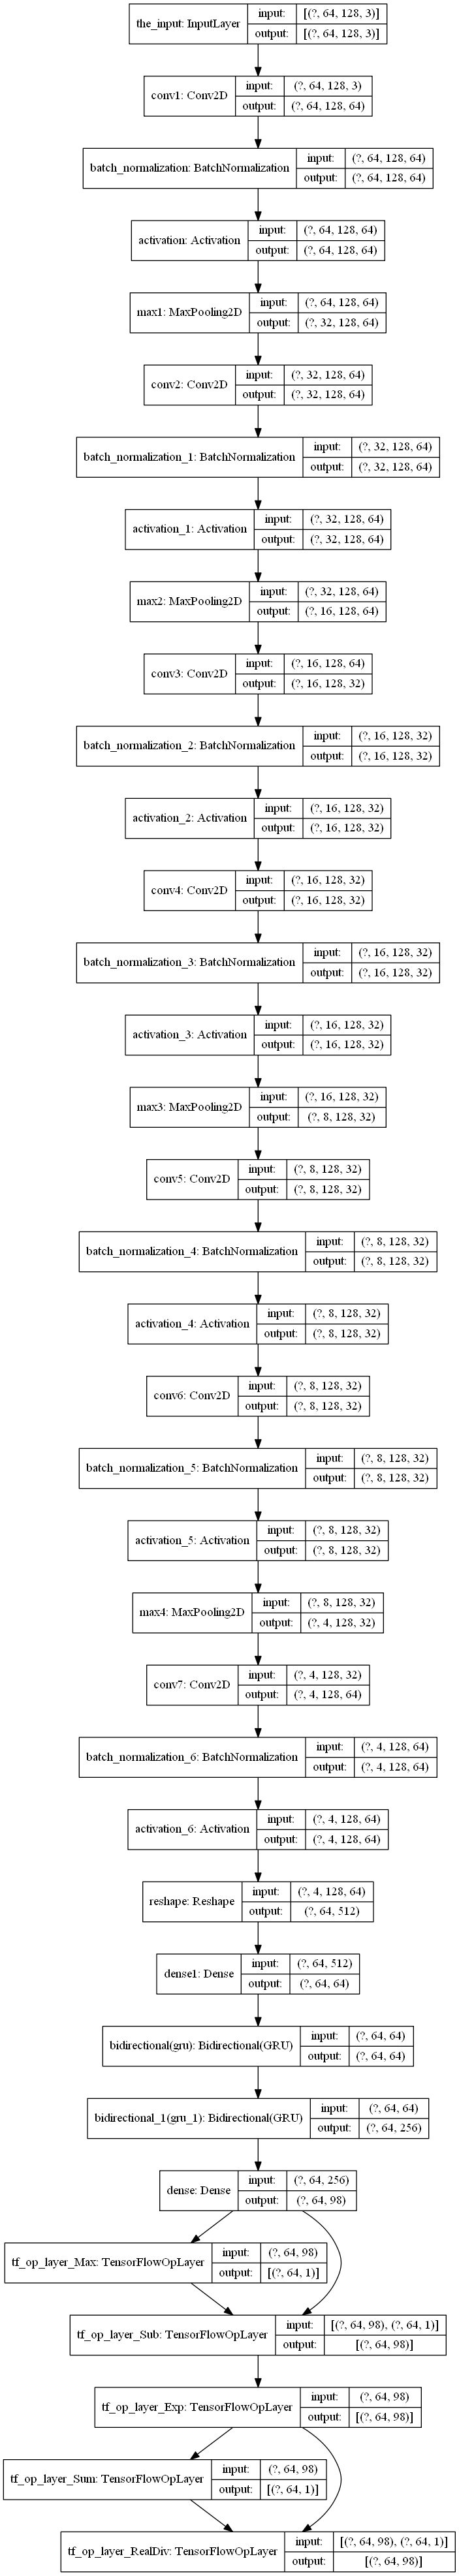

In [11]:
tf.keras.utils.plot_model(recognizer_model,show_shapes=True)

In [17]:
#loss function for recognition 
def ctc_loss(y_true,y_pred):
  #https://keras.io/examples/vision/captcha_ocr/
  #https://stackoverflow.com/questions/64321779/how-to-use-tf-ctc-loss-with-variable-length-features-and-labels
  label_length = tf.math.count_nonzero(y_true, axis=-1, keepdims=True)
  return tf.keras.backend.ctc_batch_cost(y_true,y_pred,np.ones((128,1),'int32')*64,label_length)

In [18]:
recognizer_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01,amsgrad=True),loss=ctc_loss)
reduce_lr=tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=2,mode='min',factor=0.75,verbose=1)
early=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10,mode='min',verbose=1)
tensorboard=tf.keras.callbacks.TensorBoard(log_dir='text_recognizer',write_images=True,histogram_freq=1)  
save=tf.keras.callbacks.ModelCheckpoint('recognizer_icdar_best.h5',monitor='val_loss',mode='min')
callbacks=[reduce_lr,early,tensorboard,save]
recognizer_model.fit(recognizer_generator(128,train),epochs=50,steps_per_epoch=train.shape[0]//128,validation_data=recognizer_generator(128,test),
               validation_steps=test.shape[0]//128,callbacks=callbacks)

Epoch 1/50
306/306 [==============================] - 160s 394ms/step - loss: 16.9734 - val_loss: 15.6787
Epoch 2/50
306/306 [==============================] - 119s 388ms/step - loss: 14.9464 - val_loss: 14.8565
Epoch 3/50
306/306 [==============================] - 119s 389ms/step - loss: 14.5499 - val_loss: 14.8472
Epoch 4/50
306/306 [==============================] - 129s 421ms/step - loss: 14.1332 - val_loss: 14.1427
Epoch 5/50
306/306 [==============================] - 128s 418ms/step - loss: 13.6218 - val_loss: 14.0058
Epoch 6/50
306/306 [==============================] - 119s 389ms/step - loss: 13.0868 - val_loss: 13.3184
Epoch 7/50
306/306 [==============================] - 118s 385ms/step - loss: 12.5796 - val_loss: 12.6389
Epoch 8/50
306/306 [==============================] - 117s 384ms/step - loss: 12.1840 - val_loss: 12.5898
Epoch 9/50
306/306 [==============================] - 126s 413ms/step - loss: 11.7669 - val_loss: 12.3948
Epoch 10/50
306/306 [=========================

In [20]:
# Saving the weights
recognizer_model.save_weights('/content/drive/MyDrive/scene text detection and recognition/weights/recoginzer.h5')

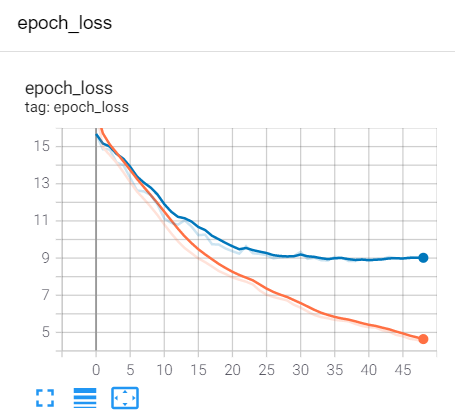

In [22]:
from IPython.display import Image
Image(filename='/content/recognizer.png') 